<a href="https://colab.research.google.com/github/Lemonpi3/coderhouse-churn-app/blob/master/assets/notebook/Proyecto_Final_Agustin_Lehmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias
requiere reiniciar la notebook una vez instaladas

In [1]:
!pip install matplotlib --upgrade
!pip install squarify
!pip install -U pandas-profiling
!pip install basemap
!pip install dash jupyter_dash
!jupyter nbextension enable --py widgetsnbextension
!pip install flask flask-restful flask-ngrok
!pip install kmodes
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 33.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 25.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b6866fba15c98240c9466a8f203d4723d1c23570b4ae431ede36a17d2df7a187
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports y Setup

## Imports

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import pickle
import requests
from bs4 import BeautifulSoup

#Graficos
import squarify
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
from jupyter_dash import JupyterDash
from mpl_toolkits.basemap import Basemap
import matplotlib.ticker as ticker
%matplotlib inline

#Utils
import time 
import dash
import textwrap
import warnings
from dash.dependencies import Input, Output
from pandas_profiling import ProfileReport
from IPython.display import Markdown as md
from tqdm.notebook import tqdm

#Feature selection
from prince import FAMD
from sklearn.feature_selection import SequentialFeatureSelector as SFS

#Preprocess
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#Metrics, eval, and training
from sklearn.metrics import recall_score, precision_score, f1_score,  roc_auc_score
from sklearn.metrics import classification_report, make_scorer, roc_curve, plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Models
from kmodes.kprototypes import KPrototypes
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR, SVC

#Implementación Modelos
from flask import Flask
from flask_restful import Resource, Api
from flask_ngrok import run_with_ngrok #para correrlo en colab ya que no tengo acceso al localhost o la ipv4 de la notebook

#Settings de pandas
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## Colores de los graficos

Text(0.5, 1.0, 'Paleta Divergente')

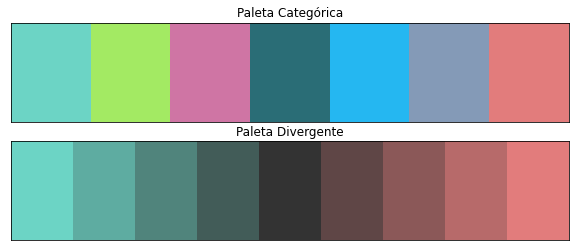

In [2]:
# @markdown Elije la paleta de colores que mas te guste para los graficos.
paleta = 'default' #@param ["default","protanopia","deuteranopia","tritanopia","achromatopsia"]

if paleta == 'default':
    cat_palette = ["#6cd4c5","#a3ea63","#cf75a4","#2a6d76","#25b7f1","#849ab7","#e27c7c"]
    div_palette = ["#e27c7c","#b76a6a","#8b5858","#5f4646","#333333","#425c58","#50847c","#5eaca1","#6cd4c5"]
elif paleta == 'protanopia':
    cat_palette = ["#9999c8","#c1c283","#a8a798","#474773","#6465e2","#8d8daf","#b5b47c"]
    div_palette = ["#b5b47c","#95946a","#747458","#545346","#333333","#4d4d58","#66667d","#7f80a3","#9999c8"]
elif paleta == 'deuteranopia':
    cat_palette = ["#938bc9","#bdb88b","#adb395","#433e73","#5b50df","#8c8aae","#bbc37c"]
    div_palette = ["#bbc37c","#9a9f69","#777b58","#555746","#333232","#4b4959","#635f7e","#7b75a4","#938bc9"]
elif paleta == 'tritanopia':
    cat_palette = ["#71cbcc","#a69da3","#ca8f8d","#2d7271","#2cd7d5","#85aaa9","#dc7c7c"]
    div_palette = ["#dc7c7c","#b36a6a","#885858","#5d4646","#323333","#435959","#527f7f","#61a5a6","#71cbcc"]
elif paleta == 'achromatopsia':
    cat_palette = ["#b3b3b3","#c5c5c5","#959595","#595959","#919191","#969696","#9a9a9a"]
    div_palette = ["#9a9a9a","#818181","#676767","#4d4d4d","#323232","#535353","#737373","#939393","#b3b3b3"]

def palplot(pal, size=1, ax=None, fig=None):
    """Plot the values in a color palette as a horizontal array.
    Parameters
    ----------
    pal : sequence of matplotlib colors
        colors, i.e. as returned by seaborn.color_palette()
    size :
        scaling factor for size of plot
    ax :
        an existing axes to use
    """
    n = len(pal)
    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels(["" for _ in range(n)])
    fig.set_facecolor((0,0,0,0))
    fig.set_alpha(0.0)
    ax.set_xticks([])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.set_facecolor((0,0,0,0))
    ax.set_alpha((0.0))

fig,ax = plt.subplots(2,1,figsize=(10,4))
palplot(cat_palette,size=10,ax=ax[0], fig=fig)
palplot(div_palette[::-1],size=10,ax=ax[1], fig=fig)
ax[0].set_title("Paleta Categórica")
ax[1].set_title("Paleta Divergente")

## Importo el Dataset

In [3]:
#Creo esta función para importar el dataset con el fin normalizar los nombres de las columnas y aprobechar df.columna de pandas en el codigo
def import_dataset()->pd.DataFrame:
    df = pd.read_csv('https://github.com/Lemonpi3/datasets-coderhouse/blob/main/telecom_customer_churn.csv?raw=true')

    #normalizo las columnas del dataset para manejarlas de forma mas comoda con pandas
    rename_dict = {}
    cols = list(df.columns)
    cols = [col.lower().replace(' ','_') for col in cols]

    for key in list(df.columns):
        for value in cols:
            rename_dict[key] = value
            cols.remove(value)
            break

    df = df.rename(rename_dict,axis=1)
    return df

In [4]:
df = import_dataset()
df.head()

customer_id  gender  age married  number_of_dependents          city  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  tenure_in_months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     offer phone_service  avg_monthly_long_distance_charges multiple_lines  \
0     None           Yes                              42.39             No   
1     None           Yes                              10.69            Yes   
2  Offer E           Yes                              33.65             No   
3  Offer D           Yes                              27.82             No   
4     None           Yes                               7.38             No   

  internet_service internet_type  avg_monthly_gb_download online_security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
2              Yes   Fiber Optic                     30.0              No   
3              Yes   Fiber Optic                      4.0              No   
4              Yes   Fiber Optic                     11.0              No   

  online_backup device_protection_plan premium_tech_support streaming_tv  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   

  streaming_movies streaming_music unlimited_data        contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
2               No              No            Yes  Month-to-Month   
3              Yes              No            Yes  Month-to-Month   
4               No              No            Yes  Month-to-Month   

  paperless_billing   payment_method  monthly_charge  total_charges  \
0               Yes      Credit Card            65.6         593.30   
1                No      Credit Card            -4.0         542.40   
2               Yes  Bank Withdrawal            73.9         280.85   
3               Yes  Bank Withdrawal            98.0        1237.85   
4               Yes      Credit Card            83.9         267.40   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   total_revenue customer_status   churn_category  \
0         974.81          Stayed              NaN   
1         610.28          Stayed              NaN   
2         415.45         Churned       Competitor   
3        1599.51         Churned  Dissatisfaction   
4         289.54         Churned  Dissatisfaction   

                    churn_reason  
0                            NaN  
1                      

## Creo la Columna County

Ayudara a la exploración de datos agrupando a las ciudades por condado.
>
La data sale de https://geographic.org/streetview/usa/ca/ y complemento las pocas que no se pudieron extraer de ahi con una busqueda en google.

### Prueba a menor escala.

Aseguremosnos que el proceso de extraccion funcione bien antes de pasarlo por todos los counties.

In [5]:
main_url = 'https://geographic.org/streetview/usa/ca/'

counties = ['alameda','alpine','amador', 'butte', 'calaveras', 'colusa', 
'contra_costa', 'del_norte', 'el_dorado', 
'fresno', 'glenn', 'humboldt', 'imperial', 'inyo', 'kern', 'kings', 'lake', 'lassen',
'los_angeles', 'madera', 'marin', 'mariposa', 'mendocino', 'merced', 'modoc', 'mono', 
'monterey', 'napa', 'nevada', 'orange', 'placer', 'plumas', 'riverside', 'sacramento',
'san_benito', 'san_bernardino', 'san_diego', 'san_francisco', 'san_joaquin', 'san_luis_obispo',
'san_mateo', 'santa_barbara', 'santa_clara', 'santa_cruz', 'shasta', 'sierra', 'siskiyou',
'solano', 'sonoma', 'stanislaus', 'sutter', 'tehama', 'trinity', 'tulare', 'tuolumne', 'ventura',
 'yolo', 'yuba']

#donde voy a guardarlos
condados = {}

In [6]:
r = requests.get(main_url+counties[0])
r

<Response [200]>

In [7]:
soup = BeautifulSoup(r.content)
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="Alameda County, California, United States, maps, List of Towns and Cities, Street View, Geographic.org" name="Description"/>
<meta content="Alameda County, California, List of Towns and Cities, maps, United States, Street View, Geographic.org" name="keywords"/>
<title>List of Towns and Cities in Alameda County, California, United States, Maps and Steet Views, Geographic.org</title>
<meta content="width=device-width; initial-scale=1.0; maximum-scale=1.0;" name="viewport"/>
<link href="https://geographic.org/streetview/usa/ca/alameda/index.html" rel="canonical"/>
<!--Taboola Head Section-->
<script type="text/javascript">
</script>
<!--End Taboola Head Section-->
<style type="text/css"> 
A:link { text-decoration: none;  color:#0000FF; }
A:visited { text-decoration: none;  color:#000066; }
A:active { text-decoration: none;  color:#000066; }
A:hover { text-decoration: none; color:#990033; } 
a {  text-decoration: none}
</

In [8]:
ciudades_del_condado = soup.find_all('li')
ciudades_del_condado

[<li><a alt="Alameda" href="alameda.html">Alameda</a></li>,
 <li><a alt="Albany" href="albany.html">Albany</a></li>,
 <li><a alt="Berkeley" href="berkeley.html">Berkeley</a></li>,
 <li><a alt="Castro Valley" href="castro_valley.html">Castro Valley</a></li>,
 <li><a alt="Dublin" href="dublin.html">Dublin</a></li>,
 <li><a alt="Emeryville" href="emeryville.html">Emeryville</a></li>,
 <li><a alt="Fremont" href="fremont.html">Fremont</a></li>,
 <li><a alt="Hayward" href="hayward.html">Hayward</a></li>,
 <li><a alt="Livermore" href="livermore.html">Livermore</a></li>,
 <li><a alt="Newark" href="newark.html">Newark</a></li>,
 <li><a alt="Oakland" href="oakland.html">Oakland</a></li>,
 <li><a alt="Pleasanton" href="pleasanton.html">Pleasanton</a></li>,
 <li><a alt="San Leandro" href="san_leandro.html">San Leandro</a></li>,
 <li><a alt="San Lorenzo" href="san_lorenzo.html">San Lorenzo</a></li>,
 <li><a alt="Sunol" href="sunol.html">Sunol</a></li>,
 <li><a alt="Union City" href="union_city.html

In [9]:
ciudades = []
for ciudad in ciudades_del_condado:
  ciudades.append(ciudad.text)
  
condados[counties[0]] = ciudades
condados

{'alameda': ['Alameda',
  'Albany',
  'Berkeley',
  'Castro Valley',
  'Dublin',
  'Emeryville',
  'Fremont',
  'Hayward',
  'Livermore',
  'Newark',
  'Oakland',
  'Pleasanton',
  'San Leandro',
  'San Lorenzo',
  'Sunol',
  'Union City']}

### Extracción de los datos.

Como todo parece que esta en orden, vamos a extraer el resto de los counties.

In [10]:
#Con el fin de no hacer que la notebook tarde mas de lo necesario en correr 
#decidi comentar el codigo de extracción y dejar los resultados ya extraidos en la siguiente celda.

# condados = {}

# for i,county in enumerate(counties):
#   if i%10 == 0 and i != 0:
#     time.sleep(60)
#   print(f'{i} de {len(counties)}')
#   r = requests.get(main_url+county)
#   soup = BeautifulSoup(r.content)
#   ciudades_del_condado = soup.find_all('li')

#   ciudades = []
#   for ciudad in ciudades_del_condado:
#     ciudades.append(ciudad.text)
  
#   condados[county] = ciudades

In [11]:
#@markdown Guardo condados en esta celda de codigo en caso de que lo borre 
#@markdown o modifique por accidente
condados = {'alameda': ['Alameda',
  'Albany',
  'Berkeley',
  'Castro Valley',
  'Dublin',
  'Emeryville',
  'Fremont',
  'Hayward',
  'Livermore',
  'Newark',
  'Oakland',
  'Pleasanton',
  'San Leandro',
  'San Lorenzo',
  'Sunol',
  'Union City'],
 'alpine': ['Kirkwood', 'Markleeville'],
 'amador': ['Amador City',
  'Drytown',
  'Fiddletown',
  'Ione',
  'Jackson',
  'Kit Carson',
  'Martell',
  'Pine Grove',
  'Pioneer',
  'Plymouth',
  'River Pines',
  'Sutter Creek',
  'Volcano'],
 'butte': ['Bangor',
  'Berry Creek',
  'Biggs',
  'Chico',
  'Clipper Mills',
  'Durham',
  'Feather Falls',
  'Forbestown',
  'Forest Ranch',
  'Gridley',
  'Magalia',
  'Nelson',
  'Oroville',
  'Palermo',
  'Paradise',
  'Richvale',
  'Stirling City'],
 'calaveras': ['Altaville',
  'Angels Camp',
  'Arnold',
  'Avery',
  'Burson',
  'Campo Seco',
  'Copperopolis',
  'Douglas Flat',
  'Glencoe',
  'Hathaway Pines',
  'Mokelumne Hill',
  'Mountain Ranch',
  'Murphys',
  'Rail Road Flat',
  'San Andreas',
  'Vallecito',
  'Valley Springs',
  'Wallace',
  'West Point',
  'Wilseyville'],
 'colusa': ['Arbuckle',
  'Colusa',
  'Grimes',
  'Maxwell',
  'Princeton',
  'Stonyford',
  'Williams'],
 'contra_costa': ['Alamo',
  'Antioch',
  'Bethel Island',
  'Brentwood',
  'Byron',
  'Canyon',
  'Clayton',
  'Concord',
  'Crockett',
  'Danville',
  'Diablo',
  'Discovery Bay',
  'El Cerrito',
  'El Sobrante',
  'Hercules',
  'Knightsen',
  'Lafayette',
  'Martinez',
  'Moraga',
  'Oakley',
  'Orinda',
  'Pinole',
  'Pittsburg',
  'Pleasant Hill',
  'Port Costa',
  'Richmond',
  'Rodeo',
  'San Pablo',
  'San Ramon',
  'Walnut Creek'],
 'del_norte': ['Crescent City',
  'Fort Dick',
  'Gasquet',
  'Klamath',
  'Smith River'],
 'el_dorado': ['Camino',
  'Coloma',
  'Cool',
  'Diamond Springs',
  'Echo Lake',
  'El Dorado',
  'El Dorado Hills',
  'Garden Valley',
  'Georgetown',
  'Greenwood',
  'Grizzly Flats',
  'Kyburz',
  'Lotus',
  'Mount Aukum',
  'Pilot Hill',
  'Placerville',
  'Pollock Pines',
  'Rescue',
  'Shingle Springs',
  'Somerset',
  'South Lake Tahoe',
  'Tahoma',
  'Twin Bridges'],
 'fresno': ['Auberry',
  'Big Creek',
  'Biola',
  'Burrel',
  'Cantua Creek',
  'Caruthers',
  'Clovis',
  'Coalinga',
  'Del Rey',
  'Dunlap',
  'Firebaugh',
  'Five Points',
  'Fowler',
  'Fresno',
  'Friant',
  'Helm',
  'Hume',
  'Huron',
  'Kerman',
  'Kingsburg',
  'Lakeshore',
  'Laton',
  'Mendota',
  'Miramonte',
  'Mono Hot Springs',
  'Orange Cove',
  'Parlier',
  'Piedra',
  'Prather',
  'Raisin City',
  'Reedley',
  'Riverdale',
  'San Joaquin',
  'Sanger',
  'Selma',
  'Shaver Lake',
  'Squaw Valley',
  'Tollhouse',
  'Tranquillity'],
 'glenn': ['Artois',
  'Butte City',
  'Elk Creek',
  'Glenn',
  'Hamilton City',
  'Orland',
  'Willows'],
 'humboldt': ['Alderpoint',
  'Arcata',
  'Bayside',
  'Blocksburg',
  'Blue Lake',
  'Bridgeville',
  'Carlotta',
  'Eureka',
  'Ferndale',
  'Fields Landing',
  'Fortuna',
  'Garberville',
  'Honeydew',
  'Hoopa',
  'Hydesville',
  'Kneeland',
  'Korbel',
  'Loleta',
  'Mckinleyville',
  'Miranda',
  'Myers Flat',
  'Orick',
  'Orleans',
  'Petrolia',
  'Phillipsville',
  'Redcrest',
  'Redway',
  'Rio Dell',
  'Samoa',
  'Scotia',
  'Trinidad',
  'Weott',
  'Whitethorn',
  'Willow Creek'],
 'imperial': ['Bard',
  'Brawley',
  'Calexico',
  'Calipatria',
  'El Centro',
  'Heber',
  'Holtville',
  'Imperial',
  'Niland',
  'Ocotillo',
  'Palo Verde',
  'Salton City',
  'Seeley',
  'Westmorland',
  'Winterhaven'],
 'inyo': ['Big Pine',
  'Bishop',
  'Darwin',
  'Death Valley',
  'Independence',
  'Keeler',
  'Little Lake',
  'Lone Pine',
  'Olancha',
  'Shoshone',
  'Tecopa'],
 'kern': ['Arvin',
  'Bakersfield',
  'Bodfish',
  'Boron',
  'Buttonwillow',
  'Caliente',
  'California City',
  'Cantil',
  'Delano',
  'Edison',
  'Edwards',
  'Fellows',
  'Frazier Park',
  'Glennville',
  'Inyokern',
  'Johannesburg',
  'Keene',
  'Kernville',
  'Lake Isabella',
  'Lamont',
  'Lebec',
  'Lost Hills',
  'Maricopa',
  'Mc Farland',
  'Mc Kittrick',
  'Mojave',
  'Onyx',
  'Pine Mountain Club',
  'Randsburg',
  'Red Mountain',
  'Ridgecrest',
  'Rosamond',
  'Shafter',
  'Taft',
  'Tehachapi',
  'Tupman',
  'Wasco',
  'Weldon',
  'Wofford Heights',
  'Woody'],
 'kings': ['Armona',
  'Avenal',
  'Corcoran',
  'Hanford',
  'Kettleman City',
  'Lemoore',
  'Stratford'],
 'lake': ['Clearlake',
  'Clearlake Oaks',
  'Clearlake Park',
  'Cobb',
  'Finley',
  'Glenhaven',
  'Hidden Valley Lake',
  'Kelseyville',
  'Lakeport',
  'Lower Lake',
  'Lucerne',
  'Middletown',
  'Nice',
  'Upper Lake',
  'Witter Springs'],
 'lassen': ['Bieber',
  'Doyle',
  'Herlong',
  'Janesville',
  'Litchfield',
  'Madeline',
  'Milford',
  'Nubieber',
  'Ravendale',
  'Standish',
  'Susanville',
  'Termo',
  'Wendel',
  'Westwood'],
 'los_angeles': ['Acton',
  'Agoura Hills',
  'Alhambra',
  'Altadena',
  'Arcadia',
  'Artesia',
  'Avalon',
  'Azusa',
  'Baldwin Park',
  'Bell Gardens',
  'Bellflower',
  'Beverly Hills',
  'Burbank',
  'Calabasas',
  'Canoga Park',
  'Canyon Country',
  'Carson',
  'Castaic',
  'Cerritos',
  'Chatsworth',
  'Claremont',
  'Compton',
  'Covina',
  'Culver City',
  'Diamond Bar',
  'Downey',
  'Duarte',
  'El Monte',
  'El Segundo',
  'Encino',
  'Gardena',
  'Glendale',
  'Glendora',
  'Granada Hills',
  'Hacienda Heights',
  'Harbor City',
  'Hawaiian Gardens',
  'Hawthorne',
  'Hermosa Beach',
  'Huntington Park',
  'Inglewood',
  'La Canada Flintridge',
  'La Crescenta',
  'La Mirada',
  'La Puente',
  'La Verne',
  'Lake Hughes',
  'Lakewood',
  'Lancaster',
  'Lawndale',
  'Littlerock',
  'Llano',
  'Lomita',
  'Long Beach',
  'Los Angeles',
  'Lynwood',
  'Malibu',
  'Manhattan Beach',
  'Marina Del Rey',
  'Maywood',
  'Mission Hills',
  'Monrovia',
  'Montebello',
  'Monterey Park',
  'Montrose',
  'Mount Wilson',
  'Newhall',
  'North Hills',
  'North Hollywood',
  'Northridge',
  'Norwalk',
  'Pacific Palisades',
  'Pacoima',
  'Palmdale',
  'Palos Verdes Peninsula',
  'Panorama City',
  'Paramount',
  'Pasadena',
  'Pearblossom',
  'Pico Rivera',
  'Playa Del Rey',
  'Playa Vista',
  'Pomona',
  'Porter Ranch',
  'Rancho Palos Verdes',
  'Redondo Beach',
  'Reseda',
  'Rosemead',
  'Rowland Heights',
  'San Dimas',
  'San Fernando',
  'San Gabriel',
  'San Marino',
  'San Pedro',
  'Santa Clarita',
  'Santa Fe Springs',
  'Santa Monica',
  'Sherman Oaks',
  'Sierra Madre',
  'Signal Hill',
  'South El Monte',
  'South Gate',
  'South Pasadena',
  'Stevenson Ranch',
  'Studio City',
  'Sun Valley',
  'Sunland',
  'Sylmar',
  'Tarzana',
  'Temple City',
  'Topanga',
  'Torrance',
  'Tujunga',
  'Valencia',
  'Valley Village',
  'Valyermo',
  'Van Nuys',
  'Venice',
  'Verdugo City',
  'Walnut',
  'West Covina',
  'West Hills',
  'West Hollywood',
  'Whittier',
  'Wilmington',
  'Winnetka',
  'Woodland Hills'],
 'madera': ['Ahwahnee',
  'Bass Lake',
  'Chowchilla',
  'Coarsegold',
  'Madera',
  'North Fork',
  'O Neals',
  'Oakhurst',
  'Raymond',
  'Wishon'],
 'marin': ['Belvedere Tiburon',
  'Bolinas',
  'Corte Madera',
  'Dillon Beach',
  'Fairfax',
  'Forest Knolls',
  'Greenbrae',
  'Inverness',
  'Lagunitas',
  'Larkspur',
  'Marshall',
  'Mill Valley',
  'Nicasio',
  'Novato',
  'Olema',
  'Point Reyes Station',
  'Ross',
  'San Anselmo',
  'San Geronimo',
  'San Quentin',
  'San Rafael',
  'Sausalito',
  'Stinson Beach',
  'Tomales',
  'Woodacre'],
 'mariposa': ['Catheys Valley',
  'Coulterville',
  'El Portal',
  'Fish Camp',
  'Hornitos',
  'Mariposa',
  'Midpines',
  'Yosemite National Park'],
 'mendocino': ['Albion',
  'Boonville',
  'Branscomb',
  'Calpella',
  'Caspar',
  'Comptche',
  'Covelo',
  'Dos Rios',
  'Elk',
  'Fort Bragg',
  'Gualala',
  'Hopland',
  'Laytonville',
  'Leggett',
  'Little River',
  'Manchester',
  'Mendocino',
  'Navarro',
  'Philo',
  'Piercy',
  'Point Arena',
  'Potter Valley',
  'Redwood Valley',
  'Talmage',
  'Ukiah',
  'Westport',
  'Willits',
  'Yorkville'],
 'merced': ['Atwater',
  'Ballico',
  'Cressey',
  'Delhi',
  'Dos Palos',
  'El Nido',
  'Gustine',
  'Hilmar',
  'Le Grand',
  'Livingston',
  'Los Banos',
  'Merced',
  'Planada',
  'Santa Rita Park',
  'Snelling',
  'South Dos Palos',
  'Stevinson',
  'Winton'],
 'modoc': ['Adin',
  'Alturas',
  'Canby',
  'Cedarville',
  'Davis Creek',
  'Eagleville',
  'Fort Bidwell',
  'Lake City',
  'Likely',
  'Lookout'],
 'mono': ['Benton',
  'Bridgeport',
  'Coleville',
  'June Lake',
  'Lee Vining',
  'Mammoth Lakes',
  'Topaz'],
 'monterey': ['Aromas',
  'Big Sur',
  'Bradley',
  'Carmel',
  'Carmel By The Sea',
  'Carmel Valley',
  'Castroville',
  'Chualar',
  'Gonzales',
  'Greenfield',
  'Jolon',
  'King City',
  'Lockwood',
  'Marina',
  'Monterey',
  'Moss Landing',
  'Pacific Grove',
  'Pebble Beach',
  'Salinas',
  'San Ardo',
  'San Lucas',
  'Seaside',
  'Soledad',
  'Spreckels'],
 'napa': ['American Canyon',
  'Angwin',
  'Calistoga',
  'Deer Park',
  'Napa',
  'Oakville',
  'Pope Valley',
  'Rutherford',
  'Saint Helena',
  'Yountville'],
 'nevada': ['Cedar Ridge',
  'Chicago Park',
  'Floriston',
  'Grass Valley',
  'Nevada City',
  'Norden',
  'North San Juan',
  'Penn Valley',
  'Rough And Ready',
  'Smartsville',
  'Soda Springs',
  'Truckee',
  'Washington'],
 'orange': ['Aliso Viejo',
  'Anaheim',
  'Brea',
  'Buena Park',
  'Capistrano Beach',
  'Corona Del Mar',
  'Costa Mesa',
  'Cypress',
  'Dana Point',
  'Foothill Ranch',
  'Fountain Valley',
  'Fullerton',
  'Garden Grove',
  'Huntington Beach',
  'Irvine',
  'La Habra',
  'La Palma',
  'Ladera Ranch',
  'Laguna Beach',
  'Laguna Hills',
  'Laguna Niguel',
  'Laguna Woods',
  'Lake Forest',
  'Los Alamitos',
  'Midway City',
  'Mission Viejo',
  'Newport Beach',
  'Newport Coast',
  'Orange',
  'Placentia',
  'Rancho Santa Margarita',
  'San Clemente',
  'San Juan Capistrano',
  'Santa Ana',
  'Seal Beach',
  'Silverado',
  'Stanton',
  'Sunset Beach',
  'Surfside',
  'Trabuco Canyon',
  'Tustin',
  'Villa Park',
  'Westminster',
  'Yorba Linda'],
 'placer': ['Alta',
  'Applegate',
  'Auburn',
  'Carnelian Bay',
  'Colfax',
  'Dutch Flat',
  'Emigrant Gap',
  'Foresthill',
  'Gold Run',
  'Granite Bay',
  'Homewood',
  'Kings Beach',
  'Lincoln',
  'Loomis',
  'Meadow Vista',
  'Newcastle',
  'Olympic Valley',
  'Penryn',
  'Rocklin',
  'Roseville',
  'Sheridan',
  'Tahoe City',
  'Tahoe Vista',
  'Weimar'],
 'plumas': ['Beckwourth',
  'Belden',
  'Blairsden-Graeagle',
  'Canyon Dam',
  'Chester',
  'Chilcoot',
  'Clio',
  'Crescent Mills',
  'Greenville',
  'Meadow Valley',
  'Portola',
  'Quincy',
  'Storrie',
  'Taylorsville',
  'Twain',
  'Vinton'],
 'riverside': ['Aguanga',
  'Anza',
  'Banning',
  'Beaumont',
  'Blythe',
  'Cabazon',
  'Calimesa',
  'Cathedral City',
  'Coachella',
  'Corona',
  'Desert Center',
  'Desert Hot Springs',
  'Hemet',
  'Homeland',
  'Idyllwild',
  'Indian Wells',
  'Indio',
  'La Quinta',
  'Lake Elsinore',
  'Mecca',
  'Menifee',
  'Mira Loma',
  'Moreno Valley',
  'Mountain Center',
  'Murrieta',
  'Norco',
  'North Palm Springs',
  'Nuevo',
  'Palm Desert',
  'Palm Springs',
  'Perris',
  'Quail Valley',
  'Rancho Mirage',
  'Riverside',
  'San Jacinto',
  'Sun City',
  'Temecula',
  'Thermal',
  'Thousand Palms',
  'Whitewater',
  'Wildomar',
  'Winchester'],
 'sacramento': ['Antelope',
  'Carmichael',
  'Citrus Heights',
  'Courtland',
  'Elk Grove',
  'Elverta',
  'Fair Oaks',
  'Folsom',
  'Galt',
  'Herald',
  'Hood',
  'Isleton',
  'Mather',
  'Mcclellan',
  'North Highlands',
  'Orangevale',
  'Rancho Cordova',
  'Rio Linda',
  'Ryde',
  'Sacramento',
  'Sloughhouse',
  'Walnut Grove',
  'Wilton'],
 'san_benito': ['Hollister', 'Paicines', 'San Juan Bautista', 'Tres Pinos'],
 'san_bernardino': ['Adelanto',
  'Amboy',
  'Angelus Oaks',
  'Apple Valley',
  'Baker',
  'Barstow',
  'Big Bear City',
  'Big Bear Lake',
  'Bloomington',
  'Blue Jay',
  'Bryn Mawr',
  'Cedar Glen',
  'Cedarpines Park',
  'Chino',
  'Chino Hills',
  'Cima',
  'Colton',
  'Crestline',
  'Daggett',
  'Earp',
  'Essex',
  'Fawnskin',
  'Fontana',
  'Forest Falls',
  'Fort Irwin',
  'Grand Terrace',
  'Green Valley Lake',
  'Guasti',
  'Helendale',
  'Hesperia',
  'Highland',
  'Hinkley',
  'Joshua Tree',
  'Lake Arrowhead',
  'Landers',
  'Loma Linda',
  'Lucerne Valley',
  'Ludlow',
  'Lytle Creek',
  'Mentone',
  'Montclair',
  'Morongo Valley',
  'Mountain Pass',
  'Mt Baldy',
  'Needles',
  'Newberry Springs',
  'Nipton',
  'Ontario',
  'Oro Grande',
  'Parker Dam',
  'Phelan',
  'Pinon Hills',
  'Pioneertown',
  'Rancho Cucamonga',
  'Redlands',
  'Rialto',
  'Rimforest',
  'Running Springs',
  'San Bernardino',
  'Skyforest',
  'Sugarloaf',
  'Trona',
  'Twentynine Palms',
  'Twin Peaks',
  'Upland',
  'Victorville',
  'Vidal',
  'Wrightwood',
  'Yermo',
  'Yucaipa',
  'Yucca Valley'],
 'san_diego': ['Alpine',
  'Bonita',
  'Bonsall',
  'Borrego Springs',
  'Boulevard',
  'Camp Pendleton',
  'Campo',
  'Cardiff By The Sea',
  'Carlsbad',
  'Chula Vista',
  'Coronado',
  'Del Mar',
  'Descanso',
  'Dulzura',
  'El Cajon',
  'Encinitas',
  'Escondido',
  'Fallbrook',
  'Guatay',
  'Imperial Beach',
  'Jacumba',
  'Jamul',
  'Julian',
  'La Jolla',
  'La Mesa',
  'Lakeside',
  'Lemon Grove',
  'Mount Laguna',
  'National City',
  'Oceanside',
  'Pala',
  'Palomar Mountain',
  'Pauma Valley',
  'Pine Valley',
  'Potrero',
  'Poway',
  'Ramona',
  'Ranchita',
  'Rancho Santa Fe',
  'San Diego',
  'San Luis Rey',
  'San Marcos',
  'San Ysidro',
  'Santa Ysabel',
  'Santee',
  'Solana Beach',
  'Spring Valley',
  'Tecate',
  'Valley Center',
  'Vista',
  'Warner Springs'],
 'san_francisco': ['San Francisco'],
 'san_joaquin': ['Acampo',
  'Clements',
  'Escalon',
  'Farmington',
  'French Camp',
  'Holt',
  'Lathrop',
  'Linden',
  'Lockeford',
  'Lodi',
  'Manteca',
  'Ripon',
  'Stockton',
  'Thornton',
  'Tracy',
  'Vernalis',
  'Victor',
  'Woodbridge'],
 'san_luis_obispo': ['Arroyo Grande',
  'Atascadero',
  'Avila Beach',
  'Cambria',
  'Cayucos',
  'Creston',
  'Grover Beach',
  'Harmony',
  'Los Osos',
  'Morro Bay',
  'Nipomo',
  'Oceano',
  'Paso Robles',
  'Pismo Beach',
  'San Luis Obispo',
  'San Miguel',
  'San Simeon',
  'Santa Margarita',
  'Shandon',
  'Templeton'],
 'san_mateo': ['Atherton',
  'Belmont',
  'Brisbane',
  'Burlingame',
  'Daly City',
  'El Granada',
  'Half Moon Bay',
  'La Honda',
  'Loma Mar',
  'Menlo Park',
  'Millbrae',
  'Montara',
  'Moss Beach',
  'Pacifica',
  'Pescadero',
  'Portola Valley',
  'Redwood City',
  'San Bruno',
  'San Carlos',
  'San Francisco',
  'San Gregorio',
  'San Mateo',
  'South San Francisco'],
 'santa_barbara': ['Buellton',
  'Carpinteria',
  'Casmalia',
  'Goleta',
  'Guadalupe',
  'Lompoc',
  'Los Alamos',
  'Los Olivos',
  'New Cuyama',
  'Santa Barbara',
  'Santa Maria',
  'Santa Ynez',
  'Solvang',
  'Summerland'],
 'santa_clara': ['Alviso',
  'Campbell',
  'Coyote',
  'Cupertino',
  'Gilroy',
  'Holy City',
  'Los Altos',
  'Los Gatos',
  'Milpitas',
  'Morgan Hill',
  'Mount Hamilton',
  'Mountain View',
  'Palo Alto',
  'Redwood Estates',
  'San Jose',
  'San Martin',
  'Santa Clara',
  'Saratoga',
  'Stanford',
  'Sunnyvale'],
 'santa_cruz': ['Aptos',
  'Ben Lomond',
  'Boulder Creek',
  'Brookdale',
  'Capitola',
  'Davenport',
  'Felton',
  'Freedom',
  'Los Gatos',
  'Mount Hermon',
  'Santa Cruz',
  'Scotts Valley',
  'Soquel',
  'Watsonville'],
 'shasta': ['Anderson',
  'Bella Vista',
  'Big Bend',
  'Burney',
  'Cassel',
  'Castella',
  'Cottonwood',
  'Fall River Mills',
  'French Gulch',
  'Hat Creek',
  'Igo',
  'Lakehead',
  'Mcarthur',
  'Millville',
  'Montgomery Creek',
  'Oak Run',
  'Obrien',
  'Old Station',
  'Palo Cedro',
  'Platina',
  'Redding',
  'Round Mountain',
  'Shasta',
  'Shasta Lake',
  'Shingletown',
  'Whiskeytown',
  'Whitmore'],
 'sierra': ['Alleghany',
  'Calpine',
  'Downieville',
  'Goodyears Bar',
  'Loyalton',
  'Sierra City',
  'Sierraville'],
 'siskiyou': ['Callahan',
  'Dorris',
  'Dunsmuir',
  'Etna',
  'Forks of Salmon',
  'Fort Jones',
  'Gazelle',
  'Greenview',
  'Grenada',
  'Happy Camp',
  'Hornbrook',
  'Klamath River',
  'Macdoel',
  'Mccloud',
  'Montague',
  'Mount Shasta',
  'Scott Bar',
  'Seiad Valley',
  'Somes Bar',
  'Tulelake',
  'Weed',
  'Yreka'],
 'solano': ['Benicia',
  'Birds Landing',
  'Dixon',
  'Elmira',
  'Fairfield',
  'Rio Vista',
  'Suisun City',
  'Vacaville',
  'Vallejo'],
 'sonoma': ['Annapolis',
  'Bodega',
  'Bodega Bay',
  'Boyes Hot Springs',
  'Camp Meeker',
  'Cazadero',
  'Cloverdale',
  'Cotati',
  'Duncans Mills',
  'El Verano',
  'Eldridge',
  'Forestville',
  'Fulton',
  'Geyserville',
  'Glen Ellen',
  'Graton',
  'Guerneville',
  'Healdsburg',
  'Jenner',
  'Kenwood',
  'Monte Rio',
  'Occidental',
  'Penngrove',
  'Petaluma',
  'Rio Nido',
  'Rohnert Park',
  'Santa Rosa',
  'Sebastopol',
  'Sonoma',
  'Stewarts Point',
  'The Sea Ranch',
  'Valley Ford',
  'Villa Grande',
  'Vineburg',
  'Windsor'],
 'stanislaus': ['Ceres',
  'Crows Landing',
  'Denair',
  'Empire',
  'Hickman',
  'Hughson',
  'Keyes',
  'La Grange',
  'Modesto',
  'Newman',
  'Oakdale',
  'Patterson',
  'Riverbank',
  'Salida',
  'Turlock',
  'Waterford',
  'Westley'],
 'sutter': ['Live Oak',
  'Meridian',
  'Nicolaus',
  'Pleasant Grove',
  'Rio Oso',
  'Robbins',
  'Sutter',
  'Yuba City'],
 'tehama': ['Corning',
  'Flournoy',
  'Gerber',
  'Los Molinos',
  'Manton',
  'Mill Creek',
  'Mineral',
  'Paskenta',
  'Paynes Creek',
  'Proberta',
  'Red Bluff',
  'Tehama',
  'Vina'],
 'trinity': ['Big Bar',
  'Burnt Ranch',
  'Douglas City',
  'Hayfork',
  'Hyampom',
  'Junction City',
  'Lewiston',
  'Mad River',
  'Salyer',
  'Trinity Center',
  'Weaverville',
  'Zenia'],
 'tulare': ['Alpaugh',
  'Badger',
  'California Hot Springs',
  'Camp Nelson',
  'Cutler',
  'Dinuba',
  'Ducor',
  'Earlimart',
  'Exeter',
  'Farmersville',
  'Goshen',
  'Ivanhoe',
  'Kaweah',
  'Kings Canyon National Park',
  'Lemon Cove',
  'Lindsay',
  'Orosi',
  'Pixley',
  'Porterville',
  'Posey',
  'Richgrove',
  'Sequoia National Park',
  'Springville',
  'Strathmore',
  'Sultana',
  'Terra Bella',
  'Three Rivers',
  'Tipton',
  'Traver',
  'Tulare',
  'Visalia',
  'Waukena',
  'Woodlake',
  'Yettem'],
 'tuolumne': ['Big Oak Flat',
  'Chinese Camp',
  'Columbia',
  'Groveland',
  'Jamestown',
  'Long Barn',
  'Mi Wuk Village',
  'Moccasin',
  'Pinecrest',
  'Sonora',
  'Soulsbyville',
  'Standard',
  'Strawberry',
  'Tuolumne',
  'Twain Harte'],
 'ventura': ['Camarillo',
  'Fillmore',
  'Moorpark',
  'Newbury Park',
  'Oak Park',
  'Oak View',
  'Ojai',
  'Oxnard',
  'Piru',
  'Port Hueneme',
  'Santa Paula',
  'Simi Valley',
  'Somis',
  'Thousand Oaks',
  'Ventura',
  'Westlake Village'],
 'yolo': ['Brooks',
  'Capay',
  'Clarksburg',
  'Davis',
  'Dunnigan',
  'Esparto',
  'Guinda',
  'Knights Landing',
  'Madison',
  'Rumsey',
  'West Sacramento',
  'Winters',
  'Woodland',
  'Yolo',
  'Zamora'],
 'yuba': ['Browns Valley',
  'Brownsville',
  'Camptonville',
  'Challenge',
  'Dobbins',
  'Marysville',
  'Olivehurst',
  'Oregon House',
  'Rackerby',
  'Strawberry Valley',
  'Wheatland']}

In [12]:
print(condados)

{'alameda': ['Alameda', 'Albany', 'Berkeley', 'Castro Valley', 'Dublin', 'Emeryville', 'Fremont', 'Hayward', 'Livermore', 'Newark', 'Oakland', 'Pleasanton', 'San Leandro', 'San Lorenzo', 'Sunol', 'Union City'], 'alpine': ['Kirkwood', 'Markleeville'], 'amador': ['Amador City', 'Drytown', 'Fiddletown', 'Ione', 'Jackson', 'Kit Carson', 'Martell', 'Pine Grove', 'Pioneer', 'Plymouth', 'River Pines', 'Sutter Creek', 'Volcano'], 'butte': ['Bangor', 'Berry Creek', 'Biggs', 'Chico', 'Clipper Mills', 'Durham', 'Feather Falls', 'Forbestown', 'Forest Ranch', 'Gridley', 'Magalia', 'Nelson', 'Oroville', 'Palermo', 'Paradise', 'Richvale', 'Stirling City'], 'calaveras': ['Altaville', 'Angels Camp', 'Arnold', 'Avery', 'Burson', 'Campo Seco', 'Copperopolis', 'Douglas Flat', 'Glencoe', 'Hathaway Pines', 'Mokelumne Hill', 'Mountain Ranch', 'Murphys', 'Rail Road Flat', 'San Andreas', 'Vallecito', 'Valley Springs', 'Wallace', 'West Point', 'Wilseyville'], 'colusa': ['Arbuckle', 'Colusa', 'Grimes', 'Maxwell'

### Armado de la columna

In [13]:
temp_dict = {'county':[],'city':[]}

for key in condados.keys():
  for city in condados[key]:
    temp_dict['county'].append(key)
    temp_dict['city'].append(city)

temp_county_df = pd.DataFrame(temp_dict)
temp_county_df

county               city
0     alameda            Alameda
1     alameda             Albany
2     alameda           Berkeley
3     alameda      Castro Valley
4     alameda             Dublin
...       ...                ...
1216     yuba         Olivehurst
1217     yuba       Oregon House
1218     yuba           Rackerby
1219     yuba  Strawberry Valley
1220     yuba          Wheatland

[1221 rows x 2 columns]

In [14]:
counties_col = []

#Añado estas ciudades manualmente ya que no se encontraban en la página
temp = pd.DataFrame({'county':['riverside','calaveras','yuba','riverside','solano','plumas','los_angeles','yuba', 'siskiyou'],
                       'city':['White Water','Sheep Ranch','Beale Afb','March Air Reserve Base','Travis Afb','Blairsden Graeagle','Bell','Smartville', 'Forks Of Salmon']})
temp_county_df = pd.concat([temp_county_df,temp])

for i in range(len(df.city)):
  try:
    counties_col.append(temp_county_df[temp_county_df.city == df.iloc[i].city]['county'].to_list()[0])
  except:
    #Para encontrar los indices de las filas faltantes y buscarlas
    print(i)
    
df['county'] = counties_col
df.head()

customer_id  gender  age married  number_of_dependents          city  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  tenure_in_months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     offer phone_service  avg_monthly_long_distance_charges multiple_lines  \
0     None           Yes                              42.39             No   
1     None           Yes                              10.69            Yes   
2  Offer E           Yes                              33.65             No   
3  Offer D           Yes                              27.82             No   
4     None           Yes                               7.38             No   

  internet_service internet_type  avg_monthly_gb_download online_security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
2              Yes   Fiber Optic                     30.0              No   
3              Yes   Fiber Optic                      4.0              No   
4              Yes   Fiber Optic                     11.0              No   

  online_backup device_protection_plan premium_tech_support streaming_tv  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   

  streaming_movies streaming_music unlimited_data        contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
2               No              No            Yes  Month-to-Month   
3              Yes              No            Yes  Month-to-Month   
4               No              No            Yes  Month-to-Month   

  paperless_billing   payment_method  monthly_charge  total_charges  \
0               Yes      Credit Card            65.6         593.30   
1                No      Credit Card            -4.0         542.40   
2               Yes  Bank Withdrawal            73.9         280.85   
3               Yes  Bank Withdrawal            98.0        1237.85   
4               Yes      Credit Card            83.9         267.40   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   total_revenue customer_status   churn_category  \
0         974.81          Stayed              NaN   
1         610.28          Stayed              NaN   
2         415.45         Churned       Competitor   
3        1599.51         Churned  Dissatisfaction   
4         289.54         Churned  Dissatisfaction   

                    churn_reason        county  
0                            NaN          ke

# Utils/Helpers

las copie y pegue de la app asi que algunas de las funciones tienen controles que no se usan en la notebook

In [15]:
#Colores y decoradores para los print
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def wheel_chart(X,ax,colors,width=0.3,radius=1,fontdict ={'color': 'darkred', 'weight': 'bold', 'size': 16,}):
    size_of_groups= round(X.value_counts(normalize=True) *100,2).values
    cmap = sns.color_palette(colors)
    labels = [X.unique()[i] + f'\n{g}%'for i,g in enumerate(size_of_groups)]
    ax.pie(size_of_groups,labels=labels, radius=radius,colors = cmap[:len(X.unique())],
            wedgeprops=dict(width=width),textprops=fontdict)

def cat_comp_wheel_chart(X,ax,colors,title='',width=0.3,radius=1,fontdict ={'color': 'darkred', 'weight': 'bold', 'size': 16,}):
    size_of_groups=round(X * 100,2)
    cmap = sns.color_palette(colors)
    text_labels = X.index
    labels = [text_labels[i] + f'\n{g}%'for i,g in enumerate(size_of_groups)]
    ax.pie(size_of_groups,labels=labels, radius=radius,colors = cmap[:len(text_labels)],
            wedgeprops=dict(width=width),textprops=fontdict)
    ax.set_title(title,fontdict)

def plot_scatter_map(df, alpha=0.7, title='', ax=None ,dot_color='blue',land_color='grey',water_col='lightblue', marcar_ciudades=True, fontdict ={'color': 'white', 'weight': 'bold', 'size': 7,}):
  '''
  Dibuja un scatter con el mapa de california
  Parametros:
  df: el dataframe ya filtrado (usa la latitud y longitud)
  alpha: transparencia de los puntitos. Por defecto es 0.7
  title: titulo del grafico (requiere pasar ax)
  ax: el axis de matplotlib
  marcar_ciudades: si es igual a True marca las ciudades de Sacramento, San Fracisco 
  ,Los Angeles y San Diego (True por defecto, requiere pasar ax)
  
  retorna==>> dibuja el mapa la ubicacion de las lineas del dataframe seleccionadas.
  '''
  m = Basemap(projection='lcc', resolution='i', 
              lat_0=37.5, lon_0=-119,
              width=1E6, height=1.2E6, ax=ax)

  m.drawcoastlines(color='black')
  m.drawcountries(color='black')
  m.fillcontinents(color=land_color,lake_color=water_col)
  m.drawstates(color='black')
  m.drawlsmask(ocean_color=water_col,lakes=True)
  
  m.drawcounties()

  lat = df['latitude'].values
  lon = df['longitude'].values

  if marcar_ciudades and m.ax:
    x, y = m(-117.16,32.71)
    m.ax.annotate('• San Diego', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize=fontdict['size'],fontweight=fontdict['weight'],color='white',alpha=0.7)
    x, y = m(-121.49,38.58)
    m.ax.annotate(f'• Sacramento', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize=fontdict['size'],fontweight=fontdict['weight'],color='white',alpha=0.7)
    x, y = m(-118.24,34.05)
    m.ax.annotate(f'• Los Angeles', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize=fontdict['size'],fontweight=fontdict['weight'],color='white',alpha=0.7)
    x, y = m(-122.41,37.77)
    m.ax.annotate(f'• San Francisco', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize=fontdict['size'],fontweight=fontdict['weight'],color='white',alpha=0.7)

  ax.set_title(title,color =fontdict['color'],fontsize=fontdict['size']*2)
  m.scatter(lon, lat, latlon=True,
          alpha=alpha,color=dot_color)

def plot_box_map(df, colors, figsize=(4,4),warp_width=10, county = 'All',cat = 'All', fontdict = {'color': 'white','fontsize':10, 'fontweight':'bold','horizontalalignment':'center',}):
    if county != 'All':
        if cat == 'All':
            cond = (
            (df['churn_reason'] != 'Moved') & 
            (df['churn_reason'] != 'Deceased') & 
            (df['churn_reason'] !="Don't know") & 
            (df['county'] == county)
            )
        else:
            cond = (
            (df['churn_reason'] != 'Moved') & 
            (df['churn_reason'] != 'Deceased') & 
            (df['churn_reason'] !="Don't know") & 
            (df['county'] == county) &
            (df['churn_reason'] == cat)
            )
    else:
        if cat == 'All':
            cond = (
            (df['churn_reason'] != 'Moved') & 
            (df['churn_reason'] != 'Deceased') & 
            (df['churn_reason'] !="Don't know")
            )
        else:
            cond = (
            (df['churn_reason'] != 'Moved') & 
            (df['churn_reason'] != 'Deceased') & 
            (df['churn_reason'] !="Don't know") & 
            (df['churn_category'] == cat) &
            (df['county'] != 'All')
            )
    #Instancio la fig para que sea solo un cuadrado sin axis   
    fig,ax=plt.subplots(figsize=figsize)
    fig.set_facecolor('black')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    sizes = df[cond]['churn_reason'].value_counts(normalize=True) * 100

    labels = ['Lack of affordable download / upload speed' if label == 'Lack of affordable download/upload speed' else label for label in sizes.index]
    labels = [f"{label}\n{round(value,2)}%" if value > 2.5 else '' for label,value in zip(labels, sizes.values)]

    labels = [textwrap.fill(label, width=warp_width,
                        break_long_words=False) for label in labels]
    #armo las cajitas
    s = squarify.plot(sizes=sizes,
                        label=labels,
                        alpha=.8,
                        color=sns.color_palette(colors),
                        ax=ax,
                        text_kwargs=fontdict,
                        pad=10,
                        )
    fontdict['fontsize']= fontdict['fontsize'] * 1.7
    
    if county != 'All':
        if cat == 'All':
            s.set_title(f'Churn Reasons distribution for {county}',fontdict=fontdict)
        else:
            s.set_title(f'Churn Reasons distribution\n for {county}-{cat}',fontdict=fontdict)
    else:
        if cat == 'All':
            s.set_title(f'Churn Reasons\n distribution total',fontdict=fontdict)
        else:
            s.set_title(f'Churn Reasons\n distribution for {cat}',fontdict=fontdict)
    plt.axis('off')

def wrap_labels(ax, width, break_long_words=False):
    '''Acomoda labels'''
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

def plot_churn_cat_rev_percent(df,cat_colors):
    churn_category_percent = round(df.groupby('churn_category')['total_revenue'].sum() / df['total_revenue'].sum() * 100,2)

    fig,ax=plt.subplots(figsize=(8,6))
    g = sns.barplot(data=churn_category_percent,
    x=churn_category_percent.sort_values().index,
    y=churn_category_percent.sort_values().values, 
    ax=ax,
    palette=cat_colors,
    )
    g.set_xticklabels(churn_category_percent.sort_values(ascending=False).index)
    g.set_xlabel('Categoria de churn',color='black', fontweight='bold')
    g.patch.set_alpha(0.0)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)
    g.spines['left'].set_visible(False)
    g.set_yticks([])
    g.set_xticklabels(churn_category_percent.sort_values().index,color='black', fontweight='bold',size=10)

    #labels de los % en las barras
    for i, v in enumerate(round(churn_category_percent.sort_values(),2).values):
        ax.text(i-0.2 ,v+0.1 , str(v)+'%', fontweight='bold',color='black')
    fig.patch.set_alpha(0.0)

def plot_stacked_bar_distribution(distribution,colors=["#6cd4c5","#a3ea63","#cf75a4","#2a6d76","#25b7f1","#849ab7","#e27c7c"],fontdict={
    'fontweight': 'bold', 'color':'white','fontsize':15},figsize=(32,8)):

    sorter = ['los_angeles', 'san_diego', 'riverside', 'orange', 'san_bernardino',
       'sacramento', 'santa_clara', 'alameda', 'fresno', 'contra_costa',
       'kern', 'tulare', 'stanislaus', 'humboldt', 'sonoma']

    #cambio el tipo de la columna a categoria para poder sortearla
    distribution.county = distribution.county.astype("category")
    distribution.county.cat.set_categories(sorter, inplace=True)
    distribution.sort_values(['county','churn_category'], inplace = True,ascending=(True,True))

    #devuelvo al tipo que era antes para seguir usandola
    distribution.county = distribution.county.astype("object")
    distribution['%'] = distribution['%'] * 100

    fig,ax=plt.subplots(1,1,figsize=figsize)

    g = sns.histplot(data= distribution,
                y='county', hue='churn_category',weights='%',
                palette = sns.color_palette(colors),
                legend=False,
                multiple = 'stack',
                ax=ax
                )
    
    #pongo los % en las cajas con mas de 1.2%
    for c in g.containers:
        labels = [str(round(v.get_width(),2))+'%' if v.get_width() > 1.2 else '' for v in c]
        g.bar_label(c, labels=labels, label_type='center')


    g.set_title('Distribución de Churn Category en Top 15 condados',fontdict=fontdict)

    # g.set_ylabel('Condado',color=fontdict['color'])
    g.set_ylabel('')
    #cambio los ticks numericos por las clases para tener una referencia de donde esta 
    #cada razon.
    g.tick_params(colors='white',size=0.1)
    g.set_xlabel('')
    g.set_xticks(range(5,105,20),labels=distribution['churn_category'].unique()[::-1],rotation=0)

    for i,tick_label in enumerate(g.axes.get_yticklabels()):
        tick_label.set_size(20)

    #les pongo el color para que ayude a referenciar con el color de cada caja
    for i,tick_label in enumerate(g.axes.get_xticklabels()):
        #correcion bug colores
        if i == 0:
            color = colors[4]
        elif i == 1:
            color = colors[3]
        elif i == 3:
            color = colors[1]
        elif i == 4:
            color = colors[0]
        else:
            color = colors[2]

        tick_label.set_color(color)
        tick_label.set_size(20)
        
    #quito unas partes blancas que habian quedado y los ejes
    g.grid(visible=False)
    sns.despine(left=True,bottom=True)
    fig.set_facecolor("black")
    ax.set_facecolor("black")


def plot_stacked_bars_dist_churned(df,cols,colors=['red','green'],figsize = (6,10),fontdict ={'color': 'white', 'weight': 'bold', 'size': 10,},):
    import matplotlib.patches as mpatches
    temp_df=df
    temp_df['customer_status'] = df['customer_status'].str.replace('Joined','Not churned').replace('Stayed','Not churned')
    value1 = []
    value2 = []
    group = []
    total = []
    for col in cols:
        cat = temp_df[col].unique()
        for cate in cat:
            group.append(col +' ' +cate)
            value1.append(temp_df[(temp_df['customer_status']=='Churned') & (temp_df[col]==cate)][col].value_counts().item() / len(temp_df[temp_df[col]==cate]) * 100)
            value2.append(temp_df[(temp_df['customer_status']=='Not churned') & (temp_df[col]==cate)][col].value_counts().item()/ len(temp_df[temp_df[col]==cate]) * 100)
            total.append(100)

    a = pd.DataFrame({'group':group, 'Churned':value1 , 'Not Churned':value2,'total':total })

    fig, ax = plt.subplots(figsize=figsize)
    ax.tick_params(colors='white',size=0.1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    bar1 = sns.barplot(x='total',  y="group", data=a, color=colors[1], ax=ax)
    bar2 = sns.barplot(x='Churned', y="group", data=a, color=colors[0], ax=ax)
    ax.set_ylabel('Grupo',fontdict=fontdict)
    top_bar = mpatches.Patch(color=colors[0], label='Churned')
    bottom_bar = mpatches.Patch(color=colors[1], label='Not Churned')
    plt.legend(handles=[top_bar, bottom_bar],bbox_to_anchor=(0.1, 0.12),
            bbox_transform=plt.gcf().transFigure)
    ax.set_xlabel('Cantidad Churned vs Stayed por servicio de internet',fontdict=fontdict)
    ax.set_xlim(0,100)
    ax.patch.set_alpha(0.0)
    fig.patch.set_alpha(0.0)
    fig.set_facecolor((0,0,0,0))
    fig.set_alpha(0.0)
    for c in ax.containers:
        labels = [str(round(v.get_width(),2))+'%' if v.get_width() < 99 else str(round(a.iloc[i]['Not Churned'],2))+'%' for i,v in enumerate(c)]
        ax.bar_label(c, labels=labels, label_type='center')
    fig.patch.set_alpha(0.0)

def plot_age_pop(df,ax,colors=[],figsize=(8,8),fontdict ={'color': 'black', 'weight': 'bold', 'size': 10,}):
    df['customer_status'] = df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)
    
    AgeClass = ['< 20','20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

    def to_age_bin(age):
        bins=range(20,90,5)
        for bine in bins:
            if age < bine:
                return AgeClass[bins.index(bine)]
        return AgeClass[-1]
    df['customer_status'] = df['customer_status'].apply(lambda x:'Not Churned' if x != 'Churned' else x)
    a=pd.DataFrame()
    a['age'] = df['age']
    a['age'] = a['age'].apply(to_age_bin)
    a['customer_status'] = df['customer_status']
    x1 = a[a['customer_status']=='Churned']['age'].value_counts(normalize=True) *-100
    x2 = a[a['customer_status']=='Not Churned']['age'].value_counts(normalize=True) * 100
    bar_plot = sns.barplot(x=x1.values,y=x1.index,data=a, order=AgeClass[::-1], color=colors[0], lw=0,ax=ax)
    bar_plot = sns.barplot(x=x2.values,y=x2.index,data=a, order=AgeClass[::-1], color=colors[1], lw=0,ax=ax)

    plt.xticks(ticks=[-10, -5, 0, 5, 10],
    labels=['10%', '5%', '0', '5%', '10%'])
    ax.set_xlabel("Churned     |     No Churned",fontdict=fontdict)
    ax.set_ylabel("Grupo de edad",fontdict=fontdict)

    ax.set_title("Distribución por edad",fontdict=fontdict)

    for c in ax.containers:
            labels = [str(round(np.abs(v.get_width()),2))+'%' if np.abs(v.get_width()) > 1 else '' for i,v in enumerate(c)]
            ax.bar_label(c, labels=labels, label_type='center',color=fontdict['color'])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(colors=fontdict['color'],size=0.1)
    ax.patch.set_alpha(0.0)
    ax.spines['left'].set_color(fontdict['color'])
    ax.spines['bottom'].set_color(fontdict['color'])

def multi_barplot(df,cols,ax,palette=sns.color_palette(['red','green','blue']),fontdict ={'color': 'white', 'weight': 'bold', 'size': 10,}):
    df['customer_status'] = df['customer_status'].apply(lambda x:'Not Churned' if x != 'Churned' else x)

    for i, cat_col in enumerate(cols):
        y,x=cat_col,'customer_status'

        (df
        .groupby(x)[y]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        .pipe((sns.barplot,'data'), x=x,y='percent',hue=y, 
                ax=ax[i],
                palette=palette))
        ax[i].set_ylabel('% de población por status',fontdict=fontdict)
        ax[i].set_xlabel('')
        ax[i].set_title(cat_col,fontdict=fontdict)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].tick_params(colors=fontdict['color'],size=0.1)
        ax[i].patch.set_alpha(0.0)
        ax[i].spines['left'].set_color(fontdict['color'])
        ax[i].spines['bottom'].set_color(fontdict['color'])

def plot_num_hists(df,cols,ax,colors=[],fontdict={'color': 'white', 'weight': 'bold', 'size': 7,}):
    ax.flatten()
    df['Customer Status'] = df['Customer Status'].apply(lambda x:'Not Churned' if x != 'Churned' else x)

    for i, num_col in enumerate(cols):
        cond_stay =df['Customer Status']=='Not Churned'
        cond_churn =df['Customer Status']=='Churned'
        g= sns.histplot(data=df[cond_stay],x=num_col,stat='percent',ax=ax[i],kde=True,kde_kws={'cut':0},color=colors[0])
        
        g.set_ylim(0,45)
        g.set_ylabel('')
        g= sns.histplot(df[cond_churn],x=num_col,stat='percent',ax=ax[i],kde=True,kde_kws={'cut':0},color=colors[1])
        g.set_ylim(0,45)
        g.set_xlabel('')
        g.set_ylabel('% de la población por Customer Status',fontdict=fontdict)

        title=textwrap.fill(num_col, width=40,
                            break_long_words=False)
        g.set_title(title,fontdict=fontdict)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].tick_params(colors='white',size=0.1)
        ax[i].patch.set_alpha(0.0)
        ax[i].spines['left'].set_color('white')
        ax[i].spines['bottom'].set_color('white')
        ax[i].legend(labels=['Stayed', 'Churned'],fontsize=5) 

# Contexto analitico

La data proviene de una compania de telecomunicaciones en California en el Q2 2022.
>
El dataset fue sacado de [kaggle]('https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics').
>
La columna county fue creada apartir de la data proveniente de [geographic.org]('https://geographic.org/streetview/usa/ca/') con el fin de segmentar los churned en regiones mas grandes.

Los datos se usaran para un EDA y analizar como se comportan los clientes con el servicio. Luego de eso seran usados para crear un modelo de machine learning que prediga si un cliente va a dejar (churn) o no el servicio con el fin de que la empresa actue acorde para prevenir esta situación.

>
![](https://github.com/Lemonpi3/proyecto-coder-house-churn-es/blob/main/digestion%20de%20data.png?raw=true)
>
Hay 3 tipos de clientes en el dataset:
* **Stayed**: Son los usuarios que se quedan en el servicio.
* **Joined**: Son los usuarios nuevos al servicio que se sumaron este cuatrimestre.
* **Churned**: Son los usuarios que dejaron el servicio en este cuatrimestre.

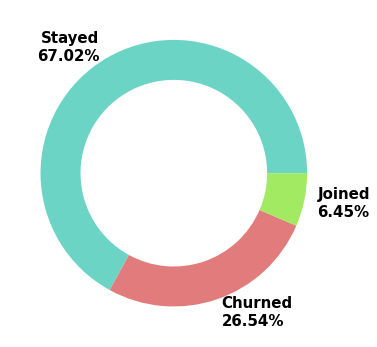

In [ ]:
#@title Frecuencia de cada tipo de cliente
fig, ax = plt.subplots(figsize=(6.13,6.13))
wheel_chart(df.customer_status, ax, [cat_palette[0],cat_palette[-1],cat_palette[1]],fontdict={ 'color': 'black','weight': 'bold','size': 15 })
fig.show()

(pd.concat([df.customer_status.value_counts().to_frame('Cantidad absoluta'),
        (df.customer_status.value_counts(normalize=True)*100).to_frame('Cantidad porcentual')], axis=1)
        .style.format({'Cantidad porcentual': '{:.2f}%'}))

### Cantidad de usuarios unicos y forma del dataset
* #### Clientes Unicos: 7043
* #### Shape: (7043, 39)


### Cantidad de nulos y tipos de columnas en el dataset

In [ ]:
df_info = pd.DataFrame({'column':df.columns,'n_nulls':df.isna().sum().values,'percent_nulls':df.isna().sum().values / len(df) * 100,'dtype':df.dtypes.values})
cm = sns.diverging_palette(220, 10, s=50, as_cmap=True)
df_info.style.background_gradient(cm)

### Breve info de que se trata cada columna

* Customer Status:
> Si el cliente sigue en el servicio, se unió o lo dejó (churned)
* Churn Category:
> La categoria del porque lo dejo (por ejemplo: Dissatisfaction, Competitor, etc). Es la mas importante de las 2 columnas.
* Churn Reason:
> La razon especifica del cliente de por que dejo el servicio.
* Gender, Age, Married, Number of Dependents:
> Datos personales de como es la persona , si esta casada o no y con cuanta gente vive.
* City, Zip Code, Latitude, Longitude, County:
> En que parte del estado vive el cliente.
* Number of Referrals, Tenure in Months:
> A cuanta gente le recomendo el servicio y cuantos meses lleva con el servicio (tenure)
* Offer, Phone Service, Multiple Lines, Avg Monthly Long Distance Charges:
> El plan que el cliente esta usando , si opto por usar el servicio telefonico en su casa, si tiene multiples lineas telefónicas y el gasto mensual promedio en llamadas a larga distancia (si el cliente no esta subscripto al servicio telefonico el valor es 0)
* Internet Service, Internet Type, Avg Monthly GB Download:
> Datos relacionados al servicio del internet, si no contrató el servicio de internet el tipo de internet esta como nulo y los GBs promedio tendran un valor igual a 0.
* Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data:
> Indican si optaron o no por cada uno de esos servicios.
* Contract, Paperless Billing, Payment Method, Monthly Charge:
> La forma y metodo de pago que eligio el cliente y cuanto se le cobra mensualmente.
* Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue:
> Gastos y reembolsos totales. Total revenue indica cuanto gano la empresa con este cliente.



# Contexto y Problema Comercial

## Contexto comercial:

En el area de telecomunicaciones, la rotación de los clientes que contratan y dejan los servicios es bastante comun y frecuente.
Las razones de porque dejan los servicios pueden tener diferentes motivos, pero se pueden dividir en 2 grandes grupos: **Evitables** e **Inevitables**.
>
#### Ahora, ¿que tipos de razones son evitables y cuales son inevitables?
Las razones inevitables son aquellas de las cuales la empresa no tiene control y/o culpa como, por ejemplo, cuando un cliente se muda o fallece.
>
Por otro lado las razones evitables son aquellas que tienen que ver con la calidad del servicio, la atencion que recibio el cliente e incluso la poca competitividad de la empresa comparada con otras del area.
>
#### Entonces, ¿que es lo que buscamos como empresa para crecer?
Lo que se busca como empresa es minimizar la cantidad de clientes que dejan aumentando la retención de los clientes, asi como tambien atraer a una mayor cantidad de clientes.
Los valores normales de churned tienen que estar por debajo de los que se unen ya que para que la empresa crezca la cantidad de clientes debe crecer.

## El problema comercial que tiene la empresa.

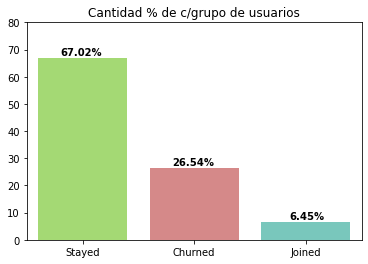

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))

porcentajes_clientes = round(df.customer_status.value_counts(normalize=True) *100,2)

g=sns.barplot(y=porcentajes_clientes.values,x=porcentajes_clientes.index,palette=[cat_palette[1],cat_palette[-1],cat_palette[0]])
ax.set_ylim(top=80)
for i, v in enumerate(porcentajes_clientes.values):
  if i < 2:
    ax.text(i-0.2 ,v+1 , str(v)+'%', fontweight='bold')
  else:
    ax.text(i-0.15 ,v+1 , str(v)+'%', fontweight='bold')
g.set_title('Cantidad % de c/grupo de usuarios')
plt.show()

Como se puede ver en el gráfico,en este ultimo cuatrimestre, tenemos muchos mas usuarios que dejaron el servicio que los que se unieron. Lo cual significa que la empresa esta perdiendo clientes y por ende mucho dinero.

El total de ganancias de este cuatrimestre fue de 
<font color='lime'>$\\$$21371131.69</font>
pero las ganancias provenientes de los usuarios que dejaron el servicio fueron de 
<font color='red'>$\\$$3684459.82</font>que representan
<font color='red'>17.24%</font> del total.

## Visto esto podemos hablar del Objetivo de este proyecto

El objetivo sera:
* Hacer un EDA con el fin de ver que causa y donde esta el problema para ver en que acciones tomar de forma inmediata.
* Crear 2 modelos de machine learning:
  * Un modelo de clasificación simple que nos entrega la probabilidad de que un cliente deje el servicio.
  * Y otro de clasificación multivariada que , si el primero predice que deja, prediga la razon mas probable de por la que lo va a dejar.

Con la información que den estos modelos se podra redirigir al departamento correspondiente dentro de la empresa con el fin de evitar que ese cliente deje el servicio.

# Abstract

## Ganancias:
El total de ganancias del Q2 2022 fue de 
<font color='lime'>$\\$$21371131.69</font>
pero las ganancias provenientes de los usuarios que dejaron el servicio fueron de 
<font color='red'>$\\$$3684459.82</font>que representan
<font color='red'>17.24%</font> del total.

## Info de cantidad de usuarios:


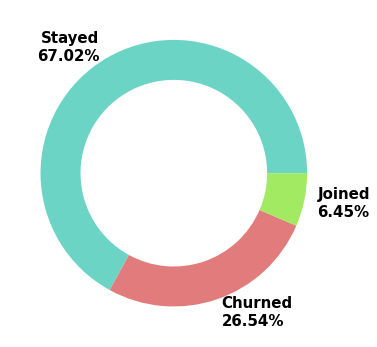

In [ ]:
#@markdown Tenemos muchos mas usuarios que dejaron el servicio en comparación los que se unieron, lo cual es un problema.
fig, ax = plt.subplots(figsize=(6.13,6.13))
wheel_chart(df.customer_status, ax, [cat_palette[0],cat_palette[-1],cat_palette[1]],fontdict={ 'color': 'black','weight': 'bold','size': 15 })
fig.show()

df_info = (pd.concat([df.customer_status.value_counts().to_frame('Cantidad absoluta'),
        (df.customer_status.value_counts(normalize=True)*100).to_frame('Cantidad porcentual')], axis=1))

df_info['Cantidad porcentual'] = [str(round(v,2)) +'%' for v in df_info['Cantidad porcentual']]
def marcar_churned_joined_stayed(column):
    churned = f'background-color: {cat_palette[-1]}; color: black;'
    stayed = f'background-color: {cat_palette[1]}; color: black;'
    joined = f'background-color: {cat_palette[0]}; color: black;'
    default = ''
    return [ stayed if v == column.max() else joined if v == column.min() else churned for v in column ]

df_info = df_info.style.apply(marcar_churned_joined_stayed,subset=['Cantidad porcentual'],axis=0)
df_info

## Info de los churned:
La ciudad que mas perdida causo fue San Diego con un 10% del total de perdidas por churned, seguido por Los Angeles con 4% del total.
Pero si lo vemos a una escala mas grande a nivel de condados en vez de ciudad podemos ver que los condados mas affectados fueron el de Los Angeles con el 18% y el de Sandiego con 14% representando juntos casi un 32% del total de las perdidas.
Otros condados relevantes fueron Orange, Riverside, Sacramento y Santa Clara que juntos suman alrededor del 15% del total.

In [ ]:
# @markdown ### Ubicación de los usuarios por categoría
#redondeo la lat y long de cada grupo para agruparlos un poco
joined_df_lat_long_redond = df[df.customer_status == 'Joined'][['latitude','longitude','customer_status']].groupby(by=['latitude','longitude', 'customer_status']).size()
joined_df_lat_long_redond = joined_df_lat_long_redond.reset_index().rename({0:'densidad'},axis=1)

stayed_df_lat_long_redond = df[df.customer_status == 'Stayed'][['latitude','longitude','customer_status']].groupby(by=['latitude','longitude','customer_status']).size()
stayed_df_lat_long_redond = stayed_df_lat_long_redond.reset_index().rename({0:'densidad'},axis=1)

churned_df_lat_long_redond = df[df.customer_status == 'Churned'][['latitude','longitude','customer_status']].groupby(by=['latitude','longitude','customer_status']).size()
churned_df_lat_long_redond = churned_df_lat_long_redond.reset_index().rename({0:'densidad'},axis=1)

df_plot = pd.concat([stayed_df_lat_long_redond,
                     joined_df_lat_long_redond,
                     churned_df_lat_long_redond], axis=0)

# build figures for each of the required columns
figs = [
    px.density_mapbox(df_plot[df_plot.customer_status==x], lat='latitude', lon='longitude', z='densidad', radius=30,
                        center=dict(lat=37.48, lon=-119.756684), zoom=4.5,
                        mapbox_style="open-street-map")
    for x in ["Churned", "Stayed", "Joined"] 
]
figs.append(px.density_mapbox(df_plot, lat='latitude', lon='longitude', z='densidad', radius=30,
                        center=dict(lat=37.48, lon=-119.756684), zoom=4.5,opacity=0,
                        mapbox_style="open-street-map"))

# Build App
app = JupyterDash(__name__)

app.layout = dash.html.Div(
    [
        dash.dcc.RadioItems(id = 'checklist-customer',
                        options = [
                            {"label": x, "value":i} for i, x in enumerate(["Churned", "Stayed", "Joined", "clean"])
                            ],
                        value = 0,
                        labelStyle={'display':'inline-block','color':'orange'}
                    ),
        dash.dcc.Graph(
            id="map",
        ),
    ]
)

@app.callback(Output("map", "figure"), Input( "checklist-customer", "value"))
def updateGraph(val):
    return figs[val].update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Run app and display result inline in the notebook
app.run_server(mode="inline")

<IPython.core.display.Javascript object>

## Info causas de los churned:
La razon mas predominante de los churned en los 15 condados mas poblados del estado fue la competencia causando <font color='red'>**46%</font> de perdidas monetarias**, entre 30-70% de la cantidad de usuarios perdidos dependiendo del condado **y el <font color='red'>76%</font> de los usuarios en San Diego**.
>
Dentro de esta categoria la mayoria es causada porque **la competencia ofrece mejores dispositivos y ofertas.**
>
Las otras 2 razones mas predominantes fueron las relacionadas con la **dissatisfación de los clientes y la actitud del soporte y proveedores.**
que son el **32% de las perdidas monetarias**
>
La actitud del soporte y proveedores es en general 15-35% de la cantidad de churned por condado.
>
Se puede observar en **Fresno, Orange, Kern, Ventura y San Bernandino** como los principales **con este problema** y San Diego, San Francisco y Sacramento donde este problema es minimo.
>
Por la disatisfacción de los clientes,este problema representa aproximadamente 15-30% de los churned en cada condado. En los unicos en los que no se presenta a gran tamaño es en San Diego y Kern y en los que peor impactan estas razones son Los Angeles, Contra Costa y San Bernandino.
>
Luego estan las otras causas , que son las que estan fuera de nuestro control o alcance como el fallecimiento de un cliente,se mudo o porque no quiso contestar, que son el 10% de las perdidas totales.

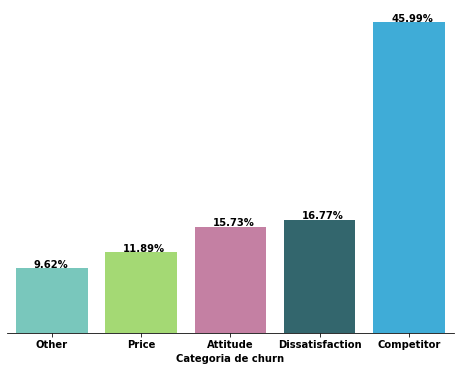

In [ ]:
plot_churn_cat_rev_percent(df[df.customer_status=='Churned'],cat_palette)

Si bien, la que domina es la competencia la proporcion va variando por condado como se puede ver en este gráfico.

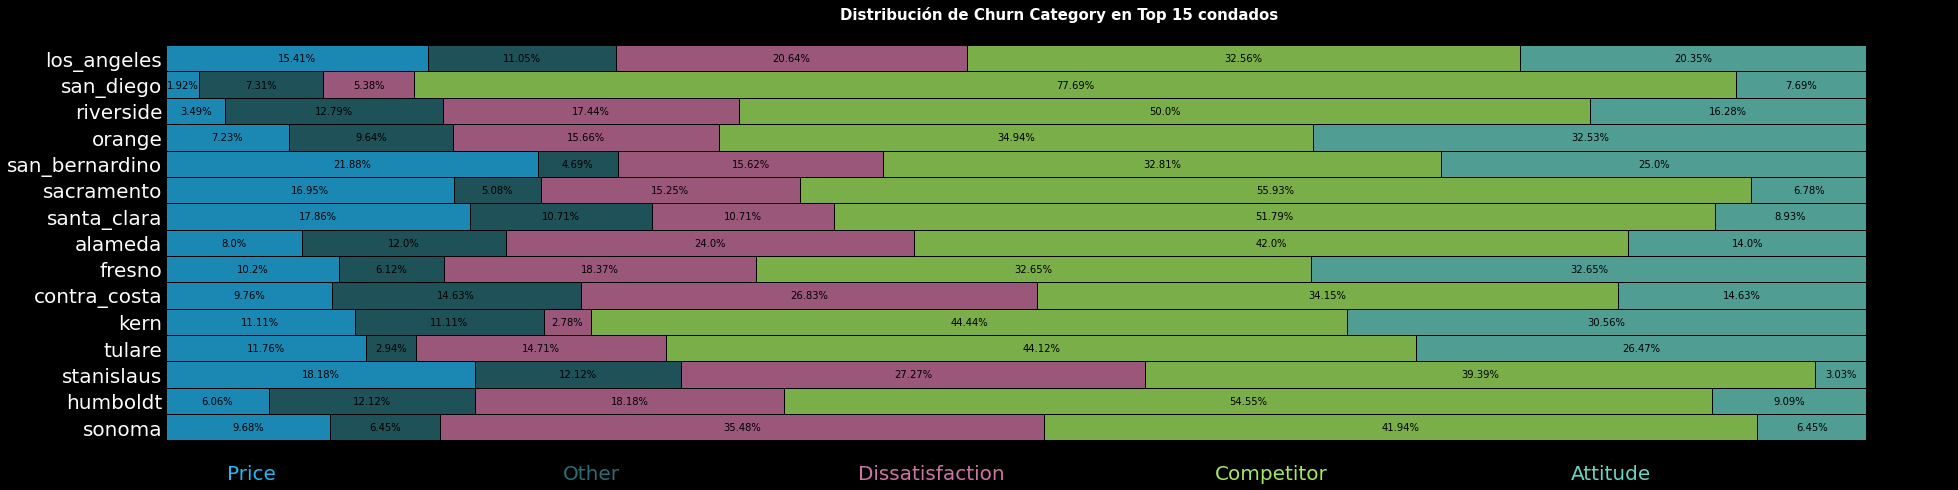

In [ ]:
#@markdown Si bien, la que domina es la competencia la proporcion va variando por condado como se puede ver en este gráfico.
#saco los 15 condados con ams churned
top_15_counties = list(df[df.customer_status=='Churned'].county.value_counts()[:15].keys())

cond = ((df.county.isin(top_15_counties)) & (df.customer_status=='Churned'))
distribution = pd.crosstab(df['county'], df[cond]['churn_category'], normalize='index')  #me da un stack en 2d
distribution = distribution.stack().reset_index(name='%')
plot_stacked_bar_distribution(distribution,colors=cat_palette[:5])

**Cantidad porcentual de cada razon de churn por condado**

|Churn Reason|Los Angeles|San Diego|Orange|Riverside|San Bernandino|Sacramento|Santa Clara|Alameda|Fresno|Contra Costa|Kern|San Francisco|San Joaquin|San Mateo|Ventura
|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---
|Attitude of support person|1.9608|2.4896|13.3333|5.6338|9.8361|3.5714|2.0|0.0|17.3913|5.7143|15.625|0.0|7.6923|7.4074|12.5
|Competitor had better devices|20.915|5.8091|22.6667|14.0845|16.3934|3.5714|8.0|15.9091|17.3913|11.4286|18.75|7.6923|7.6923|14.8148|29.1667
|Competitor made better offer|18.9542|4.5643|20.0|15.493|29.5082|21.4286|24.0|27.2727|15.2174|14.2857|31.25|23.0769|26.9231|22.2222|8.3333
|Competitor offered higher download speeds|5.2288|76.7635|6.6667|30.9859|1.6393|10.7143|10.0|6.8182|10.8696|11.4286|3.125|11.5385|7.6923|11.1111|4.1667
|Competitor offered more data|6.2092|1.2448|6.6667|4.2254|1.6393|16.0714|10.0|4.5455|4.3478|8.5714|12.5|15.3846|7.6923|0.0|4.1667
|Extra data charges|6.2092|1.2448|5.3333|7.0423|1.6393|10.7143|14.0|9.0909|4.3478|5.7143|3.125|15.3846|11.5385|11.1111|8.3333
|Lack of affordable download/upload speed|4.5752|0.4149|1.3333|0.0|3.2787|7.1429|2.0|4.5455|4.3478|2.8571|3.125|3.8462|0.0|0.0|4.1667
|Lack of self-service on Website|2.6144|0.0|1.3333|0.0|3.2787|3.5714|2.0|0.0|2.1739|0.0|0.0|0.0|0.0|0.0|4.1667
|Limited range of services|1.634|1.2448|2.6667|1.4085|1.6393|0.0|2.0|2.2727|2.1739|2.8571|0.0|0.0|3.8462|0.0|0.0
|Long distance charges|3.5948|0.4149|1.3333|2.8169|1.6393|3.5714|2.0|2.2727|0.0|8.5714|0.0|0.0|0.0|3.7037|4.1667
|Network reliability|4.2484|0.8299|2.6667|0.0|8.1967|1.7857|2.0|2.2727|2.1739|2.8571|3.125|0.0|7.6923|3.7037|4.1667
|Poor expertise of online support|5.5556|0.4149|4.0|5.6338|3.2787|1.7857|2.0|2.2727|4.3478|11.4286|0.0|3.8462|0.0|3.7037|4.1667
|Poor expertise of phone support|1.3072|1.6598|1.3333|1.4085|0.0|1.7857|0.0|4.5455|0.0|0.0|3.125|0.0|0.0|0.0|0.0
|Price too high|0.6536|0.0|0.0|0.0|0.0|0.0|0.0|4.5455|0.0|0.0|0.0|0.0|0.0|0.0|0.0
|Product dissatisfaction|5.8824|0.8299|2.6667|2.8169|8.1967|5.3571|14.0|2.2727|2.1739|5.7143|6.25|7.6923|3.8462|11.1111|4.1667
|Service dissatisfaction|5.5556|1.6598|4.0|7.0423|6.5574|1.7857|2.0|6.8182|8.6957|2.8571|0.0|7.6923|7.6923|3.7037|4.1667

# EDA

## Resumen del EDA

* La competencia es la razon principal de porque tenemos tantos churned, habria que aumentar nuestra competividad ofreciendo mejores ofertas, dispositivos
* Hay una cantidad importante de disatisfaccion con el servicio (entre 15-30% de las razones) en la mayoria de los condados principales exceptuando San Diego y Kern.
* La mala atencion del servicio y del proveedor es motivo del 15 al 37% en la mayoria de los condados, siendo los mas problematicos Ventura, Kern, Fresno y Orange. Los condados que menos tienen de este problema son San Francisco, San Diego, Santa Clara y Sacramento donde poseen entre 6-9%, habria que ver que esta pasando con la actitud de los empleados de soporte y proveedores para corregirla.
* Los precios del servicio fueron relevantes en los condados de Los Angeles, San Bernandino, Sacramento ,San Mateo Ventura y Santa Clara con 14-22% de los churned.

* Los condados con mas perdidas fueron Los Angeles y San Diego que juntos representan 30% de los churned.

* Los usuarios que pagan la oferta E y los que no tienen oferta tienen una gran chance de dejar el servicio.

Sobre el servicio:
* Parece que hay problemas con la fibra optica, pueden provenir por ser uno de los servicios de internet mas comunes ofrecidos causando que haya mas volumen, asi como tambien puede proveenir de las fallas e inestabilidad en la red.

* Se ve que hay mas churned que contrataron servicios de streaming de peliculas y tv, se puede deber al catálogo de las mismas y/o a inestabilidades en el servicio. Habria que conseguir datos de los mismos para entrar en detalle al por qué.

* Por otro lado los usuarios que contratan DSL, Servicio premium de soporte y el servicio de seguridad online tienden a quedarse asi que esos deben funcionar como deben.


In [ ]:
# ProfileReport(df)

## ¿Cómo le fue a la empresa en el Q2 2022?¿Cuánto de lo recaudado provenia de los churned?

Antes que nada veamos si realmente tienen un problema monetario por esos usuarios churned, ya que pueden ser que solo churnearan los usuarios que no aportan mucho a las ganancias.

El total de ganancias del Q2 2022 fue de:  $21371131.69
Las ganancias provenientes de los churned fue de:  $3684459.82
que equivale a 17.24% de las ganancias totales


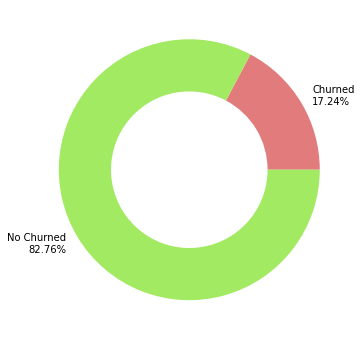

In [ ]:
#@markdown
total_revenue = df.total_revenue.sum()
total_churned_revenue =df[df.customer_status == 'Churned'].total_revenue.sum()
total_not_churned_revenue =df[df.customer_status != 'Churned'].total_revenue.sum() 

revenue_lost = round(total_churned_revenue,2)
percent_lost = round(revenue_lost/total_revenue * 100,2)

temp_dict={'Total':[total_revenue],'Churned':[total_churned_revenue],'Not Churned':[total_not_churned_revenue]}
report_df = pd.DataFrame(temp_dict)
report_df = report_df.stack(0).reset_index()

print(f'El total de ganancias del Q2 2022 fue de:  {bcolors.OKGREEN}${total_revenue}{bcolors.ENDC}\nLas ganancias provenientes de los churned fue de:  {bcolors.FAIL}${revenue_lost}{bcolors.ENDC}\nque equivale a {bcolors.FAIL}{percent_lost}%{bcolors.ENDC} de las ganancias totales')

fig, ax = plt.subplots(figsize=(6,6))
report_df = report_df.rename(columns = {0:'revenue'})

cmap = sns.color_palette([cat_palette[-1],cat_palette[1]])
size_of_groups = round(report_df.revenue.iloc[1:3] / report_df.revenue.iloc[0] * 100,2)
labels = [i + f'\n{g}%'for i,g in zip(['Churned', 'No Churned'],size_of_groups)]
ax.pie(size_of_groups,labels=labels, radius=1,colors = cmap,
        wedgeprops=dict(width=0.4))
fig.show()

Se confirma que estos churned son un problema ya que son el 17% de las ganancias del ultimo quatrimestre.

Sigamos con genralidades de los datos para ver como se distribuyen, si hay correlaciones entre las columnas o outliers en alguna. Luego volvemos a las preguntas.

## Matriz de correlaciones

In [ ]:
#separo en categoricas y numericas
numericas = pd.DataFrame({c: df.select_dtypes(exclude='object')[c] for c in df.select_dtypes(exclude='object')})
categoricas = pd.DataFrame({c: df.select_dtypes('object')[c] for c in df.select_dtypes('object')})

In [ ]:
fig = px.imshow(numericas.corr().round(2), text_auto=True, aspect="auto",color_continuous_scale="icefire")
fig.show()

* total_revenue tiene una tendencia altamente positiva con tenure_in_months, total_charges, total_long_distance_charges
y levemente positiva con monthly_charge. 
>
Lo cual nos dice que recaudamos mas a mas tiempo se queden los usuarios en el servicio y a mas que le cobramos(hasta cierto punto).
* la cantidad de gb gastados mensualmente tiene una tendencia levemente negativa a medida que aumenta la edad, tiene sentido ya que las personas mas viejas tienden a usar menos los servicios de internet.

* hay una muy leve tendencia positiva entre la tenure y la cantidad de referals y tambien entre los cargos mensuales y la  tenure.

## Outliers y distribucion

### avg_monthly_long_distance_charges y avg_monthly_gb_download

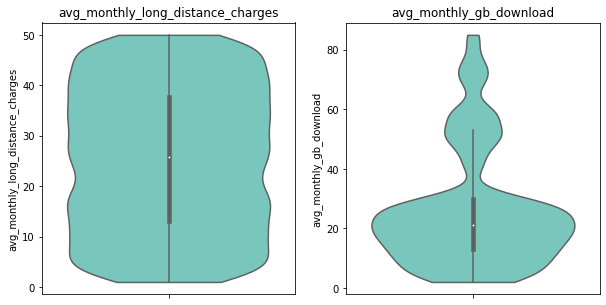

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.violinplot(y = df.avg_monthly_long_distance_charges , ax=ax[0],title='avg_monthly_long_distance_charges',color=cat_palette[0] ,cut=0)
ax[0].set_title('avg_monthly_long_distance_charges')
sns.violinplot(y = df.avg_monthly_gb_download , ax=ax[1],title='avg_monthly_gb_download',color=cat_palette[0] ,cut=0)
ax[1].set_title('avg_monthly_gb_download')
plt.show()

In [ ]:
df[['avg_monthly_long_distance_charges','avg_monthly_gb_download']].describe()

avg_monthly_long_distance_charges  avg_monthly_gb_download
count                        6361.000000              5517.000000
mean                           25.420517                26.189958
std                            14.200374                19.586585
min                             1.010000                 2.000000
25%                            13.050000                13.000000
50%                            25.690000                21.000000
75%                            37.680000                30.000000
max                            49.990000                85.000000

In [ ]:
#veo cuanto % estan por arriba del 3er cuartil en avg_monthly_gb_download
len(df[df.avg_monthly_gb_download > 30]) / len(df) * 100 , len(df[df.avg_monthly_gb_download > 30])

(17.066590941360214, 1202)

Deacuerdo al diagrama de violin avg_monthly_long_distance_charges no tiene outliers y tiene una distribución bastante pareja.

>

avg_monthly_gb_download por el otro lado tiene un 17% de los registros por arriba del 75% y parece que tiene una principal mayoria cerca de la mediana y otras 2 mas pequeñas cerca de 50 y 80gb

### monthly_charge,	total_charges y total_revenue

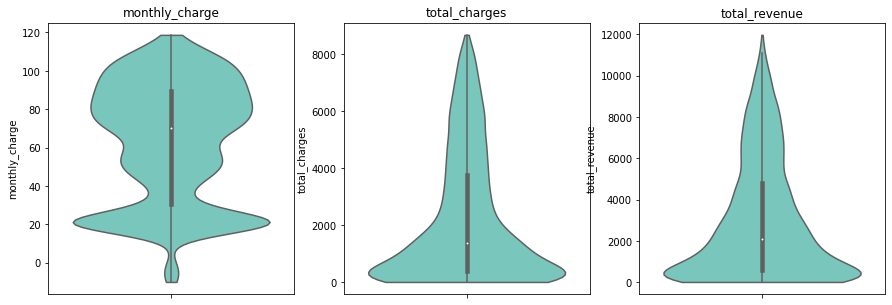

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.violinplot(y = df.monthly_charge, ax=ax[0], color=cat_palette[0], cut=0)
ax[0].set_title('monthly_charge')
sns.violinplot(y = df.total_charges, ax=ax[1], color=cat_palette[0], cut=0)
ax[1].set_title('total_charges')
sns.violinplot(y = df.total_revenue, ax=ax[2], color=cat_palette[0], cut=0)
ax[2].set_title('total_revenue')
plt.show()

In [ ]:
df[['monthly_charge','total_charges','total_revenue']].describe()

monthly_charge  total_charges  total_revenue
count     7043.000000    7043.000000    7043.000000
mean        63.596131    2280.381264    3034.379056
std         31.204743    2266.220462    2865.204542
min        -10.000000      18.800000      21.360000
25%         30.400000     400.150000     605.610000
50%         70.050000    1394.550000    2108.640000
75%         89.750000    3786.600000    4801.145000
max        118.750000    8684.800000   11979.340000

* total revenue tiene muy pocos outliers que estan por encima del 75%
* monthly charge tiene 2 modas, la principal por $20 y la otra entre 80 y 100. Tambien tiene valores por debajo de 0, lo cual no tiene mucho sentido

Veamos Total Revenue en mas detalle

#### Total revenue por categoría de usuario

In [ ]:
fig = px.box(df,y='total_revenue', x='customer_status',color="customer_status",color_discrete_sequence=[cat_palette[0],cat_palette[-1],cat_palette[1]])
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [ ]:
#@markdown Parece que hay muchos outliers en la categoria churned pero en realidad no lo son ya que este porcentaje alto de atipicos ,por criterio intercuartil, seria marcado como normal en el grupo de stayed por ende podrian ser clientes que eran parte de los stayed en un pasado y que dejaron el servicio los cuales serian datos importantes para predecir si un cliente va a dejar o no. Por si las dudas hago un boxplot con todas las clases juntas.
df.groupby("customer_status").total_revenue.describe()

count         mean          std    min        25%       50%  \
customer_status                                                                 
Churned          1869.0  1971.353569  2438.441813  21.61   175.8500   893.550   
Joined            454.0   119.558921    89.466565  21.36    56.9700    91.095   
Stayed           4720.0  3735.676297  2852.938745  73.65  1307.5375  2960.110   

                     75%       max  
customer_status                     
Churned          2888.76  11195.44  
Joined            166.24    456.10  
Stayed           5857.33  11979.34

### total_extra_data_charges, total_long_distance_charges

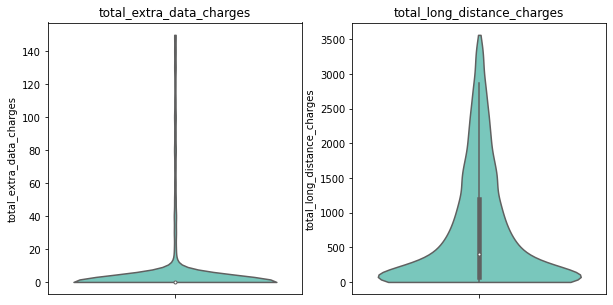

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.violinplot(y = df.total_extra_data_charges , ax=ax[0], color=cat_palette[0] ,cut=0)
ax[0].set_title('total_extra_data_charges')
sns.violinplot(y = df.total_long_distance_charges , ax=ax[1], color=cat_palette[0], cut=0)
ax[1].set_title('total_long_distance_charges')
plt.show()

In [ ]:
df[['total_extra_data_charges','total_long_distance_charges']].describe()

total_extra_data_charges  total_long_distance_charges
count               7043.000000                  7043.000000
mean                   6.860713                   749.099262
std                   25.104978                   846.660055
min                    0.000000                     0.000000
25%                    0.000000                    70.545000
50%                    0.000000                   401.440000
75%                    0.000000                  1191.100000
max                  150.000000                  3564.720000

In [ ]:
# total_long_distance_charges
len(df[df.total_long_distance_charges > 1191.10]) / len(df) * 100 , len(df[df.total_long_distance_charges > 1191.10])

(25.003549623739886, 1761)

In [ ]:
#total_extra_data_charges
len(df[df.total_extra_data_charges > 0]) / len(df) * 100 , len(df[df.total_extra_data_charges > 0])

(10.336504330540963, 728)

* por total_extra_data_charges: No creo que sean outliers ya que no todos los usuarios consumen datos demas y la mayoria esta en 0
* por los cargos a larga distancia: parece que la mayoria de los usuarios no hace llamadas a larga distancia haciendo que ese 25% ,que si hace llamadas a larga distancia, parezcan  outliers.

## ¿Hay alguna ciudad o area donde haya mas churned que el resto, o algún patron en la ubicación de los churned?

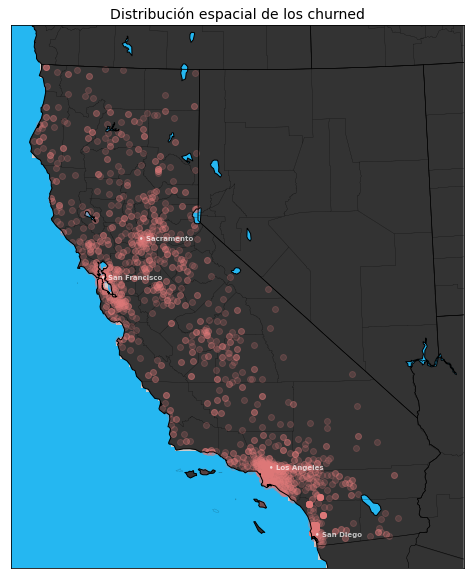

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_scatter_map(df[(df.customer_status=='Churned')],title="Distribución espacial de los churned",alpha=0.2,
        ax = ax,dot_color=cat_palette[-1],land_color=div_palette[4],water_col=cat_palette[4],fontdict ={'color': 'black', 'weight': 'bold', 'size': 7})

Parece que los focos con mas churned son cerca las ciudades mas importantes del estado, como era de esperarse ya que son las zonas mas pobladas. Veamos si hay tendencias entre ciertos motivos de churn en alguna ciudad o condado en especifico.

## ¿Que condados tienen mas churned y cuanto % del total tienen?

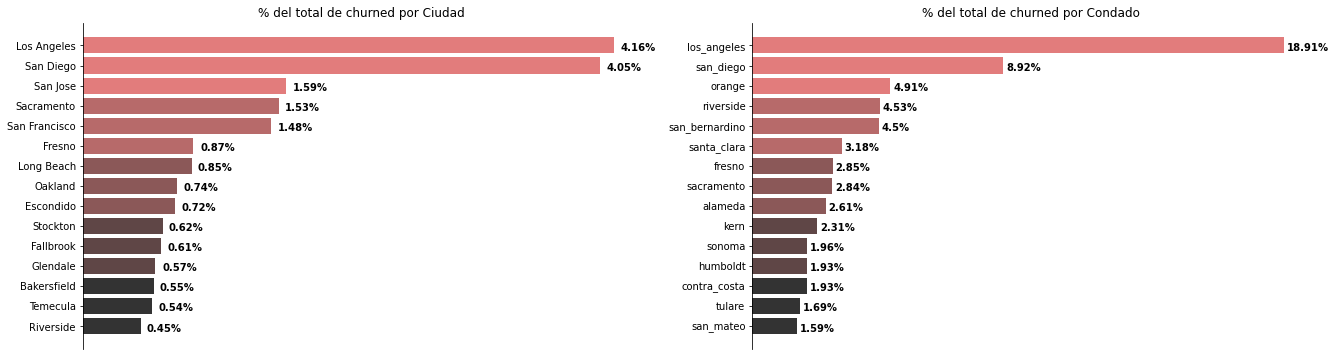

In [ ]:
#@markdown 
fig, ax = plt.subplots(1,2,figsize=(22,6))
ax=ax.flatten()

colors = [div_palette[0], div_palette[0], div_palette[0], div_palette[1], div_palette[1], 
            div_palette[1], div_palette[2], div_palette[2], div_palette[2], div_palette[3],
            div_palette[3], div_palette[3], div_palette[4], div_palette[4], div_palette[4],]

ax[0].barh(df.city.value_counts(normalize=True).index[:15],df.city.value_counts(normalize=True)[:15] * 100,color=colors)
ax[0].set_title('% del total de churned por Ciudad')
ax[0].invert_yaxis()
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_xticks([])

for i, v in enumerate(round(df.city.value_counts(normalize=True)[:15] * 100,2).values):
    ax[0].text(v + 0.05, i + .25, str(v)+'%', fontweight='bold')

ax[1].set_title('% del total de churned por Condado')
ax[1].barh(df.county.value_counts(normalize=True).index[:15],df.county.value_counts(normalize=True)[:15] * 100,color=colors)
ax[1].invert_yaxis()
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].set_xticks([])

for i, v in enumerate(round(df.county.value_counts(normalize=True)[:15] * 100,2).values):
    ax[1].text(v + 0.1, i + .25, str(v)+'%', fontweight='bold')
fig.show()

Los condados con mas churned son San Diego y Los Angeles, representando 30% aprox del total de churned.

Los top 15 condados en churned representan 66.29% del total, decidí no seguir agregando ya que cada condado que agregaba me estaba dando cada vez menos % del total

##  ¿Que categorias de churn predominan en los 15 condados mas poblados del estado?

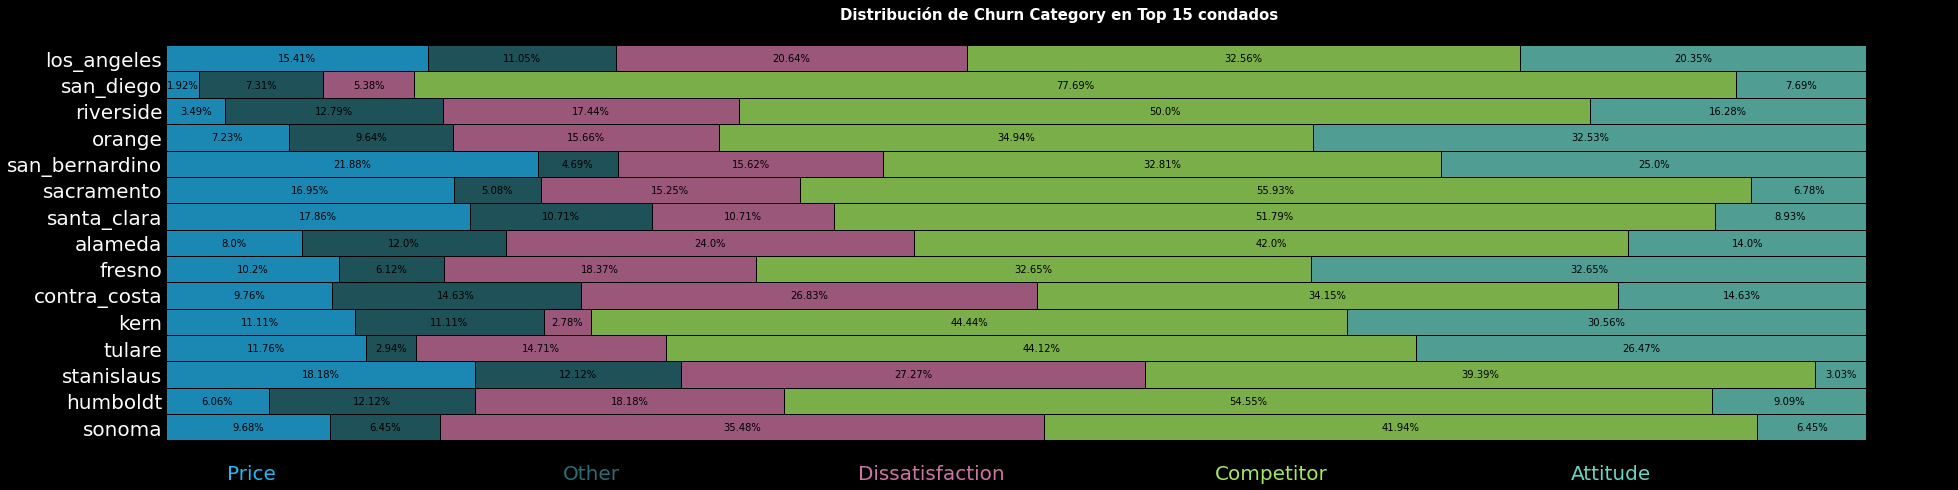

In [ ]:
top_15_counties = list(df[df.customer_status=='Churned'].county.value_counts()[:15].keys())

cond = ((df.county.isin(top_15_counties)) & (df.customer_status=='Churned'))
distribution = pd.crosstab(df['county'], df[cond]['churn_category'], normalize='index')  #me da un stack en 2d
distribution = distribution.stack().reset_index(name='%')
plot_stacked_bar_distribution(distribution,colors=cat_palette[:5])

## ¿Que razones especificas predominan en los 15 condados mas poblados del estado?

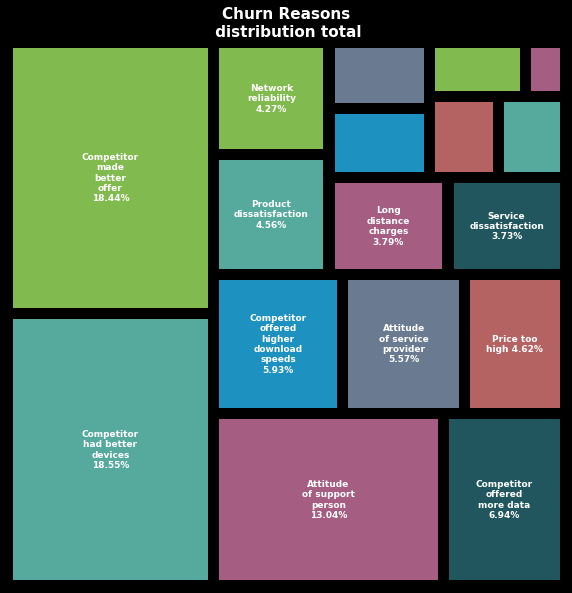

In [ ]:
plot_box_map(df[df.customer_status=='Churned'],
             cat_palette,
             figsize=(10,10),
             fontdict={'color': 'white',
                                'fontsize': 9, 
                                'fontweight': 'bold', 
                                'horizontalalignment': 'center'})

**Cantidad porcentual de cada razon de churn por condado**

|Churn Reason|Los Angeles|San Diego|Orange|Riverside|San Bernandino|Sacramento|Santa Clara|Alameda|Fresno|Contra Costa|Kern|San Francisco|San Joaquin|San Mateo|Ventura
|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---
|Attitude of support person|1.9608|2.4896|13.3333|5.6338|9.8361|3.5714|2.0|0.0|17.3913|5.7143|15.625|0.0|7.6923|7.4074|12.5
|Competitor had better devices|20.915|5.8091|22.6667|14.0845|16.3934|3.5714|8.0|15.9091|17.3913|11.4286|18.75|7.6923|7.6923|14.8148|29.1667
|Competitor made better offer|18.9542|4.5643|20.0|15.493|29.5082|21.4286|24.0|27.2727|15.2174|14.2857|31.25|23.0769|26.9231|22.2222|8.3333
|Competitor offered higher download speeds|5.2288|76.7635|6.6667|30.9859|1.6393|10.7143|10.0|6.8182|10.8696|11.4286|3.125|11.5385|7.6923|11.1111|4.1667
|Competitor offered more data|6.2092|1.2448|6.6667|4.2254|1.6393|16.0714|10.0|4.5455|4.3478|8.5714|12.5|15.3846|7.6923|0.0|4.1667
|Extra data charges|6.2092|1.2448|5.3333|7.0423|1.6393|10.7143|14.0|9.0909|4.3478|5.7143|3.125|15.3846|11.5385|11.1111|8.3333
|Lack of affordable download/upload speed|4.5752|0.4149|1.3333|0.0|3.2787|7.1429|2.0|4.5455|4.3478|2.8571|3.125|3.8462|0.0|0.0|4.1667
|Lack of self-service on Website|2.6144|0.0|1.3333|0.0|3.2787|3.5714|2.0|0.0|2.1739|0.0|0.0|0.0|0.0|0.0|4.1667
|Limited range of services|1.634|1.2448|2.6667|1.4085|1.6393|0.0|2.0|2.2727|2.1739|2.8571|0.0|0.0|3.8462|0.0|0.0
|Long distance charges|3.5948|0.4149|1.3333|2.8169|1.6393|3.5714|2.0|2.2727|0.0|8.5714|0.0|0.0|0.0|3.7037|4.1667
|Network reliability|4.2484|0.8299|2.6667|0.0|8.1967|1.7857|2.0|2.2727|2.1739|2.8571|3.125|0.0|7.6923|3.7037|4.1667
|Poor expertise of online support|5.5556|0.4149|4.0|5.6338|3.2787|1.7857|2.0|2.2727|4.3478|11.4286|0.0|3.8462|0.0|3.7037|4.1667
|Poor expertise of phone support|1.3072|1.6598|1.3333|1.4085|0.0|1.7857|0.0|4.5455|0.0|0.0|3.125|0.0|0.0|0.0|0.0
|Price too high|0.6536|0.0|0.0|0.0|0.0|0.0|0.0|4.5455|0.0|0.0|0.0|0.0|0.0|0.0|0.0
|Product dissatisfaction|5.8824|0.8299|2.6667|2.8169|8.1967|5.3571|14.0|2.2727|2.1739|5.7143|6.25|7.6923|3.8462|11.1111|4.1667
|Service dissatisfaction|5.5556|1.6598|4.0|7.0423|6.5574|1.7857|2.0|6.8182|8.6957|2.8571|0.0|7.6923|7.6923|3.7037|4.1667

 * **La competencia es la razon principal** de los churned en los condados representando en general 30-70% de los churned.Los unicos condados donde no es la principal son Fresno, Orange y Ventura donde estan empatados o superados por probelmas en la actitud del soporte.
>
En la mayoria de los condados ,entre las razones de la competencia, predomina que ofrece mejores dispositivos. La excepcion a esto es San Diego donde domina la mejor oferta por parte de los competidores.
>
 * **La razon secundaria es la actitud del soporte y del proveedor** de cada condado representando en general 15-35% de los churned.Se puede observar en Fresno, Orange, Kern, Ventura y San Bernandino como los principales con este problema y San Diego, San Francisco y Sacramento donde este problema es minimo
>
 * **Y las razones terciarias** son disatisfaccion con los productos,servicios y los precios tanto del servicio como de los cargos a larga distancia.
>
Este problema representa aproximadamente 15-30% de los churned en cada condado. En los unicos en los que no se presenta a gran tamaño es en San Diego y Kern y
en los que peor impactan estas razones son Los Angeles, Contra Costa y San Bernandino.

## ¿Cómo le fue a la empresa en el Q2 2022?¿Cuánto de lo recaudado provenia de los churned?

El total de ganancias del Q2 2022 fue de:  $21371131.69
Las ganancias provenientes de los churned fue de:  $3684459.82
que equivale a 17.24% de las ganancias totales


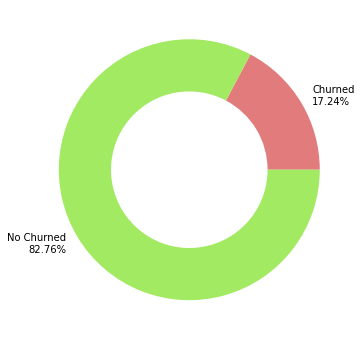

In [ ]:
#@markdown
total_revenue = df.total_revenue.sum()
total_churned_revenue =df[df.customer_status == 'Churned'].total_revenue.sum()
total_not_churned_revenue =df[df.customer_status != 'Churned'].total_revenue.sum() 

revenue_lost = round(total_churned_revenue,2)
percent_lost = round(revenue_lost/total_revenue * 100,2)

temp_dict={'Total':[total_revenue],'Churned':[total_churned_revenue],'Not Churned':[total_not_churned_revenue]}
report_df = pd.DataFrame(temp_dict)
report_df = report_df.stack(0).reset_index()

print(f'El total de ganancias del Q2 2022 fue de:  {bcolors.OKGREEN}${total_revenue}{bcolors.ENDC}\nLas ganancias provenientes de los churned fue de:  {bcolors.FAIL}${revenue_lost}{bcolors.ENDC}\nque equivale a {bcolors.FAIL}{percent_lost}%{bcolors.ENDC} de las ganancias totales')

fig, ax = plt.subplots(figsize=(6,6))
report_df = report_df.rename(columns = {0:'revenue'})

cmap = sns.color_palette([cat_palette[-1],cat_palette[1]])
size_of_groups = round(report_df.revenue.iloc[1:3] / report_df.revenue.iloc[0] * 100,2)
labels = [i + f'\n{g}%'for i,g in zip(['Churned', 'No Churned'],size_of_groups)]
ax.pie(size_of_groups,labels=labels, radius=1,colors = cmap,
        wedgeprops=dict(width=0.4))
fig.show()

## ¿En qué ciudades se perdio mas dinero?¿Sigue el mismo patrón de ciudades que en el analisis espacial por cantidad?

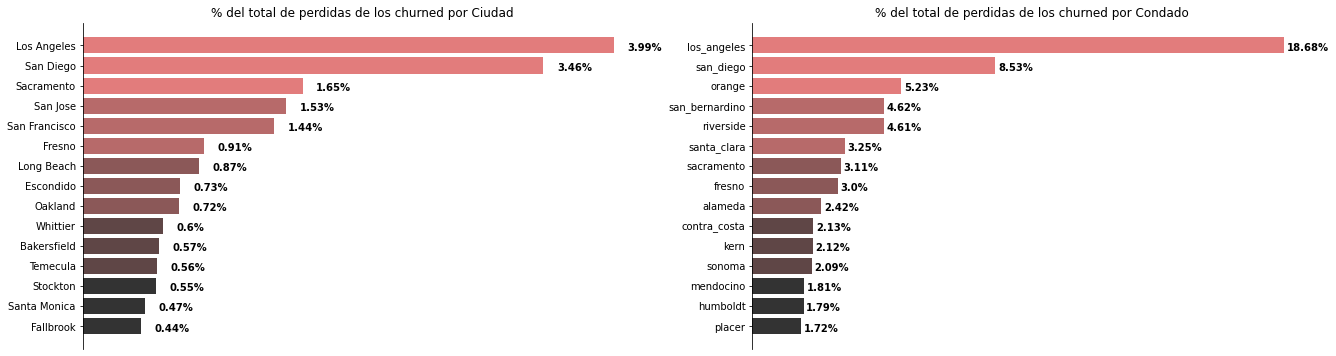

In [ ]:
# @markdown 
fig, ax = plt.subplots(1,2,figsize=(22,6))
ax=ax.flatten()

colors = [div_palette[0], div_palette[0], div_palette[0], div_palette[1], div_palette[1], 
            div_palette[1], div_palette[2], div_palette[2], div_palette[2], div_palette[3],
            div_palette[3], div_palette[3], div_palette[4], div_palette[4], div_palette[4],]

top_15_cities = df.groupby('city').total_revenue.sum().sort_values(ascending=False)[:15] / df.total_revenue.sum() * 100
top_15_counties = df.groupby('county').total_revenue.sum().sort_values(ascending=False)[:15] / df.total_revenue.sum() * 100

ax[0].barh(top_15_cities.index[:15],top_15_cities[:15].values,color=colors)
ax[0].set_title('% del total de perdidas de los churned por Ciudad')
ax[0].invert_yaxis()
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_xticks([])
ax[0].grid(False)

for i, v in enumerate(round(top_15_cities[:15],2).values):
    ax[0].text(v + 0.1, i + .25, str(v)+'%', fontweight='bold')

ax[1].set_title('% del total de perdidas de los churned por Condado')
ax[1].barh(top_15_counties.index[:15],top_15_counties[:15].values,color=colors)
ax[1].invert_yaxis()
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].set_xticks([])
ax[1].grid(False)

for i, v in enumerate(round(top_15_counties[:15],2).values):
    ax[1].text(v + 0.1, i + .25, str(v)+'%', fontweight='bold')
fig.show()

In [ ]:
pd.DataFrame({'city':top_15_cities.keys(),
              'city_revenue':top_15_cities.values,
              'county':top_15_counties.keys(),
              'county_revenue':top_15_counties.values}).style.background_gradient(cmap="Reds")

El patron de las ciudades y condados mas problematicos se repite al del analisis por cantidad.
>
El top 15 de ciudades solamente representa el **27,74%** del total perdido ($\\$$ 1022120.55)
>
Las Ciudades que mas dinero perdieron fueron:
* San Diego con **10,46%** del total perdido ($\\$$ 385446.39)
*  Los Angeles con **3,99%** del total perdido ($\\$$ 147090.46)
* El resto del top 15 representan entre **0.6% y 1.6%** del total perdido)
>

El top 15 de los condados representa el **65,36%** del total perdido
>
Los Condados que mas dinero perdieron fueron:
* Los Angeles con **17.95%** del total perdido ($\\$$ 661439.28)
* San Diego con **14.29%** del total perdido ($\\$$ 526844.61)
* El resto del top 15 representa entre **1,16% y 4,50%**.
Los condados mas relevantes de este resto son : Orange, Riverside,   Sacramento y Santa Clara que juntos suman alrededor del **15%** del total.

## ¿Hay alguna razon de churn que tenga mayor impacto en total revenue que las otras?

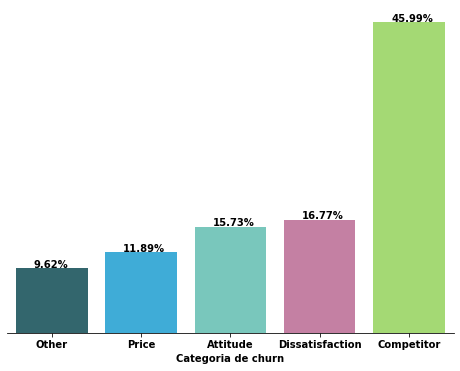

In [ ]:
plot_churn_cat_rev_percent(df[df.customer_status=='Churned'],[cat_palette[3],cat_palette[4],cat_palette[0],cat_palette[2],cat_palette[1]])

In [ ]:
#@markdown Se puede ver que la competencia es la razon principal cuasando 46% de las perdidas monetarias, seguida por la actitud del soporte y dissatisfaccion del servicio sumando alrededor de 32% entre ellas. Veamos cuales son las razones dentro de estos 3 grupos que mas impacto tienen.
pd.DataFrame(df[df.customer_status=='Churned'].groupby('churn_category').total_revenue.sum()).reset_index().style.background_gradient(cmap="Reds")

## ¿Cuales son las razones de cada categoria de churn que nos hacen perder mas dinero?

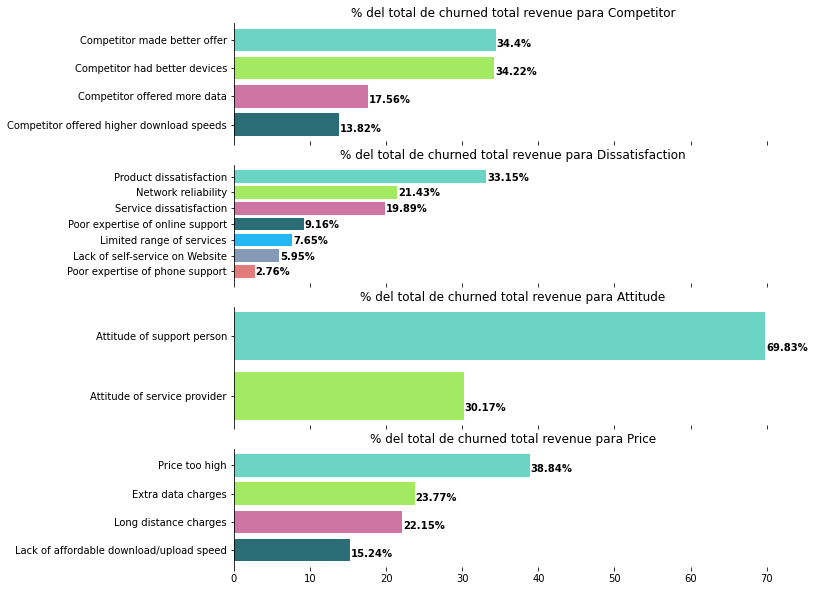

In [ ]:
#@markdown
categorias=['Competitor','Dissatisfaction','Attitude','Price']

fig, ax = plt.subplots(len(categorias),1,figsize=(10,10),sharex=True)
ax=ax.flatten()

for j,razon in enumerate(categorias):
    cond = df.churn_category==razon
    #valor $
    valor_dolar_por_razon = df[cond].groupby('churn_reason')['total_revenue'].sum()
    # % 
    valor_porcentaje_por_razon= df[cond].groupby('churn_reason')['total_revenue'].sum() / df[cond]['total_revenue'].sum() * 100

    ax[j].barh(valor_porcentaje_por_razon.sort_values(ascending=False).index,
            valor_porcentaje_por_razon.sort_values(ascending=False),
            color=cat_palette,
            )
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['bottom'].set_visible(False)

    ax[j].set_title(f'% del total de churned total revenue para {razon}')
    ax[j].invert_yaxis()

  #labels de los % en las barras
    for i, v in enumerate(round(valor_porcentaje_por_razon.sort_values(ascending=False),2).values):
        ax[j].text(v+.1, i + .25, str(v)+'%', fontweight='bold')

In [ ]:
#@markdown 
categorias=['Competitor','Dissatisfaction','Attitude','Price']
temp_dict={'churn_reason':[],'total_revenue':[]}

for cat in categorias:
    cond = df.churn_category==cat
    valor_dolar_por_razon = df[cond].groupby('churn_reason')['total_revenue'].sum()
    temp_dict['churn_reason'] += list(valor_dolar_por_razon.keys())
    temp_dict['total_revenue'] += list(valor_dolar_por_razon.values)
pd.DataFrame(temp_dict).round(2).style.background_gradient(cmap="Reds").format('{}')

Veamos categoria por categora:
* Competencia:
  Las 2 razones que predominan, practicamente empatadas son:
  - Ofrecen mejores dispositivos.
  - Tienen mejores ofertas.
* Dissatisfacción:
  Las 3 razones que predominan que equivalen al ~63% de las perdidas de esta categoria son:
  - Dissatisfaccion con el producto
  - Estabilidad de la red
  - Dissatisfaccion con el servicio
* Actitud:
  - El 70% de las perdidas de esta categoria provienen de la actitud de personas de soporte.
  - El 30% proviene de la actitud del proovedor del servicio
* Precio:
  - Predomina con 39% que el precio de las ofertas es muy alto.
  - Los cargos por larga distancia y por datos extras son las segundas razones con 24% y 22% respectivamente.

## Comparacion churned vs stayed

In [ ]:
#saco las columnas que no quiero analizar en esta parte de las numericas y categoricas
num_cols = numericas.loc[:, numericas.columns.isin(['zip_code','latitude','longitude']) != True].columns

cat_cols = categoricas.loc[:, categoricas.columns.isin(['customer_id','county','city','churn_category','churn_reason']) != True].columns

### Numericas

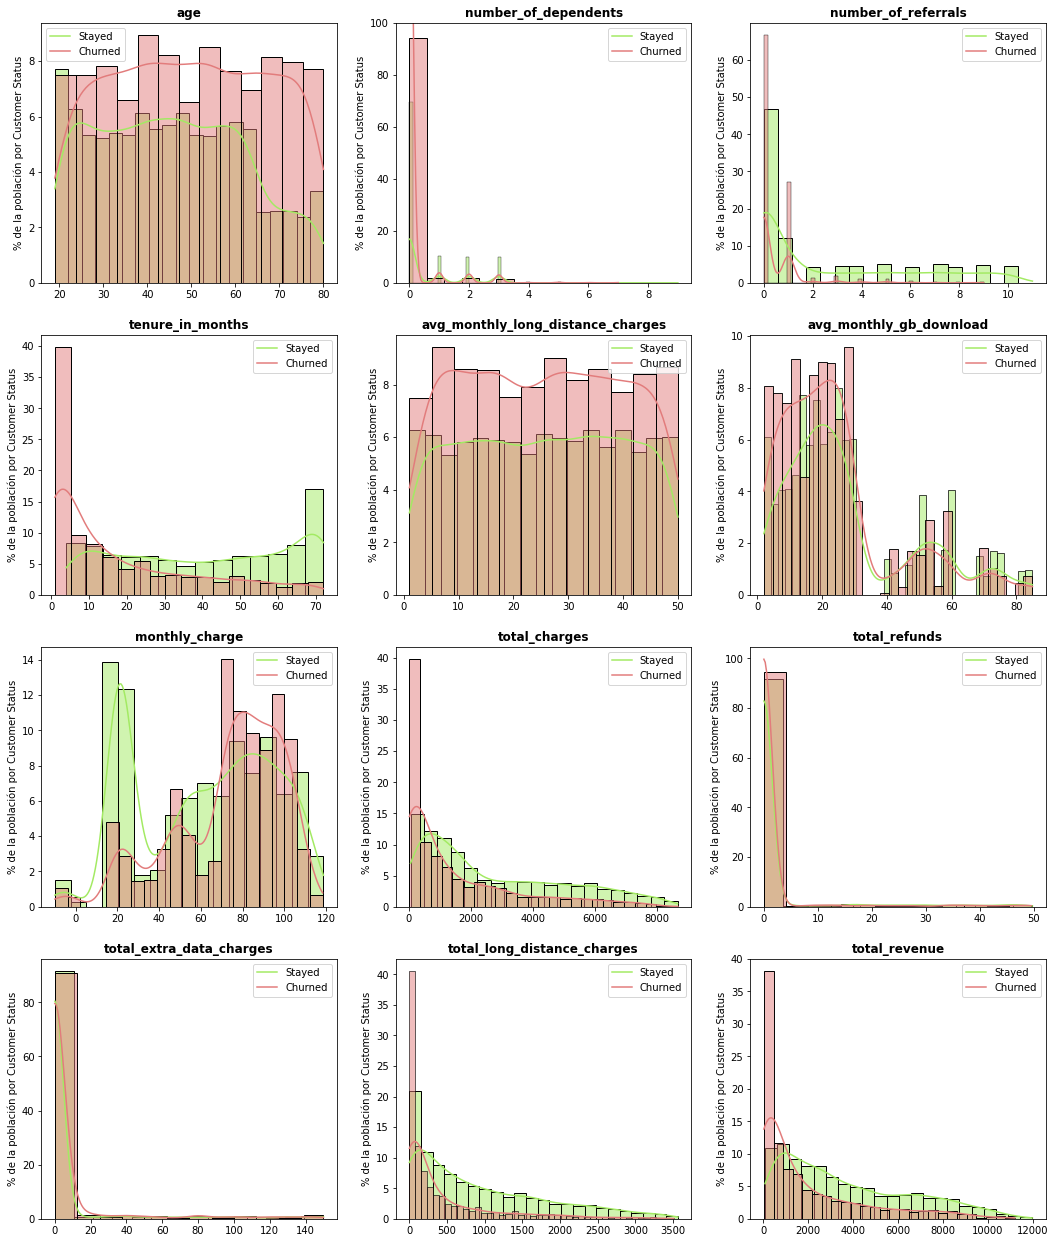

In [ ]:
#@title ¿Hay alguna tendencia en las columnas numericas?¿Diferencias entre los churned y stayed?
ROWS, COLS = 4, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 22))
row, col = 0, 0


for i, num_col in enumerate(num_cols):
  if col == COLS - 1:
      row += 1
  col = i % COLS

  g= sns.histplot(data=df[df.customer_status.isin(['Churned','Joined']) == False],
                  x=num_col,
                  hue='customer_status',
                  stat='percent',
                  ax=ax[row, col],
                  kde=True,
                  kde_kws={'cut':0},
                  palette=sns.color_palette([cat_palette[1]]))
  if row == 0 and col == 1:
    g.set_ylim(0,100)
  g.set_ylabel('')
  g= sns.histplot(data=df[df.customer_status == 'Churned'],
                  x=num_col,
                  hue='customer_status',
                  stat='percent',
                  ax=ax[row, col],
                  kde=True,
                  kde_kws={'cut':0},
                  palette=sns.color_palette([cat_palette[-1]]))
  if row == 0 and col == 1:
    g.set_ylim(0,100)

  g.set_xlabel('')
  g.set_ylabel('% de la población por Customer Status')

  title=textwrap.fill(num_col, width=40,
                      break_long_words=False)
  g.set_title(title,fontdict={
 'fontweight': 'bold',
})
  ax[row, col].legend(labels=['Stayed', 'Churned'])  

plt.show()

Si las hay.

**Patrones y tendencias de los churned:**
* Las personas mayores a 60 años tienden a dejar el servicio que a quedarse.(en un ratio churn-stayed aprox de 2:1)
* Los grupos entre 40 a 60 años son los de mayor volumen y por eso tambien son los que mas cantidad de churned tienen (aprox hay 1 churned por cada stayed)

* Mientras menos personas dependan del cliente mas chances tiene de dejar el servicio.
* Lo mismo ocurre con los referals, mientras menos referals tengan mas chances hay de que dejen el servicio.
* Mientras mas tiempo lleven en el servicio menos chances tienen de dejarlo.
* A la mayor parte de los churned pagaban una tarifa mensual entre 70-110 dolares.

**Otros factores a tener en cuenta**
* Los picos que se ven de 0 en el promedio mensual de GB y cargos mensuales por llamadas a distancia se deben a como decidi rellenar los nulos que si bien tiene sentido ya que no usan esos servicios, lo aclaro porque puede distraer.
* La mayoria de las personas entre 20-25 se quedan en el servicio (se comporta de forma inversa a los mayores de 60)

####¿Puede ser que el precio que cobramos los haga mas propensos a caer en manos de la competencia? o de esperar un mejor servicio del que ofrecemos?

In [ ]:
fig = px.box(df[(df.monthly_charge >0)&(df.customer_status =='Churned')],y='monthly_charge', x='churn_category',color="churn_category",
             color_discrete_sequence=cat_palette)
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [ ]:
df[(df.monthly_charge >0)&(df.customer_status =='Churned')].groupby('churn_category').monthly_charge.describe()

count       mean        std    min     25%    50%      75%  \
churn_category                                                                
Attitude         307.0  71.451466  27.640071  18.95  50.825  79.00  93.8500   
Competitor       831.0  76.778400  22.682083  19.00  69.200  80.60  94.4500   
Dissatisfaction  312.0  74.561058  23.601026  18.85  55.275  79.35  94.0000   
Other            180.0  75.701944  22.110146  19.75  60.050  78.80  93.6125   
Price            209.0  69.874641  29.361397  19.30  48.950  78.45  94.4000   

                    max  
churn_category           
Attitude         113.20  
Competitor       118.35  
Dissatisfaction  115.65  
Other            116.20  
Price            114.20

En general los cargos mensuales parecen no affectar tanto a la categoria.Hay que destacar que hay algunos de la competencia tiene mas valores con ofertas mas caras y hacen que aparescan de outliers a los que se le cobraba la barata

### Categoricas

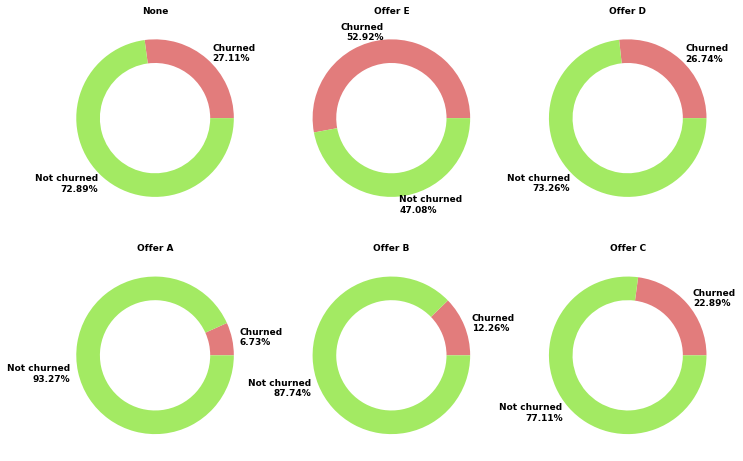

In [ ]:
#@title ¿Hay alguna Oferta que tenga mas churned que las otras?
fig , ax = plt.subplots(2,3,figsize=(12,8))
ax = ax.flatten()
for i,offer in enumerate(df.offer.unique()):
    temp_df = df[df.offer==offer][['offer','customer_status']]
    temp_df = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)
    cat_comp_wheel_chart(temp_df.value_counts(normalize=True).sort_index(),
                         ax[i],
                         title=offer,
                         colors=[cat_palette[-1],
                                 cat_palette[1]],fontdict={ 'color': 'black','weight': 'bold','size': 9 })

* Podemos observar que la oferta mas problematica es la **Oferta E** teniendo mas del 50% de usuarios Churned, habria que mejorarla.

* Luego las otras ofertas que impactan negativamente son la 
 **Oferta D y C** donde aproximadamente 1 de cada 4 usuarios es Churned.
* Tambien se puede ver que el 27% de los usuarios que no poseen oferta dejan el servicio, habria que meterlos en una oferta para disminuir las chances de que dejen.

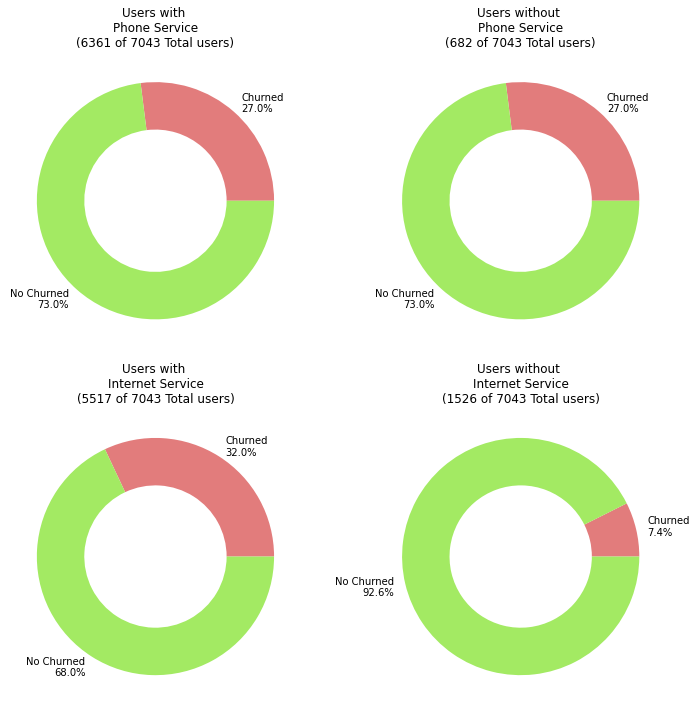

In [ ]:
#@title ¿Hay algun servicio que impacte en los churned?

fig , ax = plt.subplots(2,2,figsize=(12,12))
ax = ax.flatten()
cmap = sns.color_palette([cat_palette[-1],cat_palette[1]])
font_s = 8

#Phone Y
temp_df = df[['customer_status','phone_service']].copy()
cond= temp_df['phone_service'] == 'Yes'
temp_df.loc[: ,'customer_status'] = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)

size_of_groups = temp_df[cond].value_counts(normalize=True).sort_index().round(2).values * 100
size_of_groups = size_of_groups.round(2)
labels = [i + f'\n{g}%'for i,g in zip(['Churned', 'No Churned'],size_of_groups)]

ax[0].pie(size_of_groups,labels=labels, radius=1,colors = cmap,
        wedgeprops=dict(width=0.4))

temp = len(df[df.phone_service =='Yes'])
ax[0].set_title(f'Users with \nPhone Service\n({temp} of {len(df)} Total users)')

#Phone N
temp_df = df[['customer_status','phone_service']].copy()
cond= temp_df['phone_service'] == 'Yes'
temp_df.loc[: ,'customer_status'] = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)

size_of_groups = temp_df[cond].value_counts(normalize=True).sort_index().round(2).values * 100
size_of_groups = size_of_groups.round(2)
labels = [i + f'\n{g}%'for i,g in zip(['Churned', 'No Churned'],size_of_groups)]

ax[1].pie(size_of_groups,labels=labels, radius=1,colors = cmap,
        wedgeprops=dict(width=0.4))
temp = len(df[df.phone_service =='No'])
ax[1].set_title(f'Users without \nPhone Service\n({temp} of {len(df)} Total users)')

#inter Y
temp_df = df[['customer_status','internet_service']].copy()
cond= temp_df['internet_service'] == 'Yes'
temp_df.loc[: ,'customer_status'] = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)

size_of_groups = temp_df[cond].value_counts(normalize=True).sort_index().round(2).values * 100
size_of_groups = size_of_groups.round(2)
labels = [i + f'\n{g}%'for i,g in zip(['Churned', 'No Churned'],size_of_groups)]

ax[2].pie(size_of_groups,labels=labels, radius=1,colors = cmap,
        wedgeprops=dict(width=0.4))

temp = len(df[df.internet_service =='Yes'])
ax[2].set_title(f'Users with \nInternet Service\n({temp} of {len(df)} Total users)')

#inter N
temp_df = df[['customer_status','internet_service']].copy()
cond= temp_df['internet_service'] == 'No'
temp_df.loc[: ,'customer_status'] = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)

size_of_groups = temp_df[cond].value_counts(normalize=True).sort_index().values * 100
size_of_groups = size_of_groups.round(2)
labels = [i + f'\n{g}%'for i,g in zip(['Churned', 'No Churned'],size_of_groups)]

ax[3].pie(size_of_groups,labels=labels, radius=1,colors = cmap,
        wedgeprops=dict(width=0.4))
temp = len(df[df.internet_service =='No'])
ax[3].set_title(f'Users without \nInternet Service\n({temp} of {len(df)} Total users)')
fig.show()

Los usuarios con servicio a internet tienden a dejar mas el servicio que los que no

In [ ]:
#@title ¿Hay algun servicio que ofrecemos cause mas churned?¿Hay alguno que tenga mejor retencion?
# preparo los %

temp_dict = {"variable": [], "%_churned":[], "%_stayed":[]}

temp_df = df[df.customer_status != 'Joined'][['customer_status','internet_type','online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 
                        'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data']]

for col in temp_df.columns:
    temp_df[col] =temp_df[col].apply(lambda x : f'{col} {x}' if x == 'Yes' or x == 'No' else x)

for col in ['internet_type','online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 
                        'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data']:
    churneds_ctn = round(temp_df[temp_df.customer_status == 'Churned'][col].value_counts() / temp_df[col].value_counts() * 100,2)
    for key, valor in zip(churneds_ctn.keys(),churneds_ctn.values):
        temp_dict['variable'].append(key)
        temp_dict['%_churned'].append(valor)
        temp_dict['%_stayed'].append(100 - valor)

temp_df = pd.DataFrame(temp_dict)

fig = px.bar(temp_df, y = 'variable',x=['%_churned','%_stayed'],  barmode = 'stack', text_auto=True, color_discrete_sequence=["#e27c7c","#a3ea63"])
fig.update_traces( textposition='inside')
fig.update_layout( width = 700, height = 700)

fig.show()

Por lo que se puede ver, los servicios de fibra optica , datos ilimitados y streaming de tv y peliculas tienen mayor cantidad de churned por usuario.
  * Parece que hay problemas con la fibra optica, pueden provenir por ser uno de los servicios de internet mas comunes ofrecidos causando que haya mas volumen, asi como tambien puede proveenir de las fallas e inestabilidad en la red.
  * Por los datos ilimitados no creo que sea un problema sino que , al igual que la fibra optica, son los mas comunes a ofrecer.
  * En el caso de los servicios de streaming de peliculas y tv, se puede deber al catálogo de las mismas y/o a inestabilidades en el servicio.Habria que conseguir datos de los mismos para entrar en detalle al por qué.

Por otro lado los usuarios que contratan DSL, Servicio premium de soporte y el servicio de seguridad online tienden a quedarse asi que esos deben funcionar como deben.

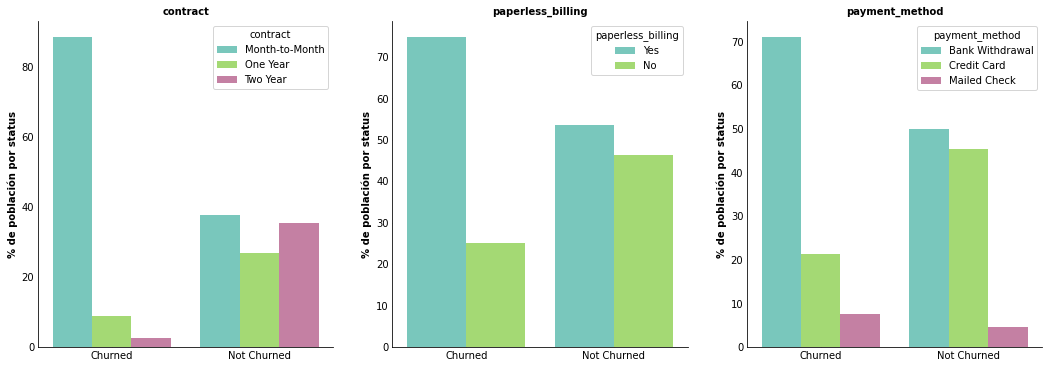

In [ ]:
#@title ¿Las formas de pago afectan al estatus del usuario?
cols = ['contract', 'paperless_billing', 'payment_method']     
fig , ax = plt.subplots(1,3,figsize=(18,6))
multi_barplot(df.copy(),
              cols,
              ax,
              cat_palette,
              fontdict={'color': 'black', 'weight': 'bold', 'size': 10})

Podemos observar que los usuarios que pagan de mes a mes, los que tienen tarifa digital y los que pagan por medio de banco tienden a dejar mas el servicio.

## ¿Estara relacionala la Edad , genero y estatus civil del cliente con dejar o no el servicio?

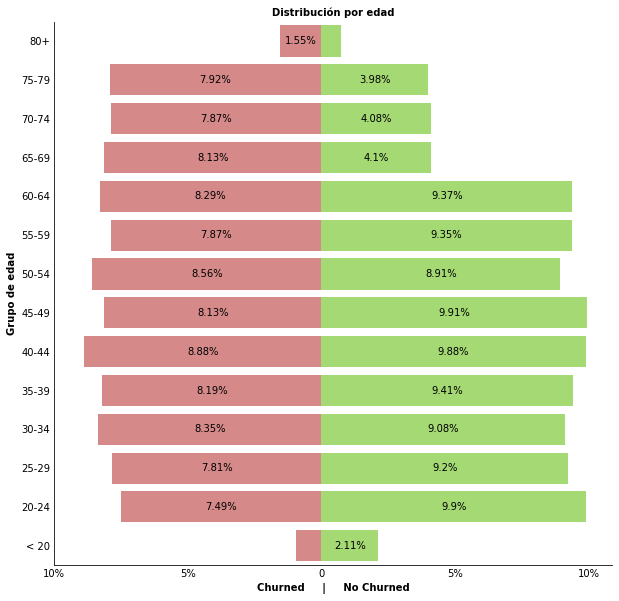

In [ ]:
#@title Edad
fig , ax = plt.subplots(figsize=(10,10))
plot_age_pop(df.copy(),ax,colors=[cat_palette[-1],cat_palette[1]])

* Las personas mayores tienden a dejar mas el servicio que las mas jóvenes.

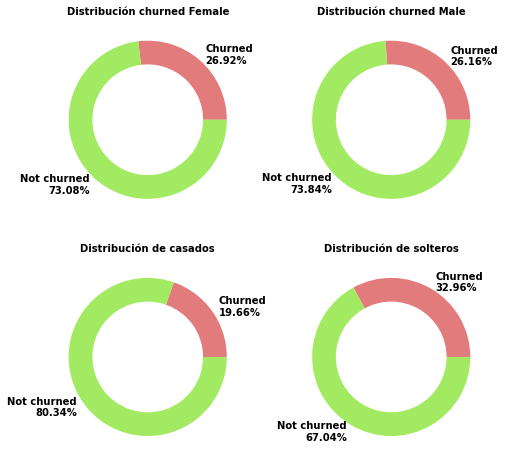

In [ ]:
#@title Genero y Status Civil
fig , ax = plt.subplots(2,2,figsize=(8,8))
ax = ax.flatten()
temp_df = df[df['gender']=='Female'][['customer_status','gender']]
temp_df = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)
cat_comp_wheel_chart(temp_df.value_counts(normalize=True).sort_index(),ax[0],title=f'Distribución churned Female',colors=[cat_palette[-1],cat_palette[1]],fontdict={ 'color': 'black','weight': 'bold','size': 10 })

temp_df = df[df['gender']=='Male'][['customer_status','gender']]
temp_df = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)
cat_comp_wheel_chart(temp_df.value_counts(normalize=True).sort_index(),ax[1],title=f'Distribución churned Male',colors=[cat_palette[-1],cat_palette[1]],fontdict={ 'color': 'black','weight': 'bold','size': 10 })

temp_df = df[df['married']=='Yes'][['customer_status','married']]
temp_df = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)
cat_comp_wheel_chart(temp_df.value_counts(normalize=True).sort_index(),ax[2],title=f'Distribución de casados',colors=[cat_palette[-1],cat_palette[1]],fontdict={ 'color': 'black','weight': 'bold','size': 10 })

temp_df = df[df['married']=='No'][['customer_status','married']]
temp_df = temp_df['customer_status'].apply(lambda x:'Not churned' if x != 'Churned' else x)
cat_comp_wheel_chart(temp_df.value_counts(normalize=True).sort_index(),ax[3],title=f'Distribución de solteros',colors=[cat_palette[-1],cat_palette[1]],fontdict={ 'color': 'black','weight': 'bold','size': 10 })


* No hay diferencia entre generos.
* Los solteros tienden a dejar el servicio mas que los casados.

# Procesamiento de datos

## Vuelvo a importar el dataset
* Para que quede en limpio por si modifique algo por accidente y sin la columna county ya que no la voy a necesitar en esta parte.
* Tambien voy a ignorar los usuarios joined ya que no los voy a usar.

In [ ]:
df = import_dataset()
df = df[df.customer_status != 'Joined']
df.head()

customer_id  gender  age married  number_of_dependents          city  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  tenure_in_months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     offer phone_service  avg_monthly_long_distance_charges multiple_lines  \
0     None           Yes                              42.39             No   
1     None           Yes                              10.69            Yes   
2  Offer E           Yes                              33.65             No   
3  Offer D           Yes                              27.82             No   
4     None           Yes                               7.38             No   

  internet_service internet_type  avg_monthly_gb_download online_security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
2              Yes   Fiber Optic                     30.0              No   
3              Yes   Fiber Optic                      4.0              No   
4              Yes   Fiber Optic                     11.0              No   

  online_backup device_protection_plan premium_tech_support streaming_tv  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   

  streaming_movies streaming_music unlimited_data        contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
2               No              No            Yes  Month-to-Month   
3              Yes              No            Yes  Month-to-Month   
4               No              No            Yes  Month-to-Month   

  paperless_billing   payment_method  monthly_charge  total_charges  \
0               Yes      Credit Card            65.6         593.30   
1                No      Credit Card            -4.0         542.40   
2               Yes  Bank Withdrawal            73.9         280.85   
3               Yes  Bank Withdrawal            98.0        1237.85   
4               Yes      Credit Card            83.9         267.40   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   total_revenue customer_status   churn_category  \
0         974.81          Stayed              NaN   
1         610.28          Stayed              NaN   
2         415.45         Churned       Competitor   
3        1599.51         Churned  Dissatisfaction   
4         289.54         Churned  Dissatisfaction   

                    churn_reason  
0                            NaN  
1                      

## Balanceando el Dataset

Como se vio en el EDA tenemos alrededor de un 70:30 de proporciones entre Stayed y Churned, lo cual puede hacer que el modelo tenga un bias a los stayed, lo mismo ocurrre para el segundo modelo que es aproximadamente 45:15:15:10:5 con las categorias de churn.

Para evitar eso voy a balancearlo por SMOTENC que es un algoritmo de oversampling que me permite agregarle a la clase minoritaria valoresde una forma mas similar a lo real.

Decidí no ir por undersampling para no perder registros.

### Limpieza de nulos
Antes de poder pasarlo por el SMONTENC tengo que asegurarme que no haya nulos.

In [ ]:
#convierto Zipcode de numerica a objeto ya que una feature que divide por zonas, similar a la columna County que hice en el EDA.
df.zip_code = df.zip_code.astype('object')

In [ ]:
#@markdown Por info del dataset en teoria las columnas con nulos se deben a que no tenian el servicio. Verifico
#@markdown > 
#@markdown No deberia haber nulos en las columnas 'Avg Monthly Long Distance Charges' y 'Multiple Lines' si tienen servicio telefonico como 'Yes'.
cond = (df.phone_service == 'Yes')
df[cond][['avg_monthly_long_distance_charges','multiple_lines']].isna().sum()

avg_monthly_long_distance_charges    0
multiple_lines                       0
dtype: int64

In [ ]:
#@markdown Misma situacion para los servicios de internet, si tienen servicio, las columnas relacionadas no deberian tener nulos.
cond = (df['internet_service']=='Yes')
df[cond][['internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data']].isna().sum()

internet_type              0
avg_monthly_gb_download    0
online_security            0
online_backup              0
device_protection_plan     0
premium_tech_support       0
streaming_tv               0
streaming_movies           0
streaming_music            0
unlimited_data             0
dtype: int64

### Lleno nulos para poder pasarlo por SMOTENC
Como se verifica que los nulos son intencionales y no por mala imputacion o error, relleno los nulos con lo que me parece correcto 
>
Numericas -> 0
>
Categoricas -> No
>(Como casi todas son binarias de Yes/No tiene sentido que si no tienen sea No.)
>
En el caso de Internet type decido llenarlo tambien con No ya que quedaria diferenciado de los otros tipos como un "No tiene".

In [20]:
def clean_nulls_dataset(df:pd.DataFrame,cols_to_drop:list,verbose=True)->tuple:
    '''Reemplaza Nulos numericos con 0 y Categoricos con No
    
    Retorna copia del imputado df limpio y lista de indices de las variables categoricas'''
    df = df.drop(cols_to_drop,axis=1).copy()
    categorical_cols = []
    categorical_idx = []
    num_cols = []

    for i,col in enumerate(df.columns):
        if df[col].dtypes.str=='|O':
            categorical_idx.append(i)
            categorical_cols.append(col)
        if verbose:
            print(f'CAT: {col}, {i}')
        else:
            num_cols.append(i)
    if verbose:
        null_status = df.isna().sum()
        
        print(f'------------------\nNulos Inicial:\n------------------\n{null_status}')

    for col in categorical_cols:
        df[col].fillna('No',inplace=True)
    for col in numerical_cols:
        df[col].fillna(0,inplace=True)
    if verbose:
        null_status = df.isna().sum()
        print(f'------------------\nNulos Final:\n------------------\n{null_status}')

    return df , categorical_idx

In [ ]:
def get_num_and_cat_cols(df):
  categorical_cols = []
  num_cols = []

  for i,col in enumerate(df.columns):
    if df[col].dtypes.str=='|O':
      categorical_cols.append(col)
    else:
      num_cols.append(col)
  return num_cols,categorical_cols

In [ ]:
numerical_cols,categorical_cols = get_num_and_cat_cols(df)

In [ ]:
#Modelo 1: Clasificación Simple --> target = Customer Status 
#Modelo 2: Clasificacion Multiple --> target = Churn Category 

#quito las columnas de metadatos/que no voy a usar para cada modelo
print('-------------------------Modelo 1----------------------')
model_1_df ,cat_idx_1 = clean_nulls_dataset(df,['customer_id','churn_category','churn_reason'])
print('-------------------------Modelo 2----------------------')
cond = df.customer_status=='Churned'
model_2_df ,cat_idx_2 = clean_nulls_dataset(df[cond],['customer_id','customer_status','churn_reason'])

-------------------------Modelo 1----------------------
CAT: gender, 0
CAT: age, 1
CAT: married, 2
CAT: number_of_dependents, 3
CAT: city, 4
CAT: zip_code, 5
CAT: latitude, 6
CAT: longitude, 7
CAT: number_of_referrals, 8
CAT: tenure_in_months, 9
CAT: offer, 10
CAT: phone_service, 11
CAT: avg_monthly_long_distance_charges, 12
CAT: multiple_lines, 13
CAT: internet_service, 14
CAT: internet_type, 15
CAT: avg_monthly_gb_download, 16
CAT: online_security, 17
CAT: online_backup, 18
CAT: device_protection_plan, 19
CAT: premium_tech_support, 20
CAT: streaming_tv, 21
CAT: streaming_movies, 22
CAT: streaming_music, 23
CAT: unlimited_data, 24
CAT: contract, 25
CAT: paperless_billing, 26
CAT: payment_method, 27
CAT: monthly_charge, 28
CAT: total_charges, 29
CAT: total_refunds, 30
CAT: total_extra_data_charges, 31
CAT: total_long_distance_charges, 32
CAT: total_revenue, 33
CAT: customer_status, 34
------------------
Nulos Inicial:
------------------
gender                                  0
age    

In [ ]:
#Separo en target para cada modelo
y_1 = model_1_df.pop('customer_status')
X_1 = model_1_df
print(f'Shape X_1: {X_1.shape}\nShape y:{y_1.shape}')

y_2 = model_2_df.pop('churn_category')
X_2 = model_2_df
print(f'Shape X_2: {X_2.shape}\nShape y_2:{y_2.shape}')

Shape X_1: (6589, 34)
Shape y:(6589,)
Shape X_2: (1869, 34)
Shape y_2:(1869,)


In [ ]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1,train_size=0.7,test_size=0.3,stratify=y_1,random_state=0)

#Hago un split 80-20 para el segundo modelo por la poca cantidad de data disponible
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2,train_size=0.8,test_size=0.2,stratify=y_2,random_state=0)

### Aplico SMOTENC

In [ ]:
smote_nc = SMOTENC(categorical_features=cat_idx_1[0:len(cat_idx_1)-1],sampling_strategy='minority', random_state=0)
X_1_resampled, y_1_resampled = smote_nc.fit_resample(X_1_train, y_1_train)
print(f'len model_1_df X,y original: {len(X_1_train)}, {len(y_1_train)}\nlen model_1_df X,y resampled: {len(X_1_resampled)}, {len(y_1_resampled)}')

smote_nc = SMOTENC(categorical_features=cat_idx_2[0:len(cat_idx_2)-1], random_state=0)
X_2_resampled, y_2_resampled = smote_nc.fit_resample(X_2_train, y_2_train)
print(f'len model_2_df X,y original: {len(X_2_train)}, {len(y_2_train)}\nlen model_2_df X,y resampled: {len(X_2_resampled)}, {len(y_2_resampled)}')

len model_1_df X,y original: 4612, 4612
len model_1_df X,y resampled: 6608, 6608
len model_2_df X,y original: 1495, 1495
len model_2_df X,y resampled: 3365, 3365


In [ ]:
#se reinicio el tipo de col para zip asi que lo cambio de vuelta
X_1_resampled.zip_code= X_1_resampled.zip_code.astype('object')
X_2_resampled.zip_code= X_2_resampled.zip_code.astype('object')

model_1_df = pd.concat([X_1_resampled,y_1_resampled],axis=1)
print(y_1_resampled.value_counts())
print('-'*30)
model_2_df = pd.concat([X_2_resampled,y_2_resampled],axis=1)
print(y_2_resampled.value_counts())

Stayed     3304
Churned    3304
Name: customer_status, dtype: int64
------------------------------
Dissatisfaction    673
Other              673
Competitor         673
Price              673
Attitude           673
Name: churn_category, dtype: int64


## Feature selection y Normalizacion de la data
Voy usar como metrica de mi modelo a optimizar recall y como metrica general el f1 ya que un falso negativo en churn es un cliente menos y para el problema que tiene la empresa esto es muy grave. 
Para feature selection voy a usar foward selection con SequentialFeatureSelector de sklearn.

Las variables categoricas nesecitan pasarse anumeros para pasar por algoritmo que uso para el feature selection y ya que estoy normalizo las variables numericas y divido el dataset en train y test usando pipeline.

In [ ]:
num_cols,cat_cols = get_num_and_cat_cols(X_1_resampled)
print(f'Num cols: {num_cols}\nCat cols: {cat_cols}')

Num cols: ['age', 'number_of_dependents', 'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']
Cat cols: ['gender', 'married', 'city', 'zip_code', 'offer', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method']


### Feature selection Zip Code y ciudad
La columna zip code que fue omitida en el eda aporta información espacial de los usuarios , lo mismo para ciudad. Como son muchos unicos voy a ver cuantas columnas me agregarian en cada dataset con el fin de reducir el coste computacional.

In [ ]:
cantidad_zip_1 = len(X_1_resampled['zip_code'].unique())
cantidad_zip_2 = len(X_2_resampled['zip_code'].unique())
cantidad_ciudad_1 =len(X_1_resampled['city'].unique())
cantidad_ciudad_2 =len(X_2_resampled['city'].unique())

print(f'Cantidad de columnas que me agregaria el One Hot del Zip Code\nModelo 1: {cantidad_zip_1}\nModelo 2: {cantidad_zip_2}\n--------------------------------------\nCantidad de columnas que me agregaria el One Hot de City\nModelo 1: {cantidad_ciudad_1}\nModelo 2: {cantidad_ciudad_2}\n--------------------------------------\nTotal Modelo 1: {cantidad_ciudad_1 + cantidad_zip_1}\nTotal Modelo 2: {cantidad_ciudad_2 + cantidad_zip_2}')

Cantidad de columnas que me agregaria el One Hot del Zip Code
Modelo 1: 1604
Modelo 2: 963
--------------------------------------
Cantidad de columnas que me agregaria el One Hot de City
Modelo 1: 1093
Modelo 2: 674
--------------------------------------
Total Modelo 1: 2697
Total Modelo 2: 1637


Como me agregan demaciadas columnas y tengo la latitud y longitud que aporta una informacion similar voy a optar por quitarlas manualmente si esto afecta drasticamente a la performance considerare agregarlas como ultimo recurso.

In [ ]:
model_1_df = model_1_df.drop(['zip_code','city'],axis=1)
model_2_df = model_2_df.drop(['zip_code','city'],axis=1)

In [ ]:
y_1 = model_1_df.pop('customer_status')
X_1 = model_1_df
print(f'Shape X_1: {X_1.shape}\nShape y:{y_1.shape}')

y_2 = model_2_df.pop('churn_category')
X_2 = model_2_df
print(f'Shape X_2: {X_2.shape}\nShape y_2:{y_2.shape}')

Shape X_1: (6608, 32)
Shape y:(6608,)
Shape X_2: (3365, 32)
Shape y_2:(3365,)


In [ ]:
"""'offer', 'contract', 'payment_method','gender', 'Married','Phone Service', 'Multiple Lines', 'Internet Service','Online Security', 'Online Backup','Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing'""".lower().replace(", ",",").replace(" ,",",").replace(" ","_")

"'offer','contract','payment_method','gender','married','phone_service','multiple_lines','internet_service','online_security','online_backup','device_protection_plan','premium_tech_support','streaming_tv','streaming_movies','streaming_music','unlimited_data','paperless_billing'"

# Modelos y sus objetivos

Voy a hacer 4 modelos y usan pipelines ligeramente diferentes debido a la naturaleza de los datos que se usan para cada 1.

* Los modelos 1 y 2 son de clasificación y usan los mismos datos.
    - El modelo 1 es clasificación binaria, se encarga de determinar si un cliente churnea o no.
    - El modelo 2 es de clasificación múltiple, se encarga de predecir la categoria de churn. 
* El modelo 3 es de regression, su objetivo es predecir el total revenue del cliente durante el cuatrimestre con el fin de separar a los clientes normales de las ballenas(usuarios que gastan mucho mas dinero que el promedio) y asi establecer una prioridad a la hora de salvar un churn asi como tambien proyectar las ganancias del cuatrimestre.
* El modelo 4 es de clustering, su objetivo es segmentar a los clientes en grupos con el fin de que la empresa de un servicio mas personalizado a los clientes y aumente el tenure.

# Modelos 1 y 2

## Pipeline


In [ ]:
one_hot_cols = ['offer','contract','payment_method','gender','married','phone_service',
                'multiple_lines','internet_service','online_security','online_backup',
                'device_protection_plan','premium_tech_support','streaming_tv','streaming_movies',
                'streaming_music','unlimited_data','paperless_billing']
#la unica ordinal es internet type ya que esta ordenada por velocidad
ordinal_cols = ['internet_type']
#numericas
scaler_cols = ['age', 'number_of_dependents','avg_monthly_long_distance_charges',
               'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
               'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue',
               'number_of_referrals', 'tenure_in_months', 'total_refunds','latitude', 'longitude']

In [ ]:
one_hot = OneHotEncoder()
ordinal = OrdinalEncoder(categories=[['No','Cable','DSL','Fiber Optic']])
rob_scaler = RobustScaler()

preprocessor = ColumnTransformer(
      transformers=[
            ("one_hot", one_hot, one_hot_cols),
            ("ordinal", ordinal, ordinal_cols),
            ("std_scaler", rob_scaler, scaler_cols), 
        ],
      remainder ='drop',
      sparse_threshold=0
  )

steps = [
    ("preprocessing",preprocessor),
]

pipe_1_2 = Pipeline(steps)
pipe_1_2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['offer', 'contract',
                                                   'payment_method', 'gender',
                                                   'married', 'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection_plan',
                                                   'premium_tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                   

In [ ]:
X_1_train = pipe_1_2.fit_transform(X_1,y_1)
y_1_fitter = LabelEncoder().fit(y_1)
y_1_train = y_1_fitter.transform(y_1)

In [ ]:
X_2_prepared = pipe_1_2.fit_transform(X_2,y_2)
y_2_fitter = LabelEncoder().fit(y_2)
y_2_prepared = y_2_fitter.transform(y_2)

## Entrenando Modelos



In [16]:
def cross_validate_model(model,X,y,scoring,cv=10,verbose=True):
    cv = cross_validate(
        model,
        X,
        y,
        scoring=scoring,
        return_estimator=True,
        cv=cv,
        n_jobs=-1)
    
    estimator = cv['estimator'][0]
    fit_time = cv['fit_time'].mean()
    score_time= round(cv['score_time'].mean(),2)
    if verbose:
        print(f'estimator: {estimator}\n----------')
        print(f'fit_time_mean: {round(fit_time,2)}\n----------')
        print(f'pred_time_mean: {round(score_time,2)}\n----------')
    scores = []
    for score in scoring:
        key = f'test_{score}'
        if verbose:
            print(f'{score} mean: {round(cv[key].mean(),2)}\n----------')

    return cv

def evaluar_modelo(model,X_test,y_test,X_train,y_train,target_names,y_fitter,average='binary',xticks_rotation='horizontal',n_clases=None):
  '''
  imprime la evaluacion del modelo y dibuja una confusion matrix 
  
  retorna diccionario con recall precision y f1 del test'''
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  print(f'{model}\n')

  #stats
  recall_train = recall_score(y_train,y_train_pred,average=average)
  precision_train = precision_score(y_train,y_train_pred,average=average)
  f1_train = f1_score(y_train,y_train_pred,average=average)
  classification_report_train = classification_report(y_train,y_train_pred,target_names=target_names)
  print(f'-------TRAIN-------\nrecall_score: {round(recall_train,4)}\nprecision: {round(precision_train,4)}\nf1: {round(f1_train,4)}\nreport: \n{classification_report_train}')

  #stats
  encoded_y_test =y_fitter.transform(y_test)
  recall_test = recall_score(encoded_y_test,y_test_pred,average=average)
  precision_test = precision_score(encoded_y_test,y_test_pred,average=average)
  f1_test = f1_score(encoded_y_test,y_test_pred,average=average)
  classification_report_test = classification_report(encoded_y_test,y_test_pred,target_names=target_names)

  if n_clases == 2:
    #AUC  
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(encoded_y_test, probs)
    auc = roc_auc_score(encoded_y_test, probs)
    print(f'-------TEST-------\nrecall_score: {round(recall_test,4)}\nprecision: {round(precision_test,4)}\nf1: {round(f1_test,4)}\nAUC SCORE: {round(auc,4)}\nreport: \n{classification_report_test}\n')
    
    #-------graficos-------
    fig,ax = plt.subplots(ncols=2,figsize=(16,8))
    #confusion matrix
    plot_confusion_matrix(model, X_test, encoded_y_test, display_labels=target_names,xticks_rotation=xticks_rotation,ax=ax[0])

    #roc auc
    ax[1].set_title('ROC Curve')
    ax[1].plot([0, 1], [0, 1], linestyle='--')
    ax[1].plot(fpr, tpr, 'r', marker='.',label = '%.3f' % auc)
    ax[1].legend(loc = 'lower right')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlabel('False Positive Rate')
    plt.show()
    return {'recall':recall_test, 'precision':precision_test, 'f1':f1_test,'auc':auc, 'report':classification_report_test,  'graphs' :fig}

  else:
    print(f'-------TEST-------\nrecall_score: {round(recall_test,4)}\nprecision: {round(precision_test,4)}\nf1: {round(f1_test,4)}\nreport: \n{classification_report_test}\n')
    fig,ax = plt.subplots(figsize=(8,8))
    plot_confusion_matrix(model, X_test, encoded_y_test, display_labels=target_names,xticks_rotation=xticks_rotation,ax=ax)

  plt.show()
  return {'recall':recall_test, 'precision':precision_test, 'f1':f1_test, 'report':classification_report_test,'graphs' :fig}

### Modelo 1 Clasificación simple (Churned/Stayed)

In [ ]:
y_1_fitter.inverse_transform([0,1])

array(['Churned', 'Stayed'], dtype=object)

TreeClasifier
DecisionTreeClassifier(random_state=0)

-------TRAIN-------
recall_score: 1.0
precision: 1.0
f1: 1.0
report: 
              precision    recall  f1-score   support

     Churned       1.00      1.00      1.00      3304
      Stayed       1.00      1.00      1.00      3304

    accuracy                           1.00      6608
   macro avg       1.00      1.00      1.00      6608
weighted avg       1.00      1.00      1.00      6608

-------TEST-------
recall_score: 0.8139
precision: 0.8198
f1: 0.8162
AUC SCORE: 0.785
report: 
              precision    recall  f1-score   support

     Churned       0.66      0.72      0.69       561
      Stayed       0.88      0.85      0.87      1416

    accuracy                           0.81      1977
   macro avg       0.77      0.79      0.78      1977
weighted avg       0.82      0.81      0.82      1977




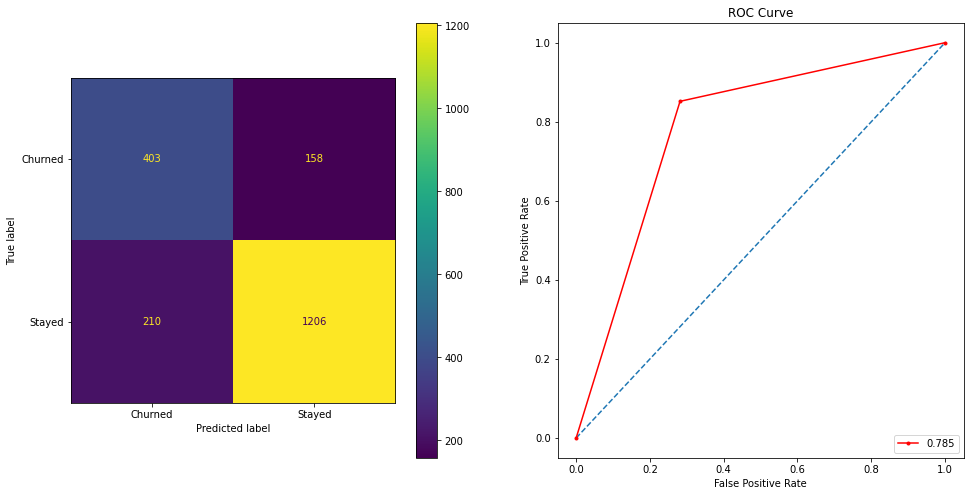

XGBoost
GradientBoostingClassifier(random_state=0)

-------TRAIN-------
recall_score: 0.9104
precision: 0.9105
f1: 0.9104
report: 
              precision    recall  f1-score   support

     Churned       0.91      0.92      0.91      3304
      Stayed       0.92      0.90      0.91      3304

    accuracy                           0.91      6608
   macro avg       0.91      0.91      0.91      6608
weighted avg       0.91      0.91      0.91      6608

-------TEST-------
recall_score: 0.8624
precision: 0.8679
f1: 0.8644
AUC SCORE: 0.9358
report: 
              precision    recall  f1-score   support

     Churned       0.73      0.81      0.77       561
      Stayed       0.92      0.88      0.90      1416

    accuracy                           0.86      1977
   macro avg       0.83      0.85      0.84      1977
weighted avg       0.87      0.86      0.86      1977




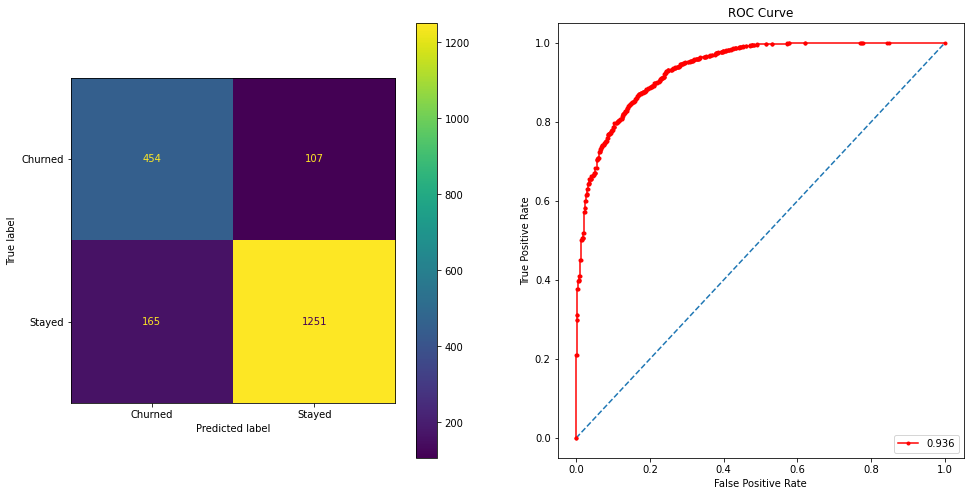

RandomForestClassifier
RandomForestClassifier(random_state=0)

-------TRAIN-------
recall_score: 0.9998
precision: 0.9998
f1: 0.9998
report: 
              precision    recall  f1-score   support

     Churned       1.00      1.00      1.00      3304
      Stayed       1.00      1.00      1.00      3304

    accuracy                           1.00      6608
   macro avg       1.00      1.00      1.00      6608
weighted avg       1.00      1.00      1.00      6608

-------TEST-------
recall_score: 0.8639
precision: 0.8653
f1: 0.8645
AUC SCORE: 0.9237
report: 
              precision    recall  f1-score   support

     Churned       0.75      0.78      0.76       561
      Stayed       0.91      0.90      0.90      1416

    accuracy                           0.86      1977
   macro avg       0.83      0.84      0.83      1977
weighted avg       0.87      0.86      0.86      1977




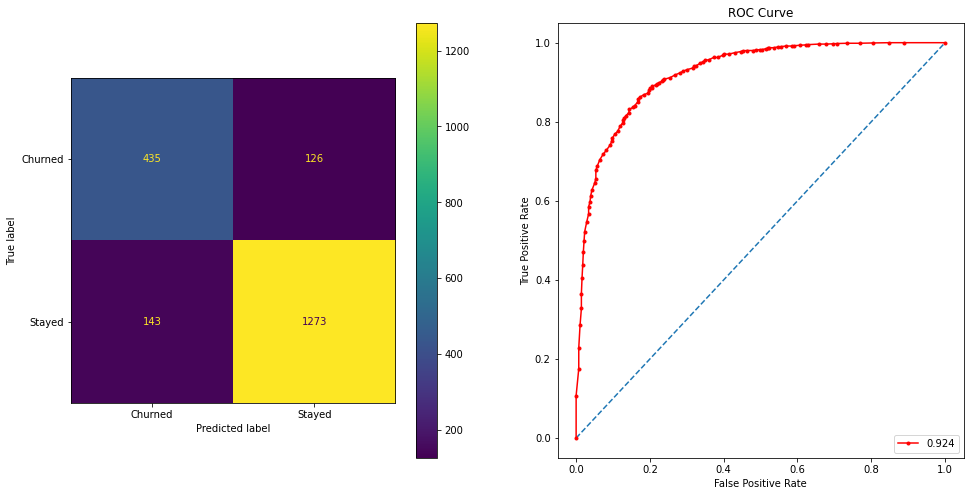

In [ ]:
#Pruebo modelos
models = {
    'TreeClasifier': DecisionTreeClassifier(random_state=0), #mi modelo base como el mas simple
    'XGBoost': GradientBoostingClassifier(random_state=0), 
    'RandomForestClassifier': RandomForestClassifier(random_state=0)
}

X_1_test_prepared = pipe_1_2.transform(X_1_test)

trained_models_1={}

for i in range(len(list(models))):
  model = list(models.values())[i]
  key =list(models.keys())[i]
  print(f'{bcolors.OKCYAN}=============\n{key}\n============={bcolors.ENDC}')
  model.fit(X_1_train,y_1_train)

  metrics = evaluar_modelo(
    model,
    X_1_test_prepared,
    y_1_test,
    X_1_train,
    y_1_train,
    ['Churned', 'Stayed'],
    y_1_fitter,
    average='weighted',
    n_clases=2
    )
  
  trained_models_1[key]= {'model':model,'metrics':metrics}

In [ ]:
print('Resultados de los modelos en Test')
for key in trained_models_1.keys():
  print(f'{bcolors.OKCYAN}=============\n{key}\n============={bcolors.ENDC}')
  print('AUC: '+str(round(trained_models_1[key]['metrics']['auc'],4)))
  print(trained_models_1[key]['metrics']['report'])

Resultados de los modelos en Test
TreeClasifier
AUC: 0.785
              precision    recall  f1-score   support

     Churned       0.66      0.72      0.69       561
      Stayed       0.88      0.85      0.87      1416

    accuracy                           0.81      1977
   macro avg       0.77      0.79      0.78      1977
weighted avg       0.82      0.81      0.82      1977

XGBoost
AUC: 0.9358
              precision    recall  f1-score   support

     Churned       0.73      0.81      0.77       561
      Stayed       0.92      0.88      0.90      1416

    accuracy                           0.86      1977
   macro avg       0.83      0.85      0.84      1977
weighted avg       0.87      0.86      0.86      1977

RandomForestClassifier
AUC: 0.9237
              precision    recall  f1-score   support

     Churned       0.75      0.78      0.76       561
      Stayed       0.91      0.90      0.90      1416

    accuracy                           0.86      1977
   macro avg  

Veamos resultados por validación cruzada de los modelos base

In [ ]:
models = {
    'TreeClasifier': DecisionTreeClassifier(random_state=0), #mi modelo base como el mas simple
    'XGBoost': GradientBoostingClassifier(random_state=0), 
    'RandomForestClassifier': RandomForestClassifier(random_state=0)
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'recall':[],
        'f1':[],
        'accuracy':[],
}

for model in models:
    results = cross_validate_model(models[model], X_1_train, y_1_train, ['recall_weighted','f1_weighted','accuracy'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['recall'].append(round(results['test_recall_weighted'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))

model_1_results = pd.DataFrame(result_dict)
model_1_results.sort_values('recall', ascending = False)

model  fit_time  score_time  recall      f1  accuracy
2  RandomForestClassifier    1.5744      0.0367  0.8941  0.8936    0.8941
1                 XGBoost    5.0135      0.0076  0.8918  0.8915    0.8918
0           TreeClasifier    0.1302      0.0038  0.8438  0.8433    0.8438

XGboost y RandomForest performaron mejor. El random forest overfiteo el train.Pueden mejorarse, pero no fueron tan malos lso resultados 0.89 f1 ,recall y accuracy en la cross validation.

### Modelo 2 Clasificación Multiple (Competition/Attitude/Price/Dissatisfaction/Other)

Para este modelo me importa mas el f1 y accuracy

In [ ]:
y_2_fitter.inverse_transform([0,1,2,3,4])

array(['Attitude', 'Competitor', 'Dissatisfaction', 'Other', 'Price'],
      dtype=object)

TreeClasifier
DecisionTreeClassifier(random_state=0)

-------TRAIN-------
recall_score: 1.0
precision: 1.0
f1: 1.0
report: 
                 precision    recall  f1-score   support

       Attitude       1.00      1.00      1.00       673
     Competitor       1.00      1.00      1.00       673
Dissatisfaction       1.00      1.00      1.00       673
          Other       1.00      1.00      1.00       673
          Price       1.00      1.00      1.00       673

       accuracy                           1.00      3365
      macro avg       1.00      1.00      1.00      3365
   weighted avg       1.00      1.00      1.00      3365

-------TEST-------
recall_score: 0.2727
precision: 0.3063
f1: 0.2873
report: 
                 precision    recall  f1-score   support

       Attitude       0.14      0.16      0.15        63
     Competitor       0.50      0.42      0.46       168
Dissatisfaction       0.23      0.22      0.22        64
          Other       0.04      0.05      0.04       

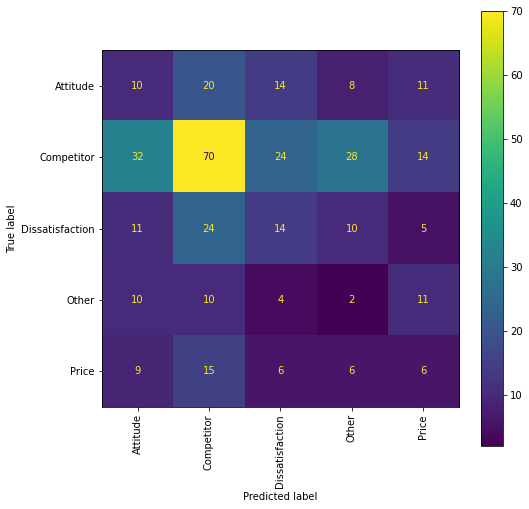

XGBoost
GradientBoostingClassifier(random_state=0)

-------TRAIN-------
recall_score: 0.7857
precision: 0.7867
f1: 0.7847
report: 
                 precision    recall  f1-score   support

       Attitude       0.80      0.77      0.78       673
     Competitor       0.77      0.71      0.74       673
Dissatisfaction       0.80      0.76      0.78       673
          Other       0.76      0.88      0.82       673
          Price       0.80      0.81      0.80       673

       accuracy                           0.79      3365
      macro avg       0.79      0.79      0.78      3365
   weighted avg       0.79      0.79      0.78      3365

-------TEST-------
recall_score: 0.3396
precision: 0.3517
f1: 0.3452
report: 
                 precision    recall  f1-score   support

       Attitude       0.19      0.21      0.20        63
     Competitor       0.58      0.55      0.56       168
Dissatisfaction       0.22      0.20      0.21        64
          Other       0.07      0.08      0.08

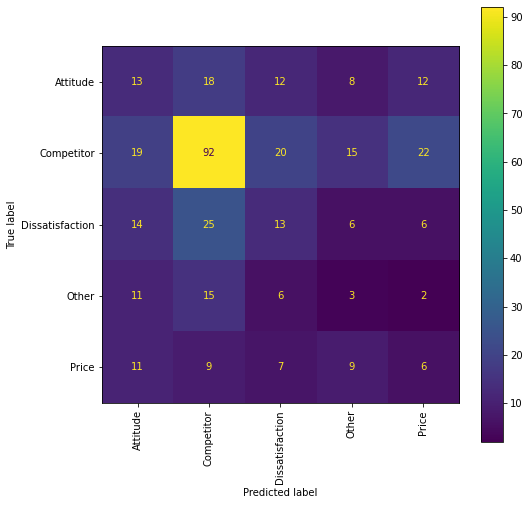

RandomForestClassifier
RandomForestClassifier(random_state=0)

-------TRAIN-------
recall_score: 1.0
precision: 1.0
f1: 1.0
report: 
                 precision    recall  f1-score   support

       Attitude       1.00      1.00      1.00       673
     Competitor       1.00      1.00      1.00       673
Dissatisfaction       1.00      1.00      1.00       673
          Other       1.00      1.00      1.00       673
          Price       1.00      1.00      1.00       673

       accuracy                           1.00      3365
      macro avg       1.00      1.00      1.00      3365
   weighted avg       1.00      1.00      1.00      3365

-------TEST-------
recall_score: 0.3422
precision: 0.329
f1: 0.3352
report: 
                 precision    recall  f1-score   support

       Attitude       0.23      0.24      0.23        63
     Competitor       0.52      0.55      0.54       168
Dissatisfaction       0.21      0.20      0.20        64
          Other       0.03      0.03      0.0

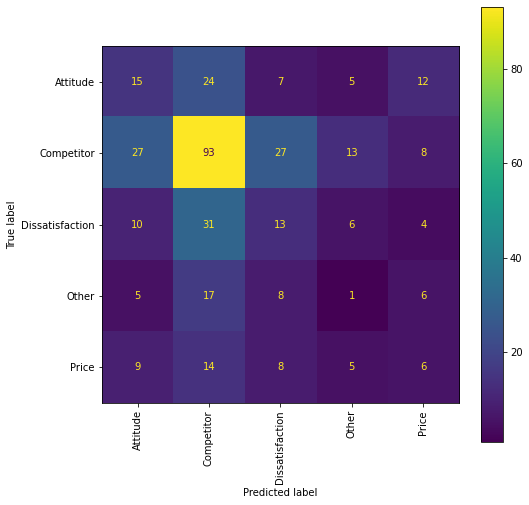

In [ ]:
#Pruebo modelos
models = {
    'TreeClasifier': DecisionTreeClassifier(random_state=0), #mi modelo base como el mas simple
    'XGBoost': GradientBoostingClassifier(random_state=0), 
    'RandomForestClassifier': RandomForestClassifier(random_state=0)
}

X_2_test_prepared = pipe_1_2.transform(X_2_test)

trained_models_2={}

for i in range(len(list(models))):
  model = list(models.values())[i]
  key =list(models.keys())[i]
  print(f'{bcolors.OKCYAN}=============\n{key}\n============={bcolors.ENDC}')
  model.fit(X_2_prepared,y_2_prepared)

  metrics = evaluar_modelo(
    model,
    X_2_test_prepared,
    y_2_test,
    X_2_prepared,
    y_2_prepared,
    ['Attitude', 'Competitor', 'Dissatisfaction', 'Other', 'Price'],
    y_2_fitter,
    average='weighted',
    xticks_rotation='vertical',
    )
  
  trained_models_2[key]= {'model':model,'metrics':metrics}

In [ ]:
print('Resultados de los modelos en Test')
for key in trained_models_2.keys():
  print(f'{bcolors.OKCYAN}=============\n{key}\n============={bcolors.ENDC}')
  print(trained_models_2[key]['metrics']['report'])

Resultados de los modelos en Test
TreeClasifier
                 precision    recall  f1-score   support

       Attitude       0.14      0.16      0.15        63
     Competitor       0.50      0.42      0.46       168
Dissatisfaction       0.23      0.22      0.22        64
          Other       0.04      0.05      0.04        37
          Price       0.13      0.14      0.13        42

       accuracy                           0.27       374
      macro avg       0.21      0.20      0.20       374
   weighted avg       0.31      0.27      0.29       374

XGBoost
                 precision    recall  f1-score   support

       Attitude       0.19      0.21      0.20        63
     Competitor       0.58      0.55      0.56       168
Dissatisfaction       0.22      0.20      0.21        64
          Other       0.07      0.08      0.08        37
          Price       0.12      0.14      0.13        42

       accuracy                           0.34       374
      macro avg       0.24 

In [ ]:
models = {
    'TreeClasifier': DecisionTreeClassifier(random_state=0), #mi modelo base como el mas simple
    'XGBoost': GradientBoostingClassifier(random_state=0), 
    'RandomForestClassifier': RandomForestClassifier(random_state=0)
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'f1':[],
        'accuracy':[],
}

for model in models:
    results = cross_validate_model(models[model], X_2_prepared, y_2_prepared, ['f1_weighted','accuracy'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))

model_2_results = pd.DataFrame(result_dict)
model_2_results.sort_values('accuracy', ascending = False)

model  fit_time  score_time      f1  accuracy
2  RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
1                 XGBoost   12.1911      0.0083  0.6089    0.6120
0           TreeClasifier    0.1250      0.0025  0.5354    0.5389

Estos modelos no performaron tan bien, El mejor fue el RandomForest con 0.73 de f1 y accuracy en la validacion cruzada

## Mejorando Modelos

### Modelo 2

Empecemos por el segundo modelo que es el que peor esta.



#### Tuneando solo los parámetros

Veamos si mejora tuneando solo los parametros.
Voy a usar Random Search y luego gridsearch con el RandomForest que fue el que mejor performo.

##### Random Search

In [ ]:
scoring = {'accuracy':'accuracy','f1':'f1_weighted'}

rfc_r_params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100, 150, 200, 300, 400]
}

random_cv_models = [
    ('RandomForestClassifier', RandomForestClassifier(random_state=0, n_jobs=-1), rfc_r_params)
]

results = []
for i in range(len(random_cv_models)):
  model = random_cv_models[i][1]
  model_name = random_cv_models[i][0]
  params = random_cv_models[i][2]
  print(f'{bcolors.OKCYAN}=============\n{model_name}\n============={bcolors.ENDC}')

  clf = RandomizedSearchCV(model,
                    params,
                    scoring=scoring,
                    refit='f1',
                    return_train_score=True,
                    random_state=0,
                    verbose=1,
                    n_iter = 100,
                    n_jobs=-1)
  
  clf.fit(X_2_prepared,y_2_prepared)
  results.append((model_name,clf))

RandomForestClassifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
clf.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

Comparo el modelo de random search con el inicial usando los resultados de la crossvalidation.

In [ ]:
models = {
    'RandomForestClassifier_RandomCV': RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300,
                       min_samples_leaf=1, min_samples_split=2, n_jobs=-1, max_features='auto', random_state=0)
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'f1':[],
        'accuracy':[],
}

for model in models:
    results = cross_validate_model(models[model], X_2_prepared, y_2_prepared, ['f1_weighted','accuracy'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))

model_2_results = pd.concat([model_2_results,pd.DataFrame(result_dict)])
model_2_results.sort_values('accuracy', ascending = False)

model  fit_time  score_time      f1  accuracy
0  RandomForestClassifier_RandomCV    4.9772      0.1776  0.7417    0.7458
2           RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
1                          XGBoost   12.1911      0.0083  0.6089    0.6120
0                    TreeClasifier    0.1250      0.0025  0.5354    0.5389

Mejoro un 1% es algo vamos a ver si podemos mejorarlo mas

##### Grid Search

In [ ]:
scoring = {'accuracy':'accuracy','f1':'f1_weighted'}

rfc_params = {
    'max_depth': [20,None,25,35,40],
    'min_samples_split': [2,3],
    'n_estimators': [250,300,350]
}

random_cv_models = [
    ('RandomForest', RandomForestClassifier(min_samples_leaf=1, max_features='auto', bootstrap=False,random_state=0,n_jobs=-1), rfc_params)
]

results = []
for i in range(len(random_cv_models)):
  model = random_cv_models[i][1]
  model_name = random_cv_models[i][0]
  params = random_cv_models[i][2]
  print(f'{bcolors.OKCYAN}=============\n{model_name}\n============={bcolors.ENDC}')

  clf = GridSearchCV(model,
                     params,
                     scoring=scoring,
                     refit='f1',
                     return_train_score=True,
                     verbose=1,
                     n_jobs=-1)
  
  clf.fit(X_2_prepared,y_2_prepared)
  results.append((model_name,clf))

RandomForest
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
clf.best_params_

{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 350}

In [ ]:
models = {
    'RandomForestClassifier_GridCV':  RandomForestClassifier(min_samples_leaf=1, max_features='auto',
                                                            max_depth=25, min_samples_split=2,n_estimators=350,
                                                            bootstrap=False,random_state=0,n_jobs=-1)
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'f1':[],
        'accuracy':[],
}

for model in models:
    results = cross_validate_model(models[model], X_2_prepared, y_2_prepared, ['f1_weighted','accuracy'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))

model_2_results = pd.concat([model_2_results,pd.DataFrame(result_dict)])
model_2_results.sort_values('accuracy', ascending = False)

model  fit_time  score_time      f1  accuracy
0  RandomForestClassifier_RandomCV    4.9772      0.1776  0.7417    0.7458
0    RandomForestClassifier_GridCV    6.2722      0.1894  0.7403    0.7437
2           RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
1                          XGBoost   12.1911      0.0083  0.6089    0.6120
0                    TreeClasifier    0.1250      0.0025  0.5354    0.5389

In [ ]:
#Mejor
# RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300,
#                        min_samples_leaf=1, min_samples_split=2, n_jobs=-1, max_features='auto', random_state=0)

performaron parecido

#### Pruebo con SVM

voy a ver si le saco alguna mejora al segundo modelo con una SVM

comparo directo con la cross validation

##### Pruebo las kernels iniciales sin parametros extras

descarto el kernel linear porque se que no va a performar bien para este caso de clasificación multiple

In [ ]:
models = {
    # 'SVC_linear': SVC(kernel='linear', random_state=0),   #lo comente pq tardaba mucho,no performaba bien y andaba probando cosas (como 240s)
    'SVC_poly': SVC(kernel='poly', random_state=0), 
    'SVC_rbf': SVC(kernel='rbf', random_state=0), 
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'accuracy':[],
        'f1':[],
}

for model in tqdm(models):
    results = cross_validate_model(models[model], X_2_prepared, y_2_prepared, ['accuracy','f1_weighted'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))

model_2_results = pd.concat([model_2_results,pd.DataFrame(result_dict)])
model_2_results.sort_values('accuracy', ascending = False)

  0%|          | 0/2 [00:00<?, ?it/s]

model  fit_time  score_time      f1  accuracy
0  RandomForestClassifier_RandomCV    4.9772      0.1776  0.7417    0.7458
0    RandomForestClassifier_GridCV    6.2722      0.1894  0.7403    0.7437
2           RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
1                          XGBoost   12.1911      0.0083  0.6089    0.6120
0                    TreeClasifier    0.1250      0.0025  0.5354    0.5389
1                          SVC_rbf    2.5866      0.2536  0.3020    0.3242
0                         SVC_poly    2.8228      0.0884  0.1373    0.2306

##### Tuneo parametros

In [ ]:
svc_rbf_params = {
    'kernel': ['rbf'], #como ya se que la de defecto (rbf) performo horrible la descarto.
    'C':[0.1, 0.5, 1, 1.5, 5, 10, 20, 30]
}

svc_poly_params = {
    'kernel': ['poly'], #como ya se que la de defecto (rbf) performo horrible la descarto.
    'C':[0.1, 0.5, 1, 1.5, 5, 10, 20, 30],
    'degree': [2,3,4,5,6]
}

grid_models = {
    'SVC_rbf': (SVC(random_state=0), svc_rbf_params),
    'SVC_poly': (SVC(random_state=0), svc_poly_params),
}

scoring ={'f1':'f1_weighted' ,'accuracy':'accuracy'}
grid_results = []

for model in grid_models:
    clf = GridSearchCV(grid_models[model][0],
                         grid_models[model][1],
                         scoring=scoring,
                         refit='accuracy',
                         return_train_score=True,
                         verbose=1,
                         n_jobs=-1)
    
    clf.fit(X_2_prepared,y_2_prepared)
    grid_results.append((model,clf))

for i,model in enumerate(grid_models):
    print(model)
    print(grid_results[i][1].best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
SVC_rbf
{'C': 30, 'kernel': 'rbf'}
SVC_poly
{'C': 30, 'degree': 2, 'kernel': 'poly'}


In [ ]:
models = {
    'SVC_rbf_grid': SVC(C=30, kernel='rbf' ,random_state=0),
    'SVC_poly_grid': SVC(C=30,degree=2, kernel='poly' ,random_state=0),
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'accuracy':[],
        'f1':[],
}

for model in tqdm(models):
    results = cross_validate_model(models[model], X_2_prepared, y_2_prepared, ['accuracy','f1_weighted'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))

model_2_results = pd.concat([model_2_results,pd.DataFrame(result_dict)])
model_2_results.sort_values('accuracy', ascending = False)

  0%|          | 0/2 [00:00<?, ?it/s]

model  fit_time  score_time      f1  accuracy
0  RandomForestClassifier_RandomCV    4.9772      0.1776  0.7417    0.7458
0    RandomForestClassifier_GridCV    6.2722      0.1894  0.7403    0.7437
2           RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
1                          XGBoost   12.1911      0.0083  0.6089    0.6120
0                    TreeClasifier    0.1250      0.0025  0.5354    0.5389
0                     SVC_rbf_grid    1.7336      0.1775  0.4279    0.4351
1                    SVC_poly_grid    3.0442      0.0928  0.3515    0.3760
1                          SVC_rbf    2.5866      0.2536  0.3020    0.3242
0                         SVC_poly    2.8228      0.0884  0.1373    0.2306

##### Conclución de esta prueba

No lograron sobrepasar al randomforest

#### PCA vs no PCA y combinaciones de metodos de reducción

Voy a comparar como performa un random forest y mi mejor modelo con la pipeline vieja sin y con PCA en las variables numericas

##### Veo cuantas features puedo reducir

In [ ]:
#reviso por si las dudas la data del X_2 balanceado
X_2_resampled.shape, y_2_resampled.shape

((3365, 34), (3365,))

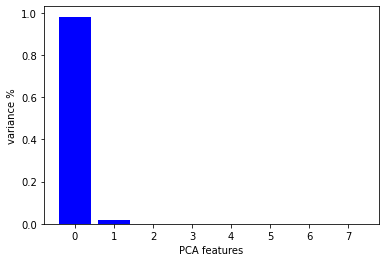

In [ ]:
num_cols = ['age', 'number_of_dependents','avg_monthly_long_distance_charges',
               'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
               'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue',
               'number_of_referrals', 'tenure_in_months', 'total_refunds','latitude', 'longitude']

df_num = X_2_resampled[num_cols].copy()

# principal components
pca = PCA(n_components=8, svd_solver='auto')
res_pca = pca.fit_transform(df_num)

# scree plot: variance drop-off after the fifth component; first 5 explain most of variance in data
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

df_pca = pd.DataFrame(res_pca)

Text(0, 0.5, 'Component 1')

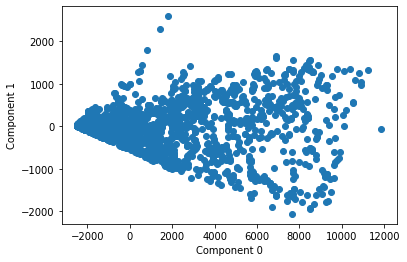

In [ ]:
plt.scatter(res_pca[:,0],res_pca[:,1])
plt.xlabel('Component 0')
plt.ylabel('Component 1')

Se puede explicar con 2

##### Creo la nueva pipeline

In [ ]:
#-----Tipos de columnas------
one_hot_cols = ['offer','contract','payment_method','gender','married','phone_service',
                'multiple_lines','internet_service','online_security','online_backup',
                'device_protection_plan','premium_tech_support','streaming_tv','streaming_movies',
                'streaming_music','unlimited_data','paperless_billing']
#la unica ordinal es internet type ya que esta ordenada por velocidad
ordinal_cols = ['internet_type']
#numericas
scaler_cols = ['age', 'number_of_dependents','avg_monthly_long_distance_charges',
               'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
               'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue',
               'number_of_referrals', 'tenure_in_months', 'total_refunds','latitude', 'longitude']

#-----Pipeline-------------
one_hot = OneHotEncoder()
ordinal = OrdinalEncoder(categories=[['No','Cable','DSL','Fiber Optic']])
rob_scaler = RobustScaler()
pca = PCA(n_components=2, svd_solver='auto')

preprocessor = ColumnTransformer(
      transformers=[
            ("one_hot", one_hot, one_hot_cols),
            ("ordinal", ordinal, ordinal_cols),
            ("std_scaler", rob_scaler, scaler_cols), 
            ("PCA", pca, scaler_cols)
        ],
      remainder ='drop',
      sparse_threshold=0
  )

steps = [
    ("preprocessing",preprocessor),
]

pipe_2_PCA = Pipeline(steps)
pipe_2_PCA

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['offer', 'contract',
                                                   'payment_method', 'gender',
                                                   'married', 'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection_plan',
                                                   'premium_tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                   

In [ ]:
X_PCA = pipe_2_PCA.fit_transform(X_2_resampled)
y_PCA = LabelEncoder().fit_transform(y_2_resampled)

##### Comparo los modelos con pca

In [ ]:
models = {
    'RandomForest_Best_PCA': RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300,
                       min_samples_leaf=1, min_samples_split=2, n_jobs=-1, max_features='auto', random_state=0), #mi mejor modelo hasta ahora
    'SVC_rbf_grid_PCA': SVC(C=30, kernel='rbf' ,random_state=0),
    'SVC_poly_grid_PCA': SVC(C=30,degree=2, kernel='poly' ,random_state=0),
    'RandomForest_PCA': RandomForestClassifier(random_state=0, n_jobs=-1)
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'accuracy':[],
        'f1':[],
}

for model in tqdm(models):
    results = cross_validate_model(models[model], X_PCA, y_PCA, ['accuracy','f1_weighted'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))

model_2_results = pd.concat([model_2_results,pd.DataFrame(result_dict)])
model_2_results.sort_values('accuracy', ascending = False)

  0%|          | 0/4 [00:00<?, ?it/s]

model  fit_time  score_time      f1  accuracy
0            RandomForest_Best_PCA    5.7955      0.1814  0.7510    0.7541
0  RandomForestClassifier_RandomCV    4.9772      0.1776  0.7417    0.7458
0    RandomForestClassifier_GridCV    6.2722      0.1894  0.7403    0.7437
3                 RandomForest_PCA    1.2504      0.0503  0.7389    0.7428
2           RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
1                          XGBoost   12.1911      0.0083  0.6089    0.6120
0                    TreeClasifier    0.1250      0.0025  0.5354    0.5389
0                     SVC_rbf_grid    1.7336      0.1775  0.4279    0.4351
1                    SVC_poly_grid    3.0442      0.0928  0.3515    0.3760
1                          SVC_rbf    2.5866      0.2536  0.3020    0.3242
1                 SVC_rbf_grid_PCA    2.1798      0.1921  0.2343    0.2476
0                         SVC_poly    2.8228      0.0884  0.1373    0.2306
2                SVC_poly_grid_PCA    2.8848      0.0915  0.1261    0.2175

##### Conclución
Hubo una mejora de 1% en el random forest, las svc, svm requieren tuning pero no parece que vale la pena

#### Sequential Feature Selector + PCA

El sfs suele tardar mucho en fitear pero para este caso puede que mejore los resultados.

In [ ]:
#encoders
one_hot = OneHotEncoder()
ordinal = OrdinalEncoder(categories=[['No','Cable','DSL','Fiber Optic']])
#scalers
rob_scaler = RobustScaler()
#Dim reduction
pca = PCA(n_components=2, svd_solver='auto')
sfs = SFS(RandomForestClassifier(n_jobs=-1),
          n_features_to_select=0.5,
          scoring = 'accuracy',
          n_jobs= -1,
          )

#PCA + Encodeado
preprocessor = ColumnTransformer(
      transformers=[
            ("one_hot", one_hot, one_hot_cols),
            ("ordinal", ordinal, ordinal_cols),
            ("std_scaler", rob_scaler, scaler_cols), 
            ("PCA", pca, scaler_cols),
        ],
      remainder ='drop',
      sparse_threshold=0
  )

#Pasos de la pipeline
steps = [
    ("preprocessing",preprocessor),
    ('SFS',sfs)
]

pipe_2_PCA_SFS = Pipeline(steps)
pipe_2_PCA_SFS

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['offer', 'contract',
                                                   'payment_method', 'gender',
                                                   'married', 'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection_plan',
                                                   'premium_tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                   

In [ ]:
y_PCA_SFS = LabelEncoder().fit_transform(y_2_resampled)
X_PCA_SFS = pipe_2_PCA_SFS.fit_transform(X_2_resampled,y_PCA_SFS)

In [ ]:
models = {
    'RandomForest_Best_PCA_SFS': RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300,
                       min_samples_leaf=1, min_samples_split=2, n_jobs=-1, max_features='auto', random_state=0), #mi mejor modelo hasta ahora
    'RandomForest_PCA_SFS': RandomForestClassifier(random_state=0, n_jobs=-1)
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'accuracy':[],
        'f1':[],
}

for model in tqdm(models):
    results = cross_validate_model(models[model], X_PCA_SFS, y_PCA_SFS, ['accuracy','f1_weighted'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))

model_2_results = pd.concat([model_2_results,pd.DataFrame(result_dict)])
model_2_results.sort_values('accuracy', ascending = False)

  0%|          | 0/2 [00:00<?, ?it/s]

model  fit_time  score_time      f1  accuracy
0        RandomForest_Best_PCA_SFS    5.5756      0.1630  0.7618    0.7671
0            RandomForest_Best_PCA    5.7955      0.1814  0.7510    0.7541
1             RandomForest_PCA_SFS    1.4560      0.0497  0.7421    0.7475
0  RandomForestClassifier_RandomCV    4.9772      0.1776  0.7417    0.7458
0    RandomForestClassifier_GridCV    6.2722      0.1894  0.7403    0.7437
3                 RandomForest_PCA    1.2504      0.0503  0.7389    0.7428
2           RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
1                          XGBoost   12.1911      0.0083  0.6089    0.6120
0                    TreeClasifier    0.1250      0.0025  0.5354    0.5389
0                     SVC_rbf_grid    1.7336      0.1775  0.4279    0.4351
1                    SVC_poly_grid    3.0442      0.0928  0.3515    0.3760
1                          SVC_rbf    2.5866      0.2536  0.3020    0.3242
1                 SVC_rbf_grid_PCA    2.1798      0.1921  0.2343    0.2476
0                         SVC_poly    2.8228      0.0884  0.1373    0.2306
2                SVC_poly_grid_PCA    2.8848      0.0915  0.1261    0.2175

##### Conclución
Mejoro un poco mas de 1%

#### Factor Analysis of Mixed Data (FAMD)
Es como el pca pero sirve tanto para numericas como categoricas

Veo si va a servir

In [ ]:
#Veo cuanto puedo reducir para q se explique el 95% de la df
famd = FAMD(n_components =31, n_iter = 3, random_state = 0)
X_FAMD = famd.fit_transform(X_2_resampled)

cumsum = np.cumsum(famd.explained_inertia_)
np.argmax(cumsum >= 0.95)

0

##### Conclucion

No tiene buena pinta apenas reduciria las features. No lo voy a seguir de esta forma

#### PCA + FAMD

In [ ]:
#Aplico PCA
pca = PCA(n_components=2, svd_solver='auto')

#fiteo las numericas y las vuelvo dataframe
X_num = pd.DataFrame(pca.fit_transform(X_2_resampled[scaler_cols]))

#Junto categoricas con numericas
X_PCA_FMAD = pd.concat([X_2_resampled[one_hot_cols + ordinal_cols],X_num],axis=1)
X_PCA_FMAD.shape

(3365, 20)

In [ ]:
#veo si puedo reducir
famd = FAMD(n_components =X_PCA_FMAD.shape[1], n_iter = 3, random_state = 0)
X_FAMD = famd.fit_transform(pd.DataFrame(X_PCA_FMAD))

cumsum = np.cumsum(famd.explained_inertia_)
np.argmax(cumsum >= 0.95)

0

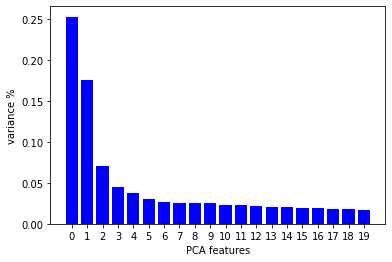

In [ ]:
#verifico
features = range(len(famd.explained_inertia_))
plt.bar(features, famd.explained_inertia_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [ ]:
famd.explained_inertia_

array([0.25260082, 0.17550321, 0.07005086, 0.04537368, 0.03715102,
       0.03077584, 0.02648111, 0.02594355, 0.02523669, 0.02486915,
       0.02329972, 0.02306993, 0.02220246, 0.02061924, 0.02036816,
       0.01950053, 0.01909458, 0.01856261, 0.0174445 , 0.01654626])

In [ ]:
cumsum[:14]

array([0.25260082, 0.42810403, 0.49815489, 0.54352857, 0.58067959,
       0.61145543, 0.63793654, 0.66388009, 0.68911678, 0.71398593,
       0.73728566, 0.76035559, 0.78255804, 0.80317728])

pasa lo mismo de antes, no va a funcionar ya que si bajo los componenetes la explicabilidad baja tmb y si considero 80% de explicabilidad solo salvaria 6 columnas, pero veamos como performan.

Como ya estan entre 0 y 1 no necesito pipeline

In [ ]:
models = {
    'RandomForest_Best_PCA_FAMD': RandomForestClassifier(max_depth= None,max_features=5,min_samples_split=3,min_samples_leaf=1,
                                  n_estimators=350,bootstrap=False, random_state=0, n_jobs=-1), #mi mejor modelo hasta ahora
    'RandomForest_PCA_FAMD': RandomForestClassifier(random_state=0, n_jobs=-1)
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'accuracy':[],
        'f1':[],
}

for model in tqdm(models):
    results = cross_validate_model(models[model], X_FAMD, y_PCA_SFS, ['accuracy','f1_weighted'], verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))

model_2_results = pd.concat([model_2_results,pd.DataFrame(result_dict)])
model_2_results.sort_values('accuracy', ascending = False)

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



model  fit_time  score_time      f1  accuracy
0        RandomForest_Best_PCA_SFS    5.5756      0.1630  0.7618    0.7671
0            RandomForest_Best_PCA    5.7955      0.1814  0.7510    0.7541
1             RandomForest_PCA_SFS    1.4560      0.0497  0.7421    0.7475
0  RandomForestClassifier_RandomCV    4.9772      0.1776  0.7417    0.7458
0    RandomForestClassifier_GridCV    6.2722      0.1894  0.7403    0.7437
3                 RandomForest_PCA    1.2504      0.0503  0.7389    0.7428
2           RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
1            RandomForest_PCA_FAMD    2.4103      0.0748  0.6460    0.6534
0       RandomForest_Best_PCA_FAMD   12.2318      0.1853  0.6455    0.6534
1                          XGBoost   12.1911      0.0083  0.6089    0.6120
0                    TreeClasifier    0.1250      0.0025  0.5354    0.5389
0                     SVC_rbf_grid    1.7336      0.1775  0.4279    0.4351
1                    SVC_poly_grid    3.0442      0.0928  0.3515    0.3760
1                          SVC_rbf    2.5866      0.2536  0.3020    0.3242
1                 SVC_rbf_grid_PCA    2.1798      0.1921  0.2343    0.2476
0                         SVC_poly    2.8228      0.0884  0.1373    0.2306
2                SVC_poly_grid_PCA    2.8848      0.0915  0.1261    0.2175

###### Conclución
performo peor

#### Le aplico gridsearch al PCA + SFS

los parametros andan cerca de los que estan pero por ahi performa mejor con otros

In [ ]:
scoring = {'accuracy':'accuracy','f1':'f1_weighted'}

rfc_params = {
    'max_depth': [15,None,20,25],
    'max_features': [5,'auto',8],
    'min_samples_split': [2,3],
    'n_estimators': [250,300,350,400]
}

random_cv_models = [
    ('RandomForest_PCA_SFS_GRID', RandomForestClassifier(min_samples_leaf=1,bootstrap=False,random_state=0,n_jobs=-1), rfc_params)
]

results = []
for i in range(len(random_cv_models)):
  model = random_cv_models[i][1]
  model_name = random_cv_models[i][0]
  params = random_cv_models[i][2]
  print(f'{bcolors.OKCYAN}=============\n{model_name}\n============={bcolors.ENDC}')

  clf = GridSearchCV(model,
                     params,
                     scoring=scoring,
                     refit='f1',
                     return_train_score=True,
                     verbose=1,
                     n_jobs=-1)
  
  clf.fit(X_PCA_SFS,y_PCA_SFS)
  results.append((model_name,clf))

RandomForest_PCA_SFS_GRID
Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
clf.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 250}

In [ ]:
models = {
    'RandomForest_PCA_SFS_GRID': RandomForestClassifier(bootstrap=False, max_depth=None, n_estimators=250,
                       min_samples_leaf=1, min_samples_split=2, n_jobs=-1, max_features=5, random_state=0)
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'accuracy':[],
        'f1':[],
}

for model in tqdm(models):
    results = cross_validate_model(models[model], X_PCA_SFS, y_PCA_SFS, ['accuracy','f1_weighted'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))

model_2_results = pd.concat([model_2_results,pd.DataFrame(result_dict)])
model_2_results.sort_values('accuracy', ascending = False)

  0%|          | 0/1 [00:00<?, ?it/s]

model  fit_time  score_time      f1  accuracy
0        RandomForest_PCA_SFS_GRID    6.1223      0.2076  0.7628    0.7677
0        RandomForest_Best_PCA_SFS    5.5756      0.1630  0.7618    0.7671
0            RandomForest_Best_PCA    5.7955      0.1814  0.7510    0.7541
1             RandomForest_PCA_SFS    1.4560      0.0497  0.7421    0.7475
0  RandomForestClassifier_RandomCV    4.9772      0.1776  0.7417    0.7458
0    RandomForestClassifier_GridCV    6.2722      0.1894  0.7403    0.7437
3                 RandomForest_PCA    1.2504      0.0503  0.7389    0.7428
2           RandomForestClassifier    1.1857      0.0432  0.7301    0.7348
0       RandomForest_Best_PCA_FAMD   12.2318      0.1853  0.6455    0.6534
1            RandomForest_PCA_FAMD    2.4103      0.0748  0.6460    0.6534
1                          XGBoost   12.1911      0.0083  0.6089    0.6120
0                    TreeClasifier    0.1250      0.0025  0.5354    0.5389
0                     SVC_rbf_grid    1.7336      0.1775  0.4279    0.4351
1                    SVC_poly_grid    3.0442      0.0928  0.3515    0.3760
1                          SVC_rbf    2.5866      0.2536  0.3020    0.3242
1                 SVC_rbf_grid_PCA    2.1798      0.1921  0.2343    0.2476
0                         SVC_poly    2.8228      0.0884  0.1373    0.2306
2                SVC_poly_grid_PCA    2.8848      0.0915  0.1261    0.2175

##### Conclución

el grid performo practicamente igual que el que ya estaba y resulto ser el mejor modelo.



### Feature importances del modelo_2 final

In [ ]:
modelo_2 = RandomForestClassifier(bootstrap=False, max_depth=None, n_estimators=250,
                       min_samples_leaf=1, min_samples_split=2, n_jobs=-1, max_features=5, random_state=0)

modelo_2.fit(X_PCA_SFS, y_PCA_SFS)

RandomForestClassifier(bootstrap=False, max_features=5, n_estimators=250,
                       n_jobs=-1, random_state=0)

In [ ]:
#saco los nombres delas columnas para ver la feature importance de ambos modelos
one_hot_cols = pipe_2_PCA_SFS.named_steps["preprocessing"].named_transformers_['one_hot'].get_feature_names()
all_pipe_cols = np.concatenate([one_hot_cols,ordinal_cols,scaler_cols])
len(all_pipe_cols)

55

In [ ]:
pipe_2_PCA_SFS.named_steps['SFS'].get_support()

array([False, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
#verifico q la macara coinicda con las features que tengo
len(pipe_2_PCA_SFS.named_steps['SFS'].get_support())

57

In [ ]:
#no conto las del pca asi q las agrego
all_pipe_cols = np.concatenate([all_pipe_cols,['PCA_0','PCA_1']])

In [ ]:
#filtro
filter = pipe_2_PCA_SFS.named_steps['SFS'].get_support()
all_pipe_cols = all_pipe_cols[filter]

In [ ]:
len(modelo_2.feature_importances_) , len(all_pipe_cols)

(28, 28)

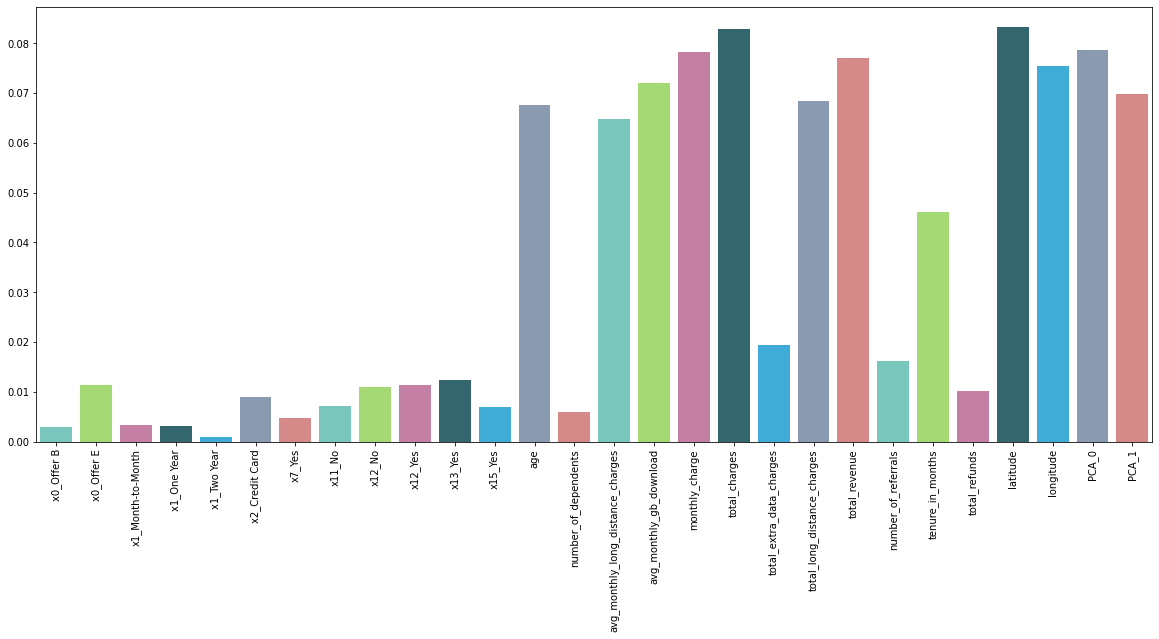

In [ ]:
feature_importances = modelo_2.feature_importances_

fig, ax = plt.subplots(figsize=(20,8))
g = sns.barplot(x=all_pipe_cols,y=feature_importances,ax=ax,palette= cat_palette)
plt.xticks(rotation=90)
plt.show()

In [ ]:
feature_importance_modelo_2 = pd.DataFrame({'columna':all_pipe_cols,'importancia':feature_importances * 100})
feature_importance_modelo_2 = feature_importance_modelo_2.sort_values('importancia',ascending=False)
feature_importance_modelo_2.head(15).reset_index(drop=True).style.background_gradient(cmap="Greens")

El modelo 2 tubo feature imporances priorizando los cargos y el pca similares a lo q se vio en el EDA

### Conclución del modelo 2

Si bien la accuracy del modelo no es muy alta (77%) es aceptable.

La baja accuracy se debe principalmente a la varianza y la poca cantidad de instancias en el dataset para churn category ya que el segundo modelo entrena solamente con los churned del dataset, que son aproximadamente un 30%.

Ademas el segundo modelo es complementario, no es el indispensable para el negocio. Se podria mejorar si se tubiesen mas datos (podrian provenir de los cuatrimestres pasados y de los datos que se tomen a futuro)

### Exporto el modelo 2



#### Creo la clase que va a ser exportada como pickle

In [ ]:
class Model_2:
    '''Clase del modelo de clasificacción multiple'''
    import pandas as pd

    def __init__(self, pipeline, model):
        self.pipeline = pipeline
        self.model = model
    
    def clean_nulls_dataset(self, df:pd.DataFrame, cols_to_drop:list)->tuple:
        '''Reemplaza Nulos numericos con 0 y Categoricos con No
        Retorna copia del imputado df limpio y lista de indices de las variables categoricas'''
        import pandas as pd

        df = df.drop(cols_to_drop,axis=1).copy()
        categorical_cols = []
        categorical_idx = []
        num_cols = []

        for i,col in enumerate(df.columns):
            if df[col].dtypes.str=='|O':
                categorical_idx.append(i)
                categorical_cols.append(col)
            else:
                num_cols.append(i)

        null_status = df.isna().sum()

        for col in categorical_cols:
            df[col].fillna('No',inplace=True)
        for col in numerical_cols:
            df[col].fillna(0,inplace=True)

        null_status = df.isna().sum()

        return df , categorical_idx

    def predict(self, df:pd.DataFrame)->pd.DataFrame:
        '''Retorna las predict proba de cada categoria'''
        data, _ = self.clean_nulls_dataset(df,[])
        data = self.pipeline.transform(data)

        preds = self.model.predict_proba(data)[:len(data)]

        out_dict = {
            'attitude_reason_chance':[],
            'competitor_reason_chance':[],
            'dissatisfaction_reason_chance':[],
            'other_reason_chance':[],
            'price_reason_chance':[],
        }

        for pred in preds:
            out_dict['attitude_reason_chance'].append(round(pred[0]*100,2))
            out_dict['competitor_reason_chance'].append(round(pred[1]*100,2))
            out_dict['dissatisfaction_reason_chance'].append(round(pred[2]*100,2))
            out_dict['other_reason_chance'].append(round(pred[3]*100,2))
            out_dict['price_reason_chance'].append(round(pred[4]*100,2))

        return pd.DataFrame(out_dict)

In [ ]:
model_2 = Model_2(pipe_2_PCA_SFS, modelo_2)

#### Exporto a pickle

In [ ]:
pickle.dump(Model_2(pipe_2_PCA_SFS, modelo_2), open('Modelo_2.pkl', 'wb'))

#### verifico que funcione tirandole todo el dataset

In [ ]:
with (open("/content/Modelo_2.pkl", "rb")) as f:
    modelo_2_ext = pickle.load(f)

test = import_dataset()
modelo_2_ext.predict(test)

attitude_reason_chance  competitor_reason_chance  \
0                       33.2                      16.0   
1                       15.2                      26.0   
2                        0.0                     100.0   
3                       17.2                      44.4   
4                        0.0                       0.0   
...                      ...                       ...   
7038                     5.2                      76.4   
7039                     0.0                       0.0   
7040                    10.4                      23.6   
7041                    26.0                      44.4   
7042                    23.2                      39.6   

      dissatisfaction_reason_chance  other_reason_chance  price_reason_chance  
0                              35.2                 10.4                  5.2  
1                              13.6                 12.4                 32.8  
2                               0.0                  0.0                  0.0  
3                              25.6                  5.2                  7.6  
4                             100.0                  0.0                  0.0  
...                             ...                  ...                  ...  
7038                            7.2                  6.8                  4.4  
7039                          100.0                  0.0                  0.0  
7040                           40.4                 18.4                  7.2  
7041                           15.6                 11.6                  2.4  
7042                           12.0                 17.2                  8.0  

[7043 rows x 5 columns]

## Modelo 1

Vamos a hacer lo mismo que al modelo 2 pero con xgboost y random forest.

### Random search

al modelo que mejor performe le voy a correr el grid

In [ ]:
scoring = {'accuracy':'accuracy','f1':'f1_weighted'}

rfc_r_params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100, 150, 200, 300, 400]
}

xgb_r_params = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "squared_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}

random_cv_models = [
    ('RandomForestClassifier', RandomForestClassifier(random_state=0, n_jobs=-1), rfc_r_params),
    ('XGBoost', GradientBoostingClassifier(random_state=0), xgb_r_params)

]

results = []
for i in range(len(random_cv_models)):
  model = random_cv_models[i][1]
  model_name = random_cv_models[i][0]
  params = random_cv_models[i][2]
  print(f'{bcolors.OKCYAN}=============\n{model_name}\n============={bcolors.ENDC}')

  clf = RandomizedSearchCV(model,
                    params,
                    scoring=scoring,
                    refit='f1',
                    return_train_score=True,
                    verbose=1,
                    n_iter = 100,
                    random_state=0,
                    n_jobs=-1)
  
  clf.fit(X_1_train,y_1_train)
  results.append((model_name,clf))

RandomForestClassifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGBoost
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print(results[0][0])
results[0][1].best_params_

RandomForestClassifier


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
print(results[1][0])
results[1][1].best_params_

XGBoost


{'subsample': 1.0,
 'n_estimators': 10,
 'min_samples_split': 0.42727272727272736,
 'min_samples_leaf': 0.1,
 'max_features': 'sqrt',
 'max_depth': 3,
 'learning_rate': 0.2,
 'criterion': 'squared_error'}

In [ ]:
models = {
    'XGBoost_RandomCV': GradientBoostingClassifier(subsample=1, n_estimators=10, 
                                          min_samples_split=0.42727272727272736,
                                          min_samples_leaf=0.1, max_features='sqrt',
                                          max_depth=3, learning_rate=0.2, 
                                          criterion= 'squared_error', random_state=0), 
          
    'RandomForestClassifier_RandomCV': RandomForestClassifier(n_estimators=200, min_samples_split=2,
                                                     min_samples_leaf=1, max_features='auto',
                                                     max_depth=80, bootstrap=True, random_state=0)
}

result_dict = {
    'model': [],
    'fit_time': [],
    'score_time':[],
    'recall':[],
    'f1':[],
    'accuracy':[],
}

for model in models:
    results = cross_validate_model(models[model], X_1_train, y_1_train, ['recall_weighted','f1_weighted','accuracy'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['recall'].append(round(results['test_recall_weighted'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))

model_1_results = pd.concat([model_1_results, pd.DataFrame(result_dict)])
model_1_results.sort_values('recall', ascending = False)

model  fit_time  score_time  recall      f1  \
1  RandomForestClassifier_RandomCV    5.0620      0.1098  0.8953  0.8947   
2           RandomForestClassifier    1.5744      0.0367  0.8941  0.8936   
1                          XGBoost    5.0135      0.0076  0.8918  0.8915   
0                 XGBoost_RandomCV    0.1151      0.0058  0.8552  0.8549   
0                    TreeClasifier    0.1302      0.0038  0.8438  0.8433   

   accuracy  
1    0.8953  
2    0.8941  
1    0.8918  
0    0.8552  
0    0.8438

Bueno sigo mejorando con el RandomForest

### Grid Search

In [ ]:
scoring = {'accuracy':'accuracy','f1':'f1_weighted'}

rfc_params = {
    'max_depth': [75, 80, 85],
    'max_features': ['sqrt', None, 'log2'],
    'n_estimators': [150,200,250,300]
}

random_cv_models = [
    ('RandomForest', RandomForestClassifier(min_samples_leaf=1, bootstrap=True,
                                            min_samples_split=2, random_state=0,
                                            n_jobs=-1), rfc_params)
]

results = []
for i in range(len(random_cv_models)):
  model = random_cv_models[i][1]
  model_name = random_cv_models[i][0]
  params = random_cv_models[i][2]
  print(f'{bcolors.OKCYAN}=============\n{model_name}\n============={bcolors.ENDC}')

  clf = GridSearchCV(model,
                     params,
                     scoring=scoring,
                     refit='f1',
                     return_train_score=True,
                     verbose=1,
                     n_jobs=-1)
  
  clf.fit(X_1_train,y_1_train)
  results.append((model_name,clf))

RandomForest
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
results[0][1].best_params_

{'max_depth': 75, 'max_features': 'sqrt', 'n_estimators': 200}

In [ ]:
models = {
    'RandomForestClassifier_GridCV': RandomForestClassifier(n_estimators=200, min_samples_split=2,
                                                     min_samples_leaf=1, max_features='sqrt',
                                                     max_depth=75, bootstrap=True, random_state=0)
}

result_dict = {
    'model': [],
    'fit_time': [],
    'score_time':[],
    'recall':[],
    'f1':[],
    'accuracy':[],
}

for model in models:
    results = cross_validate_model(models[model], X_1_train, y_1_train, ['recall_weighted','f1_weighted','accuracy'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['recall'].append(round(results['test_recall_weighted'].mean(),4))
    result_dict['f1'].append(round(results['test_f1_weighted'].mean(),4))
    result_dict['accuracy'].append(round(results['test_accuracy'].mean(),4))

model_1_results = pd.concat([model_1_results, pd.DataFrame(result_dict)])
model_1_results.sort_values('recall', ascending = False)

model  fit_time  score_time  recall      f1  \
1  RandomForestClassifier_RandomCV    5.0620      0.1098  0.8953  0.8947   
0    RandomForestClassifier_GridCV    5.1772      0.1208  0.8953  0.8947   
2           RandomForestClassifier    1.5744      0.0367  0.8941  0.8936   
1                          XGBoost    5.0135      0.0076  0.8918  0.8915   
0                 XGBoost_RandomCV    0.1151      0.0058  0.8552  0.8549   
0                    TreeClasifier    0.1302      0.0038  0.8438  0.8433   

   accuracy  
1    0.8953  
0    0.8953  
2    0.8941  
1    0.8918  
0    0.8552  
0    0.8438

Random y cv dieron exactamente igual, lo cual tiene un poco sentido pq solo cambio la max depth de 80 a 75, elijo el random como el mejor modelo pq tarda un poco menos en dar resultados

### Conclución

Como la performance del modelo es bastante buena (90% recall , f1 y accuracy) y no quiero overfitear al dataset voy a terminar usando el Random Forest que salio del RandomCV como el modelo 1 final

In [ ]:
modelo_1 = RandomForestClassifier(n_estimators=200, min_samples_split=2,
                                                     min_samples_leaf=1, max_features='auto',
                                                     max_depth=80, bootstrap=True, random_state=0)

modelo_1.fit(X_1_train,y_1_train)

RandomForestClassifier(max_depth=80, n_estimators=200, random_state=0)

### Feature importances del modelo_1 final

In [ ]:
#saco los nombres delas columnas para ver la feature importance de ambos modelos
one_hot_cols = pipe_1_2.named_steps["preprocessing"].named_transformers_['one_hot'].get_feature_names()
all_pipe_cols = np.concatenate([one_hot_cols,ordinal_cols,scaler_cols])
len(all_pipe_cols)

55

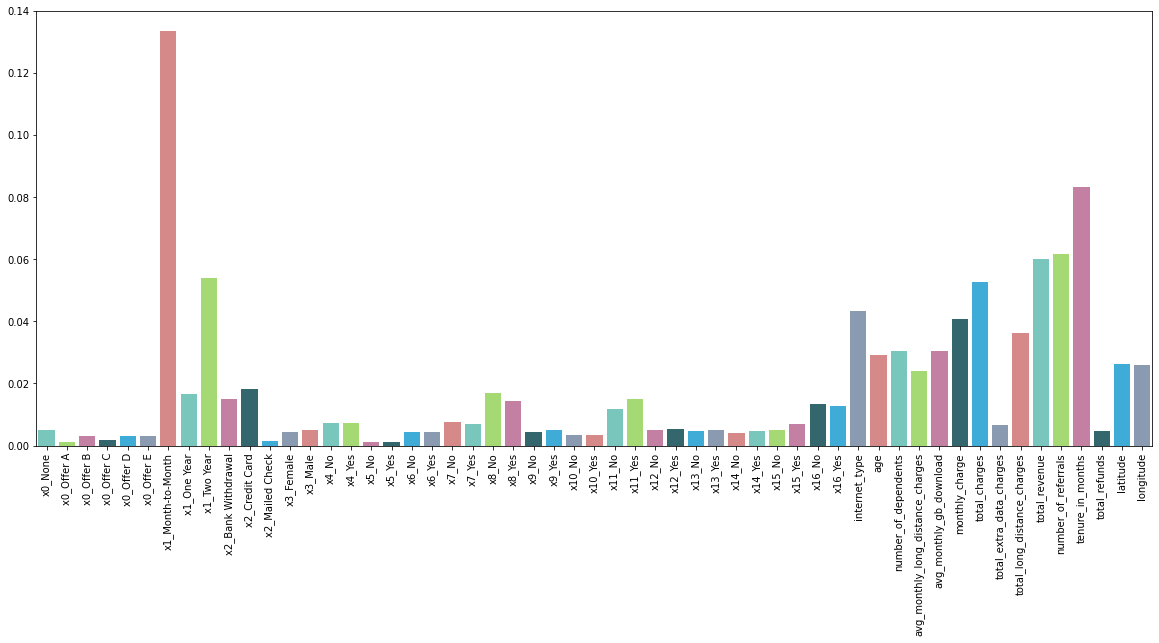

In [ ]:
feature_importances = modelo_1.feature_importances_

fig, ax = plt.subplots(figsize=(20,8))
g = sns.barplot(x=all_pipe_cols,y=feature_importances,ax=ax,palette= cat_palette)
plt.xticks(rotation=90)
plt.show()

In [ ]:
feature_importance_modelo_1 = pd.DataFrame({'columna':all_pipe_cols,'importancia':feature_importances * 100})
feature_importance_modelo_1 = feature_importance_modelo_1.sort_values('importancia',ascending=False)
feature_importance_modelo_1.head(15).reset_index(drop=True).style.background_gradient(cmap="Greens")

Interesante, no le importo las ofertas al modelo 1. Pero si la tenure, el total revenue y el pago.

### Conclución del modelo 1

Bastante bien, 90% de recall y f1 es bueno para el negocio

### Exporto el modelo 1

#### Creo la clase del modelo 1

In [ ]:
class Model_1:
    '''Clase del modelo de clasificacción multiple'''
    import pandas as pd

    def __init__(self, pipeline, model):
        self.pipeline = pipeline
        self.model = model
    
    def clean_nulls_dataset(self, df:pd.DataFrame, cols_to_drop:list)->tuple:
        '''Reemplaza Nulos numericos con 0 y Categoricos con No
        Retorna copia del imputado df limpio y lista de indices de las variables categoricas'''
        import pandas as pd

        df = df.drop(cols_to_drop,axis=1).copy()
        categorical_cols = []
        categorical_idx = []
        num_cols = []

        for i,col in enumerate(df.columns):
            if df[col].dtypes.str=='|O':
                categorical_idx.append(i)
                categorical_cols.append(col)
            else:
                num_cols.append(i)

        null_status = df.isna().sum()

        for col in categorical_cols:
            df[col].fillna('No',inplace=True)
        for col in numerical_cols:
            df[col].fillna(0,inplace=True)

        null_status = df.isna().sum()

        return df , categorical_idx

    def predict(self, df:pd.DataFrame)->pd.DataFrame:
        '''Retorna las predict proba de cada categoria'''
        data, _ = self.clean_nulls_dataset(df,[])
        data = self.pipeline.transform(data)

        out_dict = {
            'churn_chance': []
        }

        preds = self.model.predict_proba(data)
        preds = preds.round(2) * 100
        out_dict['churn_chance'] = [ pred[0] for pred in preds ] #Getting churn chance for the predictions
        
        return pd.DataFrame(out_dict)

#### Exporto a pickle

In [ ]:
modelo_1 = RandomForestClassifier(n_estimators=400,min_samples_split=5,min_samples_leaf=1,max_features='sqrt'
                                        ,max_depth=80,bootstrap=True,random_state=0, n_jobs=-1)

modelo_1.fit(X_1_train,y_1_train)

RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_split=5,
                       n_estimators=400, n_jobs=-1, random_state=0)

In [ ]:
#Guardo el modelo en un pickle
pickle.dump(Model_1(pipe_1_2, modelo_1), open('Modelo_1.pkl', 'wb'))

#### Verifico que funcione

In [ ]:
with (open("/content/Modelo_1.pkl", "rb")) as f:
    modelo_1_ext = pickle.load(f)

test = import_dataset()
modelo_1_ext.predict(test)

churn_chance
0             13.0
1             24.0
2             91.0
3             92.0
4             92.0
...            ...
7038           8.0
7039          97.0
7040          97.0
7041           2.0
7042           6.0

[7043 rows x 1 columns]

# Modelo 3: Regresor de total revenue para estimar cuanta ganancia me va a dar un usuario en el cuatrimestre.

El fin de este modelo es ayudar a priorizar ciertos clientes, ya que no es lo mismo perder a un cliente que gasta lo minimo al mes que a uno de los clientes que mas paga.

Para hacerlo el modelo lo que va a hacer es predecir las ganancias que provendrian del cliente.

> Voy a usar solo los Stayed para entrenar ya que como no tengo fecha de entrada y salida de los Joined y Churned, no puedo saber el tiempo que estuvieron en el servicio durante cuatrimestre.
>

## Importo, filtro y limpio nulos en el dataset

In [ ]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

def import_dataset()->pd.DataFrame:
    df = pd.read_csv('https://github.com/Lemonpi3/datasets-coderhouse/blob/main/telecom_customer_churn.csv?raw=true')

    #normalizo las columnas del dataset para manejarlas de forma mas comoda con pandas
    rename_dict = {}
    cols = list(df.columns)
    cols = [col.lower().replace(' ','_') for col in cols]

    for key in list(df.columns):
        for value in cols:
            rename_dict[key] = value
            cols.remove(value)
            break

    df = df.rename(rename_dict,axis=1)
    return df

df = import_dataset()
print(f'shape inicial {df.shape}')
df = df[df.customer_status == 'Stayed']
print(f'shape filtrado {df.shape}')

shape inicial (7043, 38)
shape filtrado (4720, 38)


In [ ]:
df.head()

customer_id  gender  age married  number_of_dependents          city  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
5  0013-MHZWF  Female   23      No                     3      Midpines   
6  0013-SMEOE  Female   67     Yes                     0        Lompoc   
7  0014-BMAQU    Male   52     Yes                     0          Napa   

   zip_code   latitude   longitude  number_of_referrals  tenure_in_months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
5     95345  37.581496 -119.972762                    0                 9   
6     93437  34.757477 -120.550507                    1                71   
7     94558  38.489789 -122.270110                    8                63   

     offer phone_service  avg_monthly_long_distance_charges multiple_lines  \
0     None           Yes                              42.39             No   
1     None           Yes                              10.69            Yes   
5  Offer E           Yes                              16.77             No   
6  Offer A           Yes                               9.96             No   
7  Offer B           Yes                              12.96            Yes   

  internet_service internet_type  avg_monthly_gb_download online_security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
5              Yes         Cable                     73.0              No   
6              Yes   Fiber Optic                     14.0             Yes   
7              Yes   Fiber Optic                      7.0             Yes   

  online_backup device_protection_plan premium_tech_support streaming_tv  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
5            No                     No                  Yes          Yes   
6           Yes                    Yes                  Yes          Yes   
7            No                     No                  Yes           No   

  streaming_movies streaming_music unlimited_data        contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
5              Yes             Yes            Yes  Month-to-Month   
6              Yes             Yes            Yes        Two Year   
7               No              No             No        Two Year   

  paperless_billing   payment_method  monthly_charge  total_charges  \
0               Yes      Credit Card           65.60         593.30   
1                No      Credit Card           -4.00         542.40   
5               Yes      Credit Card           69.40         571.45   
6               Yes  Bank Withdrawal          109.70        7904.25   
7               Yes      Credit Card           84.65        5377.80   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
5           0.00                         0                       150.93   
6           0.00                         0                       707.16   
7           0.00                        20                       816.48   

   total_revenue customer_status churn_category churn_reason  
0         974.81          Stayed            NaN          NaN  
1         610.28          Stayed            NaN          NaN  
5         722.38          Stayed            NaN          NaN  
6        8611.41          Stayed            NaN          NaN  
7        6214.28          Stayed            NaN          NaN

In [ ]:
def clean_nulls_dataset(df:pd.DataFrame,cols_to_drop:list)->tuple:
        '''Reemplaza Nulos numericos con 0 y Categoricos con No
        
        Retorna copia del imputado df limpio y lista de indices de las variables categoricas'''

        df = df.drop(cols_to_drop,axis=1).copy()
        categorical_cols = []
        categorical_idx = []
        num_cols = []

        for i,col in enumerate(df.columns):
            if df[col].dtypes.str=='|O':
                categorical_cols.append(col)
                categorical_idx.append(list(df.columns).index(col))
            else:
                num_cols.append(col)

        null_status = df.isna().sum()

        for col in categorical_cols:
            df[col].fillna('No',inplace=True)
        for col in num_cols:
            df[col].fillna(0,inplace=True)

        null_status = df.isna().sum()

        return df , categorical_idx

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

Quito las columnas total_charges,	total_refunds,	total_extra_data_charges y total_long_distance_charges 
ya que esas no existiran como input y podrian ademas causar que el modelo solo use esas para calcular total revenue (que es la suma de las mismas).

La idea de este modelo es proyectar las ganancias que provendrian del cliente.

In [ ]:
df, cat_idx = clean_nulls_dataset(df,['customer_id','churn_reason','churn_category',
                                      'customer_status','city','zip_code',
                                      'total_charges', 'total_refunds', 'total_extra_data_charges',	'total_long_distance_charges'])

## Armo la pipeline

In [ ]:
one_hot_cols = ['offer','contract','payment_method','gender','married','phone_service',
                'multiple_lines','internet_service','online_security','online_backup',
                'device_protection_plan','premium_tech_support','streaming_tv','streaming_movies',
                'streaming_music','unlimited_data','paperless_billing']
#la unica ordinal es internet type ya que esta ordenada por velocidad
ordinal_cols = ['internet_type']
#numericas
scaler_cols = ['age', 'number_of_dependents','avg_monthly_long_distance_charges',
               'avg_monthly_gb_download', 'monthly_charge', 
               'number_of_referrals', 'tenure_in_months','latitude', 'longitude']

In [ ]:
one_hot = OneHotEncoder()
ordinal = OrdinalEncoder(categories=[['No','Cable','DSL','Fiber Optic']])
rob_scaler = RobustScaler()

transformers=[
        ("one_hot", one_hot, one_hot_cols),
        ("ordinal", ordinal, ordinal_cols),
        ("rob_scaler", rob_scaler, scaler_cols), 
    ]

def create_pipe(transformers):
  preprocessor = ColumnTransformer(
      transformers=transformers,
      remainder ='drop',
      sparse_threshold=0
  )

  steps = [
    ("preprocessing",preprocessor),
  ]
  return Pipeline(steps)

pipe = create_pipe(transformers)
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['offer', 'contract',
                                                   'payment_method', 'gender',
                                                   'married', 'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection_plan',
                                                   'premium_tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                   

In [ ]:
y = df.pop('total_revenue')
X = df

print(X.shape, y.shape)

(4720, 27) (4720,)


## Separo en train y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [ ]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((3304, 27), (3304,), (1416, 27), (1416,))

## Preparo los datos de train y test

In [ ]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

## Entreno modelos

In [ ]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
models = {
    'LinearRegression': LinearRegression(), #mi modelo base como el mas simple
    'Ridge': Ridge(random_state=0),
    'Lasso': Lasso(random_state=0),
    'SVM': SVR()
}

trained_models={}

for i in range(len(list(models))):
    model = list(models.values())[i]
    key =list(models.keys())[i]
    print(f'{bcolors.OKCYAN}=============\n{key}\n============={bcolors.ENDC}')
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    metrics = {
        'R2_Train': r2_score(y_train,train_pred ),
        'RMSE_Train': mean_squared_error(y_train, train_pred, squared=False),
        'MSE_Train': mean_squared_error(y_train, train_pred),

        'R2_Test': r2_score(y_test, test_pred),
        'RMSE_Test': mean_squared_error(y_test, test_pred, squared=False),
        'MSE_Test': mean_squared_error(y_test, test_pred),
      }
    
    trained_models[key]= {'model':model,'metrics':metrics}
    i = 0
    for k,v in zip(metrics.keys(), metrics.values()):
        if i == 3:
            print('-'*30)
        print(f'{k}: {v}')
        i+=1

LinearRegression
R2_Train: 0.9259605426277862
RMSE_Train: 778.8774728186756
MSE_Train: 606650.1176644068
------------------------------
R2_Test: 0.9280550065390495
RMSE_Test: 758.9677495543268
MSE_Test: 576032.0448635593
Ridge
R2_Train: 0.9264296323241537
RMSE_Train: 776.4061963102296
MSE_Train: 602806.5816689187
------------------------------
R2_Test: 0.9276775116388136
RMSE_Test: 760.9562938541053
MSE_Test: 579054.4811561754
Lasso
R2_Train: 0.9263896101711225
RMSE_Train: 776.6173494127497
MSE_Train: 603134.5074088849
------------------------------
R2_Test: 0.9277091248880178
RMSE_Test: 760.78996294574
MSE_Test: 578801.3677189804
SVM
R2_Train: 0.018249759978612556
RMSE_Train: 2836.207737862417
MSE_Train: 8044074.33231065
------------------------------
R2_Test: 0.014351661295638474
RMSE_Test: 2809.2088661398525
MSE_Test: 7891654.453598755


SVM sin parametros fue desastrozo, los otros 3 modelos parece que performaron muy bien. Voy a hacer validación cruzada con todo X e y para verificar

In [ ]:
X_prepared = pipe.transform(X)
len(X_prepared), len(y)

(4720, 4720)

In [ ]:
from sklearn.model_selection import cross_validate

def cross_validate_model(model,X,y,scoring,cv=10,verbose=True):
    cv = cross_validate(
        model,
        X,
        y,
        scoring=scoring,
        return_estimator=True,
        cv=cv,
        n_jobs=-1)
    
    estimator = cv['estimator'][0]
    fit_time = cv['fit_time'].mean()
    score_time= round(cv['score_time'].mean(),2)
    if verbose:
        print(f'estimator: {estimator}\n----------')
        print(f'fit_time_mean: {round(fit_time,2)}\n----------')
        print(f'pred_time_mean: {round(score_time,2)}\n----------')
    scores = []
    for score in scoring:
        key = f'test_{score}'
        if verbose:
            print(f'{score} mean: {round(cv[key].mean(),2)}\n----------')

    return cv

## Evaluando modelos

In [ ]:
models = {
    'LinearRegression': LinearRegression(), #mi modelo base como el mas simple
    'Ridge': Ridge(random_state=0),
    'Lasso': Lasso(random_state=0),
    'SVM': SVR()
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'r2':[],
        'neg_RMSE':[],
        'neg_MSE':[],
}

for model in models:
    results = cross_validate_model(models[model], X_prepared, y, ['r2','neg_root_mean_squared_error','neg_mean_squared_error'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['r2'].append(round(results['test_r2'].mean(),4))
    result_dict['neg_RMSE'].append(round(results['test_neg_root_mean_squared_error'].mean(),4))
    result_dict['neg_MSE'].append(round(results['test_neg_mean_squared_error'].mean(),4))

models_result = pd.DataFrame(result_dict)
models_result

model  fit_time  score_time      r2   neg_RMSE       neg_MSE
0  LinearRegression    0.0351      0.0100  0.9256  -776.8456 -6.040733e+05
1             Ridge    0.0202      0.0060  0.9256  -776.4127 -6.033773e+05
2             Lasso    0.0762      0.0053  0.9257  -776.3192 -6.032356e+05
3               SVM    4.7604      0.5474  0.0414 -2789.6348 -7.787291e+06

Parece que sirve cualquiera de los 3 modelos. SVM, requeriria tunear los parametros.

## Mejorando modelos

Veamos si podemos mejorar los modelos todavia cambiando sus parametros y ver si se destaca alguno.
Usare grid search ya que son pocos

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svr_params = {
    'kernel': ['linear', 'poly'], #como ya se que la de defecto (rbf) performo horrible la descarto.
    'C':[0.1, 0.5, 1, 1.5, 5, 10]
}

ridge_params = {
    'alpha': [0.1, 0.5, 1, 1.5, 5, 10],
}

lasso_params = {
    'selection': ['cyclic', 'random']
}

grid_models = {
    'Ridge': (Ridge(random_state=0), ridge_params),
    'Lasso': (Lasso(random_state=0), lasso_params),
    'SVM': (SVR(), svr_params)
}

scoring ={'r2':'r2' ,'neg_RMSE':'neg_root_mean_squared_error', 'neg_MSE':'neg_mean_squared_error'}
grid_results = []

for model in grid_models:
    clf = GridSearchCV(grid_models[model][0],
                         grid_models[model][1],
                         scoring=scoring,
                         refit='r2',
                         return_train_score=True,
                         verbose=1,
                         n_jobs=-1)
    
    clf.fit(X_prepared,y)
    grid_results.append((model,clf))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
for i,model in enumerate(grid_models):
    print(model)
    print(grid_results[i][1].best_params_)

Ridge
{'alpha': 1.5}
Lasso
{'selection': 'cyclic'}
SVM
{'C': 10, 'kernel': 'linear'}


In [ ]:
models = {
    'Ridge_Grid': Ridge(alpha=1.5 ,random_state=0),
    'Lasso_Grid': Lasso(selection='cyclic', random_state=0),
    'SVM_Grid': SVR(C=10, kernel='linear')
}

result_dict = {
        'model': [],
        'fit_time': [],
        'score_time':[],
        'r2':[],
        'neg_RMSE':[],
        'neg_MSE':[],
}

for model in models:
    results = cross_validate_model(models[model], X_prepared, y, ['r2','neg_root_mean_squared_error','neg_mean_squared_error'],verbose=False)
    
    result_dict['model'].append(model)
    result_dict['fit_time'].append(round(results['fit_time'].mean(),4))
    result_dict['score_time'].append(round(results['score_time'].mean(),4))
    result_dict['r2'].append(round(results['test_r2'].mean(),4))
    result_dict['neg_RMSE'].append(round(results['test_neg_root_mean_squared_error'].mean(),4))
    result_dict['neg_MSE'].append(round(results['test_neg_mean_squared_error'].mean(),4))

models_result = pd.concat([models_result,pd.DataFrame(result_dict)])
models_result.sort_values(by='r2',ascending=False)

model  fit_time  score_time      r2   neg_RMSE       neg_MSE
2             Lasso    0.0762      0.0053  0.9257  -776.3192 -6.032356e+05
1        Lasso_Grid    0.0294      0.0022  0.9257  -776.3192 -6.032356e+05
0  LinearRegression    0.0351      0.0100  0.9256  -776.8456 -6.040733e+05
1             Ridge    0.0202      0.0060  0.9256  -776.4127 -6.033773e+05
0        Ridge_Grid    0.0063      0.0019  0.9256  -776.4083 -6.033731e+05
2          SVM_Grid    1.7486      0.1262  0.9182  -814.3487 -6.643166e+05
3               SVM    4.7604      0.5474  0.0414 -2789.6348 -7.787291e+06

Practicamente no hay diferencia entre Lasso Linear y Ridge. SVM mejoro bastante con los parametros pero no alcanzo para pasarlos, voy a elegir lasso defecto como mejor modelo ya que es el que mas rapido predice de los 3 (aunque es insignificante la diferencia).

### Veo el MSE real de los modelos.
Ya que el mse de la cross val es un promedio vamos a ver cual es el real

In [ ]:
models = {
    'LinearRegression': LinearRegression(), #mi modelo base como el mas simple
    'Ridge': Ridge(random_state=0),
    'Lasso': Lasso(random_state=0),
}

result_dict = {
        'model': [],
        'r2':[],
        'RMSE':[],
        'MSE':[],
}

for model in models:
    models[model].fit(X_prepared, y)
    preds = models[model].predict(X_prepared)

    r2 = r2_score(y, preds)
    rmse = mean_squared_error(y, preds, squared=False)
    mse = mean_squared_error(y, preds)
    
    result_dict['model'].append(model)
    result_dict['r2'].append(r2)
    result_dict['RMSE'].append(rmse)
    result_dict['MSE'].append(mse)

pd.DataFrame(result_dict).sort_values(by='r2',ascending=False)

model        r2        RMSE            MSE
0  LinearRegression  0.927084  770.298268  593359.422342
1             Ridge  0.927082  770.305096  593369.941008
2             Lasso  0.927039  770.534324  593723.144896

El mse y rmse de la cross val fue parecido a los reales para los 3 modelos.

## Veo coef y analizo los resultados de los modelos

ya que los modelos performaron parecido vamos a ver como se comportan sus predicciones y terminar de decidir con eso

### Lasso

In [ ]:
lasso = Lasso(random_state=0)
lasso.fit(X_prepared, y)

Lasso(random_state=0)

In [ ]:
lasso.coef_

array([-1.37617443e+01,  1.63539302e+02, -5.69291569e+01, -1.89222625e+02,
        6.69533034e-01,  2.20362686e+02,  0.00000000e+00,  6.87788710e+01,
       -6.38158111e+01, -1.30409060e+02, -0.00000000e+00,  2.06869192e+01,
        6.13742192e+00, -9.24990248e-15, -3.77316389e+01,  0.00000000e+00,
       -6.12342497e+02,  4.31712227e-12, -3.15076762e+02,  3.77590130e-12,
        4.77810462e+02, -1.99900162e-13, -3.22326671e+02,  1.00918840e-14,
       -4.44753564e+02,  6.92794139e-12, -3.14402606e+02,  0.00000000e+00,
       -2.84450680e+02,  2.86513696e-12, -4.45238313e+02,  8.09454373e-15,
       -5.40466697e+02,  1.88818313e-12,  1.11290653e+02, -0.00000000e+00,
        4.69131783e+01, -1.00312717e-14, -1.88110737e+01,  5.90632722e-14,
        5.20613001e+02, -5.17589613e+00,  1.07118698e+01,  1.10049136e+03,
       -5.59061031e+00,  6.81049112e+02, -1.64675621e+01,  3.37926609e+03,
        0.00000000e+00, -7.21455979e+00])

In [ ]:
import plotly.express as px

df_dict = {
    'total_revenue_real': y,
    'total_revenue_predict': lasso.predict(X_prepared),
}

pred_df = pd.DataFrame(df_dict)
pred_df['diff_real_pred'] = pred_df.total_revenue_real - pred_df.total_revenue_predict

fig = px.violin(pred_df,box=True)
fig.show()

pred_df.describe()

total_revenue_real  total_revenue_predict  diff_real_pred
count         4720.000000            4720.000000    4.720000e+03
mean          3735.676297            3735.676297    3.368213e-13
std           2852.938745            2743.009890    7.706160e+02
min             73.650000           -2325.220783   -3.131165e+03
25%           1307.537500            1528.836700   -5.059711e+02
50%           2960.110000            3634.436623   -1.070287e+01
75%           5857.330000            5881.694686    4.927433e+02
max          11979.340000           10118.151714    2.851769e+03

In [ ]:
fig = px.scatter(pred_df[['total_revenue_real','total_revenue_predict']])
fig.add_hline(pred_df.total_revenue_real.min())
fig.add_annotation(x=7500, y=pred_df.total_revenue_real.min()+300,showarrow=False,text="real min")
fig.add_hline(pred_df.total_revenue_predict.max())
fig.add_annotation(x=7500, y=pred_df.total_revenue_predict.max()+300,showarrow=False,text="predict\n max",borderwidth=1)

In [ ]:
#veo cuanto % representan esos outliers en la diferencia
len(pred_df[(pred_df.diff_real_pred < -1987) | (pred_df.diff_real_pred > 1973)]) / len(pred_df) * 100

0.847457627118644

In [ ]:
#% de valores negativos en las pred
len(pred_df[pred_df.total_revenue_predict <= 0]) / len(pred_df) * 100

9.004237288135593

Parece q el modelo predice con una diferencia de +- 1990 dolares del valor real con algunos outliers que llegan a +- 3100 de diferencia (son 0.84% del total de predicciones) y 9% de sus predicciones fueron <= 0 (osea sin sentido / devoluciones)

### Linear reggresion

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

LinearRegression()

In [ ]:
lin_reg.coef_

array([-1.12576306e+11, -1.12576306e+11, -1.12576306e+11, -1.12576306e+11,
       -1.12576306e+11, -1.12576305e+11, -2.09473093e+14, -2.09473093e+14,
       -2.09473093e+14, -7.15103540e+14, -7.15103540e+14, -7.15103540e+14,
        4.11852629e+13,  4.11852629e+13,  6.22040771e+12,  6.22040771e+12,
       -7.89734236e+13, -7.89734236e+13, -4.09910215e+13, -4.09910215e+13,
       -4.89494828e+13, -4.89494828e+13,  1.49201078e+13,  1.49201078e+13,
       -1.13347748e+14, -1.13347748e+14,  5.82033788e+12,  5.82033788e+12,
       -8.73852779e+12, -8.73852779e+12,  3.88510531e+13,  3.88510531e+13,
        4.16996169e+13,  4.16996169e+13,  2.47803510e+13,  2.47803510e+13,
        1.26049008e+13,  1.26049008e+13, -2.02278126e+14, -2.02278126e+14,
        5.31153339e+02, -1.39262525e+01,  1.14839012e+01,  1.10050678e+03,
       -7.98734581e+00,  6.73869963e+02, -2.42938211e+01,  3.39062360e+03,
        1.41189459e+00, -9.31857300e+00])

In [ ]:
df_dict = {
    'total_revenue_real': y,
    'total_revenue_predict': lin_reg.predict(X_prepared),
}

pred_df = pd.DataFrame(df_dict)
pred_df['diff_real_pred'] = pred_df.total_revenue_real - pred_df.total_revenue_predict

fig = px.violin(pred_df,box=True)

fig.show()

pred_df.describe()

total_revenue_real  total_revenue_predict  diff_real_pred
count         4720.000000            4720.000000     4720.000000
mean          3735.676297            3735.617002        0.059294
std           2852.938745            2746.997652      770.379879
min             73.650000           -2366.250000    -3157.150000
25%           1307.537500            1521.062500     -505.142500
50%           2960.110000            3630.750000       -5.965000
75%           5857.330000            5876.625000      494.562500
max          11979.340000           10188.250000     2822.220000

In [ ]:
fig = px.scatter(pred_df[['total_revenue_real','total_revenue_predict']])
fig.add_hline(pred_df.total_revenue_real.min())
fig.add_annotation(x=7500, y=pred_df.total_revenue_real.min()+300,showarrow=False,text="real min")
fig.add_hline(pred_df.total_revenue_predict.max())
fig.add_annotation(x=7500, y=pred_df.total_revenue_predict.max()+300,showarrow=False,text="predict\n max",borderwidth=1)

In [ ]:
#veo cuanto % representan esos outliers en la diferencia
len(pred_df[(pred_df.diff_real_pred < -2003) | (pred_df.diff_real_pred > 1990)]) / len(pred_df) * 100

0.847457627118644

In [ ]:
#% de valores negativos en las pred
len(pred_df[pred_df.total_revenue_predict <= 0]) / len(pred_df) * 100

9.046610169491526

Practicamente igual a lasso ligeramente peor con 9.04% de preds < 0

### Ridge

In [ ]:
rid_reg = Ridge(random_state=0)
rid_reg.fit(X_prepared, y)

Ridge(random_state=0)

In [ ]:
rid_reg.coef_

array([-4.06514586e+01,  1.43852971e+02, -9.10366179e+01, -2.27200839e+02,
       -9.51511070e+00,  2.24551056e+02,  2.70585635e+00,  7.09124728e+01,
       -7.36183292e+01, -1.03533136e+02,  2.89103055e+01,  7.46228301e+01,
        4.98062778e+00, -4.98062778e+00, -2.41852910e+01,  2.41852910e+01,
       -3.08644158e+02,  3.08644158e+02, -1.58490770e+02,  1.58490770e+02,
        2.57774735e+02, -2.57774735e+02, -1.65912887e+02,  1.65912887e+02,
       -2.25686237e+02,  2.25686237e+02, -1.60444231e+02,  1.60444231e+02,
       -1.47012242e+02,  1.47012242e+02, -2.24860040e+02,  2.24860040e+02,
       -2.94248733e+02,  2.94248733e+02,  8.02945455e+01, -8.02945455e+01,
        2.39893860e+01, -2.39893860e+01, -1.16370669e+01,  1.16370669e+01,
        5.31091982e+02, -1.38485839e+01,  1.14209776e+01,  1.09986297e+03,
       -8.05007647e+00,  6.71719675e+02, -2.42250036e+01,  3.38347932e+03,
        1.45053111e+00, -9.42530393e+00])

In [ ]:
df_dict = {
    'total_revenue_real': y,
    'total_revenue_predict': rid_reg.predict(X_prepared),
}

pred_df = pd.DataFrame(df_dict)
pred_df['diff_real_pred'] = pred_df.total_revenue_real - pred_df.total_revenue_predict

fig = px.violin(pred_df,box=True)

fig.show()

pred_df.describe()

total_revenue_real  total_revenue_predict  diff_real_pred
count         4720.000000            4720.000000    4.720000e+03
mean          3735.676297            3735.676297    5.672781e-13
std           2852.938745            2745.839077    7.703867e+02
min             73.650000           -2363.007645   -3.155429e+03
25%           1307.537500            1520.233806   -5.048513e+02
50%           2960.110000            3630.490098   -6.900916e+00
75%           5857.330000            5875.511204    4.952817e+02
max          11979.340000           10187.534918    2.822480e+03

In [ ]:
fig = px.scatter(pred_df[['total_revenue_real','total_revenue_predict']])
fig.add_hline(pred_df.total_revenue_real.min())
fig.add_annotation(x=7500, y=pred_df.total_revenue_real.min()+300,showarrow=False,text="real min")
fig.add_hline(pred_df.total_revenue_predict.max())
fig.add_annotation(x=7500, y=pred_df.total_revenue_predict.max()+300,showarrow=False,text="predict\n max",borderwidth=1)

In [ ]:
#veo cuanto % representan esos outliers en la diferencia
len(pred_df[(pred_df.diff_real_pred < -2002) | (pred_df.diff_real_pred > 1981)]) / len(pred_df) * 100

0.847457627118644

In [ ]:
#% de valores negativos en las pred
len(pred_df[pred_df.total_revenue_predict <= 0]) / len(pred_df) * 100

9.046610169491526

Performo de forma muy similar a la linear regression

## Conclusión

Me termino decidiendo por lasso ya que es el que predice mejor (aunque la verdad para este caso la diferencia entre modelos es infima)

## Creo la clase para exportar

In [ ]:
#instancio todo para exportar
model_3_pipe = pipe
model_3 = Lasso(random_state=0)
model_3.fit(X_prepared, y)

Lasso(random_state=0)

In [ ]:
class Total_Revenue_Regressor:

    def __init__(self, pipe, model):
        self.pipe = pipe
        self.model = model

    def clean_nulls_dataset(self,df:pd.DataFrame,cols_to_drop:list)->tuple:
        '''Reemplaza Nulos numericos con 0 y Categoricos con No
        
        Retorna copia del imputado df limpio y lista de indices de las variables categoricas'''

        df = df.drop(cols_to_drop,axis=1).copy()
        categorical_cols = []
        categorical_idx = []
        num_cols = []

        for i,col in enumerate(df.columns):
            if df[col].dtypes.str=='|O':
                categorical_cols.append(col)
                categorical_idx.append(list(df.columns).index(col))
            else:
                num_cols.append(col)

        null_status = df.isna().sum()

        for col in categorical_cols:
            df[col].fillna('No',inplace=True)
        for col in num_cols:
            df[col].fillna(0,inplace=True)

        null_status = df.isna().sum()

        return df , categorical_idx

    def predict(self,df):
        df, cat_idx = self.clean_nulls_dataset(df,['customer_id','churn_reason','churn_category',
                                      'customer_status','city','zip_code',
                                      'total_charges', 'total_refunds', 'total_extra_data_charges',	
                                      'total_long_distance_charges','total_revenue']) #saco total revenue por si las dudas
        
        X = self.pipe.transform(df)
        return self.model.predict(X)
        

### Reviso que todo ande bien

In [ ]:
#instancio la clase
modelo_3_final = Total_Revenue_Regressor(pipe=model_3_pipe, model= model_3)

#pruebo que ande
df = import_dataset()

preds = modelo_3_final.predict(df)
len(df), len(preds)

(7043, 7043)

## Exporto en pickle

In [ ]:
import pickle

pickle.dump(modelo_3_final, open('Modelo_3.pkl', 'wb'))

### Vuelvo a revisar

In [ ]:
#instancio la clase
with (open("/content/Modelo_3.pkl", "rb")) as f:
    modelo_test = pickle.load(f)

#pruebo que ande
df = import_dataset()

preds = modelo_test.predict(df)
len(df), len(preds)

(7043, 7043)

# Modelo 4: Clustering de los clientes con K-Prototypes

Para ayudar a combatir el churn otra cosa que se puede hacer, ademas de predecir que clientes dejan y porque, es dando un servicio mas personalizado con el fin de aumentar la retención de los mismos.

>No use kmeans onehot encodeando las categoricas ya que aparte de estar mal conseptualmente a la hora de hacer el PCA en vez de dejarme los clusters como globulos me los dejaba en forma de L

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes
from tqdm.notebook import tqdm

In [ ]:
df = import_dataset()
df, cat_idx = clean_nulls_dataset(df,['customer_id','churn_reason','churn_category',
                                      'customer_status','city','zip_code',])

## Preparo el dataset

In [ ]:
scaler_cols = ['age', 'number_of_dependents','avg_monthly_long_distance_charges',
               'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
               'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue',
               'number_of_referrals', 'tenure_in_months', 'total_refunds','latitude', 'longitude']

#Creo una pipe para exportarlo de forma comoda luego.
rob_scaler = RobustScaler()

transformers=[
        ("rob_scaler", rob_scaler, scaler_cols), 
    ]

def create_pipe(transformers):
  preprocessor = ColumnTransformer(
      transformers=transformers,
      remainder ='drop',
      sparse_threshold=0
  )

  steps = [
    ("preprocessing",preprocessor),
  ]
  return Pipeline(steps)

model_4_pipe = create_pipe(transformers)
model_4_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('rob_scaler', RobustScaler(),
                                                  ['age',
                                                   'number_of_dependents',
                                                   'avg_monthly_long_distance_charges',
                                                   'avg_monthly_gb_download',
                                                   'monthly_charge',
                                                   'total_charges',
                                                   'total_extra_data_charges',
                                                   'total_long_distance_charges',
                                                   'total_revenue',
                                                   'number_of_referrals',
                                                   'tenure_in_months',
                     

In [ ]:
model_4_pipe = model_4_pipe.fit(df)

In [ ]:
df[scaler_cols] = model_4_pipe.transform(df[scaler_cols])

In [ ]:
cat_idx

[0, 2, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

## Calculo k con metodo del codo

Esta celda toma tiempo para correr puedes saltearla

  0%|          | 0/7 [00:00<?, ?it/s]

Best run was number 1
Best run was number 1
Best run was number 5
Best run was number 9
Best run was number 2
Best run was number 3
Best run was number 3
cost (sum distance) for all k:
2 : 1150069.036
3 : 781309.229
4 : 430266.636
5 : 313548.211
6 : 283407.732
7 : 250307.311
8 : 233711.660


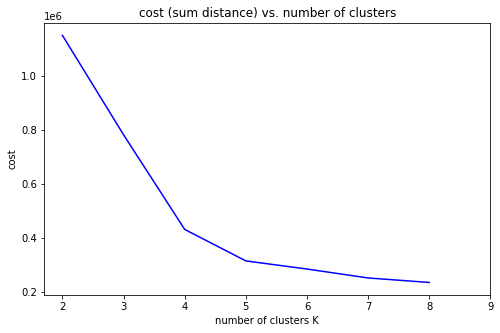

In [ ]:
dict_cost= {}
for k in tqdm(range(2,9)):
    kproto = KPrototypes(n_clusters=k, init='random',n_init=10, n_jobs=-1, verbose=2, random_state = 0)
    res = kproto.fit_predict(df, categorical=cat_idx)
    dict_cost[k] = kproto.cost_

print("cost (sum distance) for all k:")
_ = [print(k,":",f'{v:.3f}') for k,v in dict_cost.items()]

# scree plot: look for elbow
plt.figure(figsize=[8,5])
plt.plot(list(dict_cost.keys()), list(dict_cost.values()), color="blue")
plt.title("cost (sum distance) vs. number of clusters")
plt.xticks(np.arange(2,10,1))
plt.xlabel("number of clusters K")
plt.ylabel("cost");

Parece que k = 4

## Fiteo el modelo y hago las predicciones

In [ ]:
kproto = KPrototypes(n_clusters=4, init='random',n_init=10, n_jobs=-1, verbose=2, random_state = 0)
modelo_4 = kproto.fit(df, categorical=cat_idx)
clusters = kproto.predict(df, categorical=cat_idx)

#traigo el dataset sin preprocesar
dfa = import_dataset()
dfa, cat_idx = clean_nulls_dataset(dfa,['customer_id', 'customer_status', 'churn_category','churn_reason', 'city','zip_code'])
dfa.insert(0, "cluster", clusters)  
dfa

Best run was number 5


cluster  gender  age married  number_of_dependents   latitude  \
0           0  Female   37     Yes                     0  34.827662   
1           2    Male   46      No                     0  34.162515   
2           0    Male   50      No                     0  33.645672   
3           0    Male   78     Yes                     0  38.014457   
4           0  Female   75     Yes                     0  34.227846   
...       ...     ...  ...     ...                   ...        ...   
7038        0  Female   20      No                     0  32.759327   
7039        0    Male   40     Yes                     0  37.734971   
7040        0    Male   22      No                     0  39.108252   
7041        0    Male   21     Yes                     0  33.001813   
7042        0    Male   36     Yes                     0  39.600599   

       longitude  number_of_referrals  tenure_in_months    offer  \
0    -118.999073                    2                 9     None   
1    -118.203869                    0                 9     None   
2    -117.922613                    0                 4  Offer E   
3    -122.115432                    1                13  Offer D   
4    -119.079903                    3                 3     None   
...          ...                  ...               ...      ...   
7038 -116.997260                    0                13  Offer D   
7039 -120.954271                    1                22  Offer D   
7040 -123.645121                    0                 2  Offer E   
7041 -117.263628                    5                67  Offer A   
7042 -120.636358                    1                63     None   

     phone_service  avg_monthly_long_distance_charges multiple_lines  \
0              Yes                              42.39             No   
1              Yes                              10.69            Yes   
2              Yes                              33.65             No   
3              Yes                              27.82             No   
4              Yes                               7.38             No   
...            ...                                ...            ...   
7038           Yes                              46.68             No   
7039           Yes                              16.20            Yes   
7040           Yes                              18.62             No   
7041           Yes                               2.12             No   
7042            No                               0.00             No   

     internet_service internet_type  avg_monthly_gb_download online_security  \
0                 Yes         Cable                     16.0              No   
1                 Yes         Cable                     10.0              No   
2                 Yes   Fiber Optic                     30.0              No   
3                 Yes   Fiber Optic                      4.0              No   
4                 Yes   Fiber Optic                     11.0              No   
...               ...           ...                      ...             ...   
7038              Yes           DSL                     59.0             Yes   
7039              Yes   Fiber Optic                     17.0              No   
7040              Yes           DSL                     51.0              No   
7041              Yes         Cable                     58.0             Yes   
7042              Yes         Cable                      5.0             Yes   

     online_backup device_protection_plan premium_tech_support streaming_tv  \
0              Yes                     No                  Yes          Yes   
1               No                     No                   No           No   
2               No                    Yes                   No           No   
3              Yes                    Yes                   No          Yes   
4               No                     No                  Yes          Yes   
...            ...                  

In [ ]:
def cluster_pies(df):
    K = df["cluster"].nunique()

    for k in tqdm(range(K)):
        dfc = df[df["cluster"]==k]

        ten = dfc.tenure_in_months.median()	
        char = dfc.monthly_charge.median()	
        rev = dfc.total_revenue.median()

        cases = dfc.shape[0]

        fig = plt.figure(figsize=(50, 12))
        fig.suptitle(f"Cluster {k}: \n{cases:,.0f} cases | avg_tenure: {ten} | avg_monthly_charge: {char} | avg_total_revenue: {rev}",
                     fontsize=20, fontweight="bold",verticalalignment='bottom')
        c = len(df.select_dtypes("object").columns)

        for i,col in enumerate(list(df.select_dtypes("object").columns)):
            ax1 = plt.subplot2grid((2,c),(0,i))
            plt.pie(dfc[col].value_counts(), labels=dfc[col].unique())
            plt.title(col);

In [ ]:
def cluster_profile(df):
    agg_dict = {}

    for col in list(df.select_dtypes("number").columns[1:]):
        agg_dict[col] = "median"

    c = len(df.select_dtypes("object").columns)

    for col in list(df.select_dtypes("object").columns):
        agg_dict[col] = lambda x: x.value_counts().sort_values(ascending=False).index[0]
        
    dfc = df.groupby("cluster").agg(agg_dict).T

    cluster_pies(df)
    return dfc

## Resultados del modelo

### Reporte Gral

  0%|          | 0/4 [00:00<?, ?it/s]

cluster                                          0                1  \
age                                           45.0             50.0   
number_of_dependents                           0.0              0.0   
latitude                                 36.245926        35.316263   
longitude                               -119.60137      -119.224666   
number_of_referrals                            0.0              1.0   
tenure_in_months                              27.0             44.0   
avg_monthly_long_distance_charges            23.06            24.91   
avg_monthly_gb_download                       16.0             22.0   
monthly_charge                               69.45             84.3   
total_charges                               1273.3           3419.3   
total_refunds                                  0.0              0.0   
total_extra_data_charges                       0.0            120.0   
total_long_distance_charges                 377.86           853.12   
total_revenue                               1934.6          4556.43   
gender                                        Male             Male   
married                                         No              Yes   
offer                                         None             None   
phone_service                                  Yes              Yes   
multiple_lines                                  No              Yes   
internet_service                               Yes              Yes   
internet_type                          Fiber Optic      Fiber Optic   
online_security                                 No               No   
online_backup                                   No              Yes   
device_protection_plan                          No               No   
premium_tech_support                            No               No   
streaming_tv                                    No              Yes   
streaming_movies                                No              Yes   
streaming_music                                 No              Yes   
unlimited_data                                 Yes               No   
contract                            Month-to-Month   Month-to-Month   
paperless_billing                              Yes              Yes   
payment_method                     Bank Withdrawal  Bank Withdrawal   

cluster                                          2                3  
age                                           49.0             50.0  
number_of_dependents                           0.0              0.0  
latitude                                 35.245035        36.575445  
longitude                              -119.224243      -120.127926  
number_of_referrals                            1.0              0.0  
tenure_in_months                              40.0             31.0  
avg_monthly_long_distance_charges            19.93            20.46  
avg_monthly_gb_download                       17.0             21.0  
monthly_charge                               71.05            79.75  
total_charges                               1943.9         2278.825  
total_refunds                                33.21              0.0  
total_extra_data_charges                       0.0             50.0  
total_long_distance_charges                 515.52          375.585  
total_revenue                              2834.39         2991.235  
gender                                        Male           Female  
married                                        Yes               No  
offer                                         None             None  
phone_service                                  Yes              Yes  
multiple_lines                                 Yes               No  
internet_service                               Yes              Yes  
internet_type                          Fiber Optic      Fiber Optic  
online_security                                 No               No  
online_backup                                 

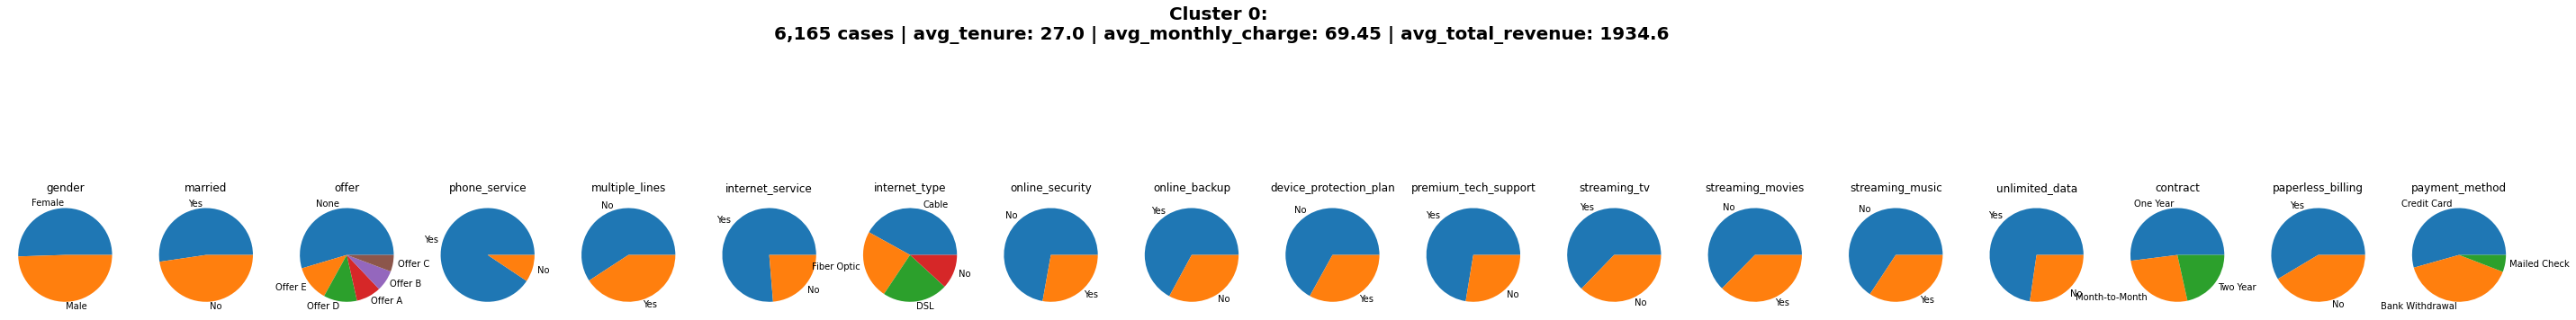

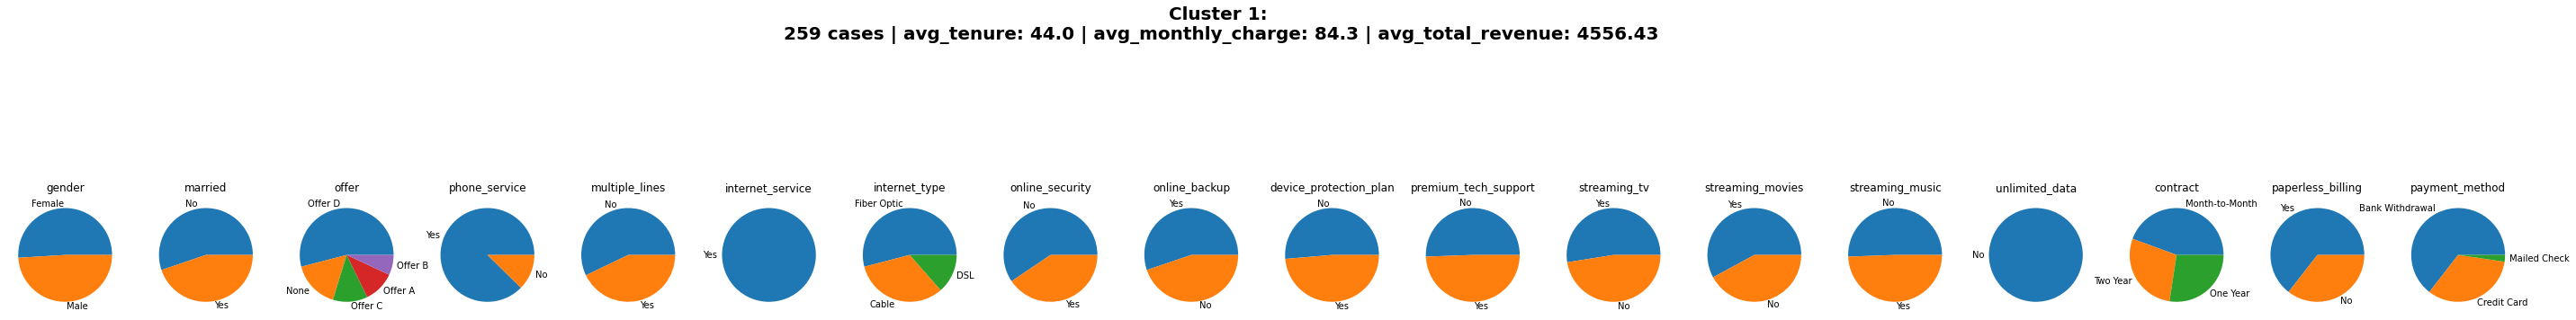

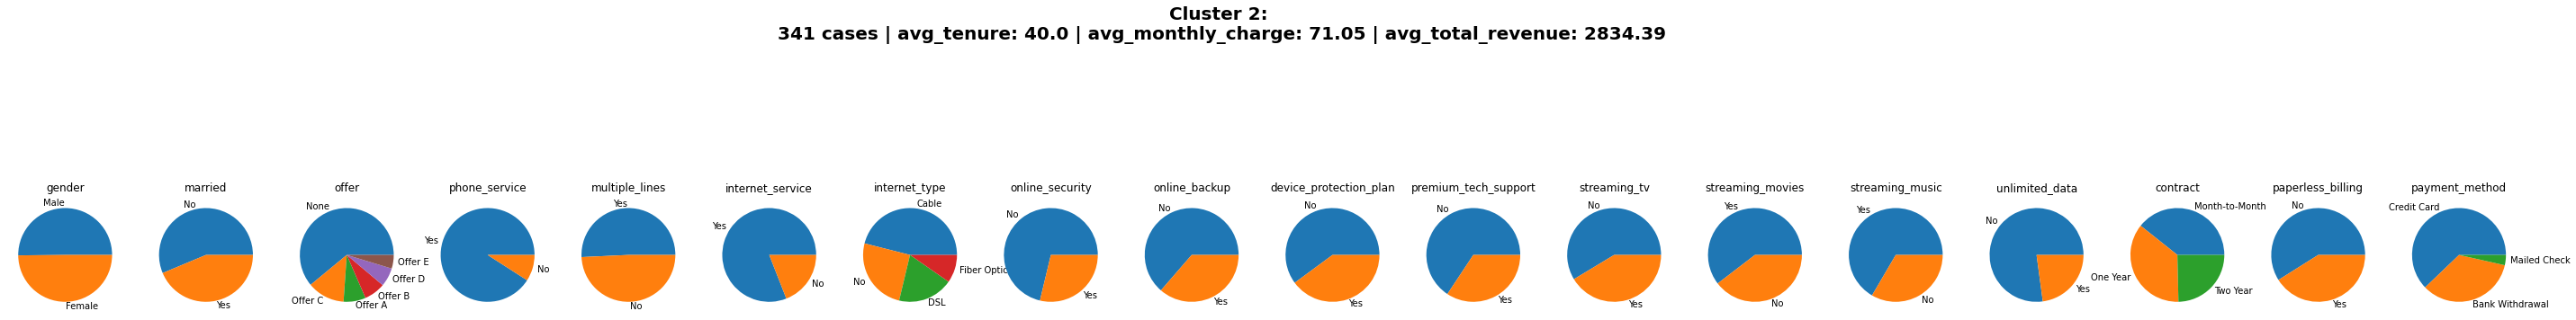

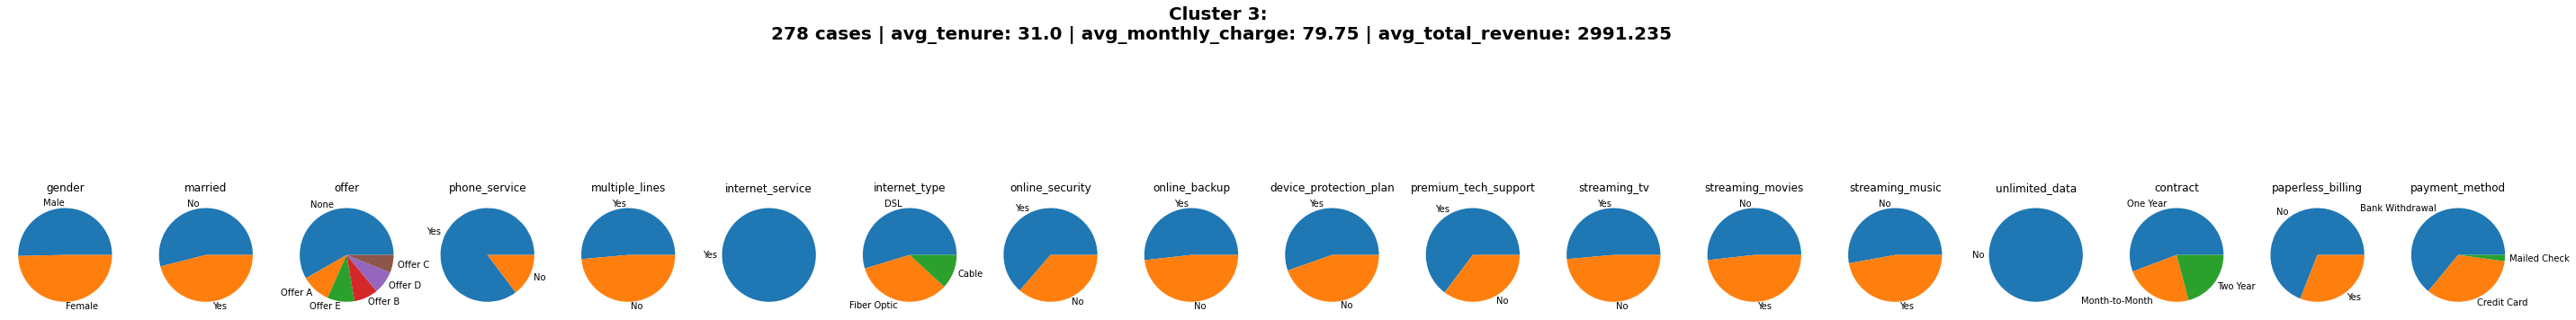

In [ ]:
profile = cluster_profile(dfa)
profile

Hay 4 grupos , los 2 mas destacables son el 0 y el 1:

* Grupo 0:
    - Es el mayoritario con 6125 casos.
    - Tiene el promedio de total revenue y cargos mas bajo.
    - La mayoria contrata internet por cable.
    - Predominan los usuarios sin oferta.
    - El contrato preferido es el anual
    - Es el grupo con la tenure promedio mas baja (27)
* Grupo 1:
    - Es el mas pequeño con 259.
    - Es el que mas dinero recauda en promedio.
    - Todos sus usuarios contratan internet principalmente Fibra Optica.
    - Ninguno contrata datos ilimitados.
    - La oferta predominante es la D.
    - Los contratos estan distribuidos mas equitativamente.

### Ubicaciones geograficas de cada grupo

In [ ]:
!pip install dash jupyter_dash
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 44.6 MB/s 
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import plotly.express as px

In [ ]:
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output
import dash

In [ ]:
cluster_0 = dfa[dfa.cluster == 0][['latitude','longitude','cluster']].groupby(by=['latitude','longitude','cluster']).size()
cluster_0 = cluster_0.reset_index().rename({0:'densidad'},axis=1)

cluster_1 = dfa[dfa.cluster == 1][['latitude','longitude','cluster']].groupby(by=['latitude','longitude','cluster']).size()
cluster_1 = cluster_1.reset_index().rename({0:'densidad'},axis=1)

cluster_2 = dfa[dfa.cluster == 2][['latitude','longitude','cluster']].groupby(by=['latitude','longitude','cluster']).size()
cluster_2 = cluster_2.reset_index().rename({0:'densidad'},axis=1)

cluster_3 = dfa[dfa.cluster == 3][['latitude','longitude','cluster']].groupby(by=['latitude','longitude','cluster']).size()
cluster_3 = cluster_3.reset_index().rename({0:'densidad'},axis=1)


df_plot = pd.concat([cluster_0,
                     cluster_1,
                     cluster_2,
                     cluster_3], axis=0)

# build figures for each of the required columns
figs = [
    px.density_mapbox(df_plot[df_plot.cluster==x], lat='latitude', lon='longitude', z='densidad', radius=30,
                        center=dict(lat=37.48, lon=-119.756684), zoom=4.5,
                        mapbox_style="open-street-map")
    for x in range(4)
]
figs.append(px.density_mapbox(df_plot, lat='latitude', lon='longitude', z='densidad', radius=30,
                        center=dict(lat=37.48, lon=-119.756684), zoom=4.5,opacity=0,
                        mapbox_style="open-street-map"))

# Build App
app = JupyterDash(__name__)

app.layout = dash.html.Div(
    [
        dash.dcc.RadioItems(id = 'checklist-customer',
                        options = [
                            {"label": x, "value":i} for i, x in enumerate(["cluster_0", "cluster_1", "cluster_2","cluster_3"])
                            ],
                        value = 0,
                        labelStyle={'display':'inline-block','color':'orange'}
                    ),
        dash.dcc.Graph(
            id="map",
        ),
    ]
)

@app.callback(Output("map", "figure"), Input( "checklist-customer", "value"))
def updateGraph(val):
    return figs[val].update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Run app and display result inline in the notebook
app.run_server(mode="inline")

<IPython.core.display.Javascript object>

* **Cluster 0:** se distribuyen a lo largo del estado y sus focos de densidad estan en las zonas mas pobladas.
* **Cluster 1:** predominan en el norte de San Diego y Los Angeles
* **Cluster 2:** principalmente se encuentran en la parte norte de Los Angeles, pero tambien hay una cantidad considerable (aunque menor) en San Diego y San Francisco
* **Cluster 3:** predominan Los Angeles, San Francisco y el area de Hoopa Valley Tribe. San Diego no se encuentra en este grupo.

### Cuota mensual

In [ ]:
fig = px.violin(dfa, y="monthly_charge", x='cluster', color='cluster',box=True)
fig.show()
dfa.groupby('cluster').monthly_charge.describe()

count       mean        std   min      25%    50%     75%     max
cluster                                                                    
0        6165.0  62.311314  31.502877 -10.0  25.5500  69.45  89.200  118.75
1         259.0  78.280502  25.160579  -8.0  60.2500  84.30  98.700  116.45
2         341.0  65.610704  30.747456 -10.0  45.0000  71.05  89.700  118.60
3         278.0  75.936691  22.894423  -9.0  56.2625  79.75  94.375  116.10

* **Cluster 0:** Tiene una moda de 20 dolares mensuales y otra que anda entre 80 y 100 dolares mensuales.
* **Cluster 1:** La moda anda al rededor de los 100 dolares mensuales y tiene unos outliers por debajo de 0 dolares
* **Cluster 2:** Tiene una por los 80 dolares mensuales y otra menor por los 20 dolares mensuales
* **Cluster 3:**  la mayoria de los usuarios paga al rededor de los 90 dolares mensuales

### Resto de las numericas

In [ ]:
num_df = dfa[['cluster', 'age', 'number_of_dependents', 
       'number_of_referrals', 'tenure_in_months',
       'avg_monthly_long_distance_charges', 'avg_monthly_gb_download',
     'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue']]

for i,col in enumerate(num_df.columns):
    if i == 0:
        continue
    fig = px.violin(dfa, y=col, x='cluster', color='cluster',box=True, range_y=(num_df[col].min(),num_df[col].max()),
                    title=col.capitalize().replace('_',' '))
    fig.show()

* **Age:** No hay mucho que destacar, son muy similares entre cada cluster.
    * El cluster 0 esta distribuido mas uniformemente entre cada edad.
    * El cluster 3 hay una moda entre los 50 y 60 años.
* **Number of dependants:** el cluster 2 tiene usuarios entre 0-1 como valores normales, mientras que el resto tiene 0.
* **Number of referals:** todos tienen una moda de 0 referals
    * los clusters 0 y 3 tienen como outliers a personas con 6 o mas referals     
    * los clusters 1 y 2 no poseen outliers ya que su distribucion es un poco mas uniforme (aunque predominan de 0 a 2 referals)
* **Tenure**: el cluster 0 tiene una moda de aproximadamente 4 meses mientras que el resto se reparte de forma uniforme entre los meses
* **Avg Long distance charges:** Practicamente iguales
* **Avg Monthly GB download:** 
Los clusters 0, 1 y 2 poseen outliers de valores mayores a 60 GB.
    * El cluster 0 posee una moda cercana a los 0 GB. 
    - El cluster 1 la posee cercana a los 25 GB.
    * El cluster 2 tiene una distribucion mas uniforme entre 0 y 30 GB
    * El cluster 3 No posee outliers, tiene una moda por los 20 GB pero no es tan definida en comparacion a los otros clusters.
* **Total Charges**:
No hay outliers
    * El cluster 0 posee una distribución tendiendo a menos de 1000 dolares.
    * El cluster 1 tiene una distribucion uniforme.
    * Los clusters 2 y 3 se comportan similares siendo uniformes pero con una tendencia alrededor de los 1000 dolares
* **Total Refounds:** El cluster 2 tiene bastantes refounds, mientras los otros clusters por lo general andan en 0.
* ** Total Extra data charges:** Los clusters 1 y 3 poseen cargos extras (los del 1 mucho mas que los del cluster 3) y los clusters 0 y 2 no poseen salvo por los outliers.
* ** Total long distance chargers**: Los clusters 0, 2 y 3 poseen outliers superiores. Todos los clusters tieden a no gastar tanto pero es mas predominante en los clusters 0,2 y 3.
* **Total revenue:** Los clusters 0 y 2 poseen outliers superiores
    * En el cluster 0 hay una moda alrededor de los 400-500 dolares
    * En el cluster 1 es mas uniforme
    * Los clusters 2 y 3 se comportan similar tienen una moda entre los 1300-1500 dolares, el cluster 3 tiene una distrubicion un poco mas uniforme que el 2



## Creo la clase para exportar

In [ ]:
class Client_Clusterer:

    def __init__(self, pipe, model):
        self.pipe = pipe
        self.model = model

    def clean_nulls_dataset(self,df:pd.DataFrame,cols_to_drop:list)->tuple:
        '''Reemplaza Nulos numericos con 0 y Categoricos con No
        
        Retorna copia del imputado df limpio y lista de indices de las variables categoricas'''

        df = df.drop(cols_to_drop,axis=1).copy()
        categorical_cols = []
        categorical_idx = []
        num_cols = []

        for i,col in enumerate(df.columns):
            if df[col].dtypes.str=='|O':
                categorical_cols.append(col)
                categorical_idx.append(list(df.columns).index(col))
            else:
                num_cols.append(col)

        null_status = df.isna().sum()

        for col in categorical_cols:
            df[col].fillna('No',inplace=True)
        for col in num_cols:
            df[col].fillna(0,inplace=True)

        null_status = df.isna().sum()

        return df , categorical_idx

    def predict(self,df):
        df, cat_idx = clean_nulls_dataset(df,['customer_id','churn_reason','churn_category',
                                      'customer_status','city','zip_code',])
        
        scaler_cols = ['age', 'number_of_dependents','avg_monthly_long_distance_charges',
               'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
               'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue',
               'number_of_referrals', 'tenure_in_months', 'total_refunds','latitude', 'longitude']

        df[scaler_cols] = self.pipe.transform(df[scaler_cols])
        clusters = self.model.predict(df, categorical=cat_idx)
        return clusters

In [ ]:
#instancio la clase
modelo_4_final = Client_Clusterer(pipe=model_4_pipe, model= modelo_4)

#pruebo que ande
df = import_dataset()

preds = modelo_4_final.predict(df)
len(df), len(preds), preds

(7043, 7043, array([0, 2, 0, ..., 0, 0, 0], dtype=uint16))

## La exporto

In [ ]:
pickle.dump(modelo_4_final, open('modelo_4.pkl', 'wb'))

### Reviso que todo ande bien

In [ ]:
#instancio la clase
with (open("/content/Modelo_4.pkl", "rb")) as f:
    modelo_test = pickle.load(f)

#pruebo que ande
df = import_dataset()

preds = modelo_test.predict(df)
len(df), len(preds) , preds

(7043, 7043, array([0, 2, 0, ..., 0, 0, 0], dtype=uint16))

# Implementación de los modelos

Los modelos va a estar implementado en una base de datos y van a volcar periodicamente sus resultados en una tabla llamada CustomerStatus donde se podra consultar que usuarios van a dejar el servicio por medio de una api hecha con flask.

A modo de simplificar la implementación voy a usar una base de datos de sqlite.

Usare el dataset como simulación de la base de datos.


>Si solo quieres probar la api corre las celdas de la seccion "Modelos finales y Conclución" en adelante


In [ ]:
#Cargo los modelos y las pipelines
with (open("/content/Modelo_1.pkl", "rb")) as f:
    modelo_1 = pickle.load(f)

with (open("/content/Modelo_2.pkl", "rb")) as f:
    modelo_2 = pickle.load(f)

with (open("/content/Modelo_3.pkl", "rb")) as f:
    modelo_3 = pickle.load(f)

with (open("/content/Modelo_4.pkl", "rb")) as f:
    modelo_4 = pickle.load(f)

## Cargo dataset inicial y creo la base de datos

In [ ]:
df = pd.read_csv('https://github.com/Lemonpi3/coderhouse-DS-repo/blob/master/Datasets/telecom_customer_churn.csv?raw=true')
conn = sql.connect('Clients.db', check_same_thread=False)

cols = list(df.columns)
cols = [col.lower().replace(' ','_') for col in cols]

rename_dict = {}
for key in list(df.columns):
    for value in cols:
        rename_dict[key] = value
        cols.remove(value)
        break
print(rename_dict)

df = df.rename(rename_dict,axis=1)
df.head()

{'Customer ID': 'customer_id', 'Gender': 'gender', 'Age': 'age', 'Married': 'married', 'Number of Dependents': 'number_of_dependents', 'City': 'city', 'Zip Code': 'zip_code', 'Latitude': 'latitude', 'Longitude': 'longitude', 'Number of Referrals': 'number_of_referrals', 'Tenure in Months': 'tenure_in_months', 'Offer': 'offer', 'Phone Service': 'phone_service', 'Avg Monthly Long Distance Charges': 'avg_monthly_long_distance_charges', 'Multiple Lines': 'multiple_lines', 'Internet Service': 'internet_service', 'Internet Type': 'internet_type', 'Avg Monthly GB Download': 'avg_monthly_gb_download', 'Online Security': 'online_security', 'Online Backup': 'online_backup', 'Device Protection Plan': 'device_protection_plan', 'Premium Tech Support': 'premium_tech_support', 'Streaming TV': 'streaming_tv', 'Streaming Movies': 'streaming_movies', 'Streaming Music': 'streaming_music', 'Unlimited Data': 'unlimited_data', 'Contract': 'contract', 'Paperless Billing': 'paperless_billing', 'Payment Method

customer_id  gender  age married  number_of_dependents          city  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  tenure_in_months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     offer phone_service  avg_monthly_long_distance_charges multiple_lines  \
0     None           Yes                              42.39             No   
1     None           Yes                              10.69            Yes   
2  Offer E           Yes                              33.65             No   
3  Offer D           Yes                              27.82             No   
4     None           Yes                               7.38             No   

  internet_service internet_type  avg_monthly_gb_download online_security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
2              Yes   Fiber Optic                     30.0              No   
3              Yes   Fiber Optic                      4.0              No   
4              Yes   Fiber Optic                     11.0              No   

  online_backup device_protection_plan premium_tech_support streaming_tv  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   

  streaming_movies streaming_music unlimited_data        contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
2               No              No            Yes  Month-to-Month   
3              Yes              No            Yes  Month-to-Month   
4               No              No            Yes  Month-to-Month   

  paperless_billing   payment_method  monthly_charge  total_charges  \
0               Yes      Credit Card            65.6         593.30   
1                No      Credit Card            -4.0         542.40   
2               Yes  Bank Withdrawal            73.9         280.85   
3               Yes  Bank Withdrawal            98.0        1237.85   
4               Yes      Credit Card            83.9         267.40   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   total_revenue customer_status   churn_category  \
0         974.81          Stayed              NaN   
1         610.28          Stayed              NaN   
2         415.45         Churned       Competitor   
3        1599.51         Churned  Dissatisfaction   
4         289.54         Churned  Dissatisfaction   

                    churn_reason  
0                            NaN  
1                      

In [ ]:
#customer_cols para crear las tablas
customers_cols_str = ', '.join(list(rename_dict.values())[:-3])
customers_cols_str

'customer_id, gender, age, married, number_of_dependents, city, zip_code, latitude, longitude, number_of_referrals, tenure_in_months, offer, phone_service, avg_monthly_long_distance_charges, multiple_lines, internet_service, internet_type, avg_monthly_gb_download, online_security, online_backup, device_protection_plan, premium_tech_support, streaming_tv, streaming_movies, streaming_music, unlimited_data, contract, paperless_billing, payment_method, monthly_charge, total_charges, total_refunds, total_extra_data_charges, total_long_distance_charges, total_revenue'

In [ ]:
cur = conn.cursor()
# cur.execute('DROP TABLE Customers')
# cur.execute('DROP TABLE CustomerStatus')

In [ ]:
cur.execute(f'''CREATE TABLE IF NOT EXISTS Customers({customers_cols_str})''')
cur.execute(f'''CREATE TABLE IF NOT EXISTS CustomerStatus(
                                                customer_id, churn_chance, competitor_reason_chance, 
                                                dissatisfaction_reason_chance, price_reason_chance, attitude_reason_chance)''')

In [ ]:
df[list(rename_dict.values())[:-3]].to_sql('Customers',con=conn,if_exists='replace',index=False)

In [ ]:
#Checkeo que todo este bien
pd.read_sql('SELECT * FROM Customers', con=conn).head()

customer_id  gender  age married  number_of_dependents          city  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  tenure_in_months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     offer phone_service  avg_monthly_long_distance_charges multiple_lines  \
0     None           Yes                              42.39             No   
1     None           Yes                              10.69            Yes   
2  Offer E           Yes                              33.65             No   
3  Offer D           Yes                              27.82             No   
4     None           Yes                               7.38             No   

  internet_service internet_type  avg_monthly_gb_download online_security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
2              Yes   Fiber Optic                     30.0              No   
3              Yes   Fiber Optic                      4.0              No   
4              Yes   Fiber Optic                     11.0              No   

  online_backup device_protection_plan premium_tech_support streaming_tv  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   

  streaming_movies streaming_music unlimited_data        contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
2               No              No            Yes  Month-to-Month   
3              Yes              No            Yes  Month-to-Month   
4               No              No            Yes  Month-to-Month   

  paperless_billing   payment_method  monthly_charge  total_charges  \
0               Yes      Credit Card            65.6         593.30   
1                No      Credit Card            -4.0         542.40   
2               Yes  Bank Withdrawal            73.9         280.85   
3               Yes  Bank Withdrawal            98.0        1237.85   
4               Yes      Credit Card            83.9         267.40   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   total_revenue  
0         974.81  
1         610.28  
2         415.45  
3        1599.51  
4         289.54

In [ ]:
conn.close()

In [ ]:
conn = sql.connect('Clients.db', check_same_thread=False)
customers_df = pd.read_sql('SELECT * FROM Customers',con=conn)
customers_df

customer_id  gender  age married  number_of_dependents          city  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      zip_code   latitude   longitude  number_of_referrals  tenure_in_months  \
0        93225  34.827662 -118.999073                    2                 9   
1        91206  34.162515 -118.203869                    0                 9   
2        92627  33.645672 -117.922613                    0                 4   
3        94553  38.014457 -122.115432                    1                13   
4        93010  34.227846 -119.079903                    3                 3   
...        ...        ...         ...                  ...               ...   
7038     91941  32.759327 -116.997260                    0                13   
7039     95367  37.734971 -120.954271                    1                22   
7040     95432  39.108252 -123.645121                    0                 2   
7041     92075  33.001813 -117.263628                    5                67   
7042     96125  39.600599 -120.636358                    1                63   

        offer phone_service  avg_monthly_long_distance_charges multiple_lines  \
0        None           Yes                              42.39             No   
1        None           Yes                              10.69            Yes   
2     Offer E           Yes                              33.65             No   
3     Offer D           Yes                              27.82             No   
4        None           Yes                               7.38             No   
...       ...           ...                                ...            ...   
7038  Offer D           Yes                              46.68             No   
7039  Offer D           Yes                              16.20            Yes   
7040  Offer E           Yes                              18.62             No   
7041  Offer A           Yes                               2.12             No   
7042     None            No                                NaN           None   

     internet_service internet_type  avg_monthly_gb_download online_security  \
0                 Yes         Cable                     16.0              No   
1                 Yes         Cable                     10.0              No   
2                 Yes   Fiber Optic                     30.0              No   
3                 Yes   Fiber Optic                      4.0              No   
4                 Yes   Fiber Optic                     11.0              No   
...               ...           ...                      ...             ...   
7038              Yes           DSL                     59.0             Yes   
7039              Yes   Fiber Optic                     17.0              No   
7040              Yes           DSL                     51.0              No   
7041              Yes         Cable                     58.0             Yes   
7042              Yes         Cable                      5.0             Yes   

     online_backup device_protection_plan premium_tech_support streaming_tv  \
0              Yes                     No                  Yes          Yes   
1               No         

## Creo las funciones de update para la api

In [ ]:
#Modelos 1 y 2
def update_customer_status_db():
    import pandas as pd
    import sqlite3 as sql
    import pickle

    with (open("/content/Modelo_1.pkl", "rb")) as f:
        modelo_1 = pickle.load(f)

    with (open("/content/Modelo_2.pkl", "rb")) as f:
        modelo_2 = pickle.load(f)

    conn = sql.connect('Clients.db', check_same_thread=False)
    customers_df = pd.read_sql('SELECT * FROM Customers',con=conn)

    #Init del df
    #instancio el df con las ids 
    predicts = pd.DataFrame(customers_df.customer_id)

    #Creo las columnas de predict con 0 de defecto.
    predicts['churn_chance'] = 0
    predicts['competitor_reason_chance'] = 0
    predicts['dissatisfaction_reason_chance'] = 0
    predicts['price_reason_chance'] = 0
    predicts['attitude_reason_chance'] = 0
    predicts['other_reason_chance'] = 0

    #Preds Modelo 1
    preds_1 = modelo_1.predict(customers_df)
    predicts['churn_chance'] = preds_1.churn_chance

    #Preds Modelo 2
    #Seleciono las ids de los q van a churnear
    ids = predicts.loc[predicts.churn_chance >= 50].customer_id.to_list()
    
    preds_2 = modelo_2.predict(customers_df[customers_df.customer_id.isin(ids)])

    #Cargo las predicciones del modelo 2
    predicts.loc[predicts.churn_chance >= 50,'competitor_reason_chance'] = preds_2.competitor_reason_chance
    predicts.loc[predicts.churn_chance >= 50,'dissatisfaction_reason_chance'] = preds_2.dissatisfaction_reason_chance
    predicts.loc[predicts.churn_chance >= 50,'price_reason_chance'] = preds_2.price_reason_chance
    predicts.loc[predicts.churn_chance >= 50,'attitude_reason_chance'] = preds_2.attitude_reason_chance
    predicts.loc[predicts.churn_chance >= 50,'other_reason_chance'] = preds_2.other_reason_chance

    #vuelco la tabla
    predicts.to_sql('CustomerStatus',con=conn,if_exists='replace',index=False)
    conn.close()

#Modelo 3
def update_proyected_revenue():
    import pandas as pd
    import sqlite3 as sql
    import pickle

    with (open("/content/Modelo_3.pkl", "rb")) as f:
        modelo_3 = pickle.load(f)

    conn = sql.connect('Clients.db', check_same_thread=False)
    customers_df = pd.read_sql('SELECT * FROM Customers',con=conn)

    #instancio el df con las ids 
    predicts = pd.DataFrame(customers_df.customer_id)

    predicts['proyected_cuatrimestral_revenue'] = modelo_3.predict(customers_df)
    predicts.to_sql('ProyectedRevenues',con=conn,if_exists='replace',index=False)
    conn.close()

#Modelo 4
def update_clusters():
    import pandas as pd
    import sqlite3 as sql
    import pickle

    with (open("/content/Modelo_4.pkl", "rb")) as f:
        modelo_4 = pickle.load(f)

    conn = sql.connect('Clients.db', check_same_thread=False)
    customers_df = pd.read_sql('SELECT * FROM Customers',con=conn)

    #instancio el df con las ids 
    predicts = pd.DataFrame(customers_df.customer_id)

    predicts['customer_type'] = modelo_4.predict(customers_df)
    predicts.to_sql('ClientClusters',con=conn,if_exists='replace',index=False)
    conn.close()

## Creo la API

In [ ]:
app = Flask("Model API")
api = Api(app)

#para que la url defecto no tire error
class MainAPI(Resource):
    def get(self):
        return { "error":'No action passed'}

class ModelAPI(Resource):
    '''
    GET: 
    * /update_customer_status_db : Updates CustomerStatus Table with model predictions ---> returns "200": "updated_customer_status_db"
    * /get_users_to_churn : Returns all users with 50% or more churn chance from CustomerStatus Table ---> returns json_object(customer_id, churn_chance, 
                                competitor_reason_chance, dissatisfaction_reason_chance, price_reason_chance, attitude_reason_chance)
    '''
    def get(self,action):
        #Obtener la tabla con los posibles churned
        if action == 'get_users_to_churn':
            conn = sql.connect('Clients.db', check_same_thread=False)
            cur = conn.cursor()

            data = cur.execute("""SELECT  
                                json_object(
                                    'customer_id', customer_id,
                                    'churn_chance', churn_chance,
                                    'competitor_reason_chance', competitor_reason_chance,
                                    'dissatisfaction_reason_chance', dissatisfaction_reason_chance,
                                    'price_reason_chance', price_reason_chance,
                                    'attitude_reason_chance', attitude_reason_chance
                                ) 
                    FROM CustomerStatus
                    WHERE churn_chance >= 50""").fetchall()
            conn.close()
            return data
        elif action == 'get_proyected_revenues':
            try:
                conn = sql.connect('Clients.db', check_same_thread=False)
                cur = conn.cursor()

                data = cur.execute("""SELECT  
                                    json_object(
                                        'customer_id', customer_id,
                                        'proyected_cuatrimestral_revenue', proyected_cuatrimestral_revenue
                                    ) 
                        FROM ProyectedRevenues""").fetchall()
                conn.close()
                return data
            except:
                #the only way to fail is due to the table not existing
                return {"500": "Internal server Error"}
        elif action == 'get_clusters':
            try:
                conn = sql.connect('Clients.db', check_same_thread=False)
                cur = conn.cursor()

                data = cur.execute("""SELECT  
                                    json_object(
                                        'customer_id', customer_id,
                                        'cluster', cluster
                                    ) 
                        FROM ClientClusters""").fetchall()
                conn.close()
                return data
            except:
                #the only way to fail is due to the table not existing
                return {"500": "Internal server Error"}
        #predecir
        elif action == 'update_customer_status_db':
            update_customer_status_db()
            return {"200": "updated_customer_status_db"}
        elif action == 'update_proyected_revenue':
            update_proyected_revenue()
            return {"200": "update_proyected_revenue"}
        elif action == 'update_clusters':
            update_clusters()
            return {"200": "update_clusters"}
        
api.add_resource(MainAPI, '/') 
api.add_resource(ModelAPI, '/<action>') 

run_with_ngrok(app)

## Corre la API

* https:// url de ngrok/update_customer_status_db : updatea la tabla de predicts
* https:// url de ngrok/get_users_to_churn  : retorna los usuarios con 50% o mas de dejar el servicio como json
* https:// url de ngrok/update_proyected_revenue: retorna la estimacion de total revenue del usuario
* https:// url de ngrok/update_clusters: updatea el cluster al que pertenecen

In [ ]:
app.run()

 * Serving Flask app "Model API" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7a44-34-170-37-250.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [19/Dec/2022 14:36:30] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Dec/2022 14:36:30] "GET /favicon.ico HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Dec/2022 14:36:50] "GET /update_customer_status_db HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Dec/2022 14:36:51] "GET /favicon.ico HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Dec/2022 14:37:02] "GET /get_users_to_churn HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Dec/2022 14:37:05] "GET /favicon.ico HTTP/1.1" 200 -


In [ ]:
#predictions table example
# pd.read_sql('SELECT * FROM CustomerStatus',con=conn)

customer_id  churn_chance  competitor_reason_chance  \
0     0002-ORFBO         42.02                      0.00   
1     0003-MKNFE         68.99                     21.29   
2     0004-TLHLJ         99.35                     30.57   
3     0011-IGKFF         86.93                     19.14   
4     0013-EXCHZ         94.86                     16.43   
...          ...           ...                       ...   
7038  9987-LUTYD         16.95                      0.00   
7039  9992-RRAMN         92.52                     20.00   
7040  9992-UJOEL         97.18                     33.43   
7041  9993-LHIEB          2.40                      0.00   
7042  9995-HOTOH          8.72                      0.00   

      dissatisfaction_reason_chance  price_reason_chance  \
0                              0.00                 0.00   
1                             25.57                18.71   
2                             19.29                21.57   
3                             31.29                 4.57   
4                             40.86                17.29   
...                             ...                  ...   
7038                           0.00                 0.00   
7039                          42.86                10.86   
7040                          27.57                12.57   
7041                           0.00                 0.00   
7042                           0.00                 0.00   

      attitude_reason_chance  other_reason_chance  
0                       0.00                 0.00  
1                      22.71                11.71  
2                      13.71                14.86  
3                      38.57                 6.43  
4                      13.29                12.14  
...                      ...                  ...  
7038                    0.00                 0.00  
7039                   22.14                 4.14  
7040                   12.71                13.71  
7041                    0.00                 0.00  
7042                    0.00                 0.00  

[7043 rows x 7 columns]